<a href="https://colab.research.google.com/github/peterp-58/peterp-58/blob/main/CIND820_PP_Bankrupcyv7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loading Pythons Programs

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import files
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import KNNImputer

#Uploading and setting up the Polish Dataset

uploading and renaming the columns for further review of the polish dataset.

In [ ]:
#pulling data from the website.
polishData=pd.read_csv("https://archive.ics.uci.edu/static/public/365/data.csv")
#adding the data into a dataframe
polish_Dataset = pd.DataFrame(polishData)

# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Set display width to avoid wrapping of wide DataFrames
pd.set_option('display.width', None)

# Set option to display full content of each column
pd.set_option('display.max_colwidth', None)
polish_Dataset.head(10)

year        A1        A2        A3       A4        A5       A6        A7        A8       A9  \
0     1  0.200550  0.379510  0.396410   2.0472   32.3510  0.38825  0.249760   1.33050  1.13890   
1     1  0.209120  0.499880  0.472250   1.9447   14.7860  0.00000  0.258340   0.99601  1.69960   
2     1  0.248660  0.695920  0.267130   1.5548   -1.1523  0.00000  0.309060   0.43695  1.30900   
3     1  0.081483  0.307340  0.458790   2.4928   51.9520  0.14988  0.092704   1.86610  1.05710   
4     1  0.187320  0.613230  0.229600   1.4063   -7.3128  0.18732  0.187320   0.63070  1.15590   
5     1  0.228220  0.497940  0.359690   1.7502  -47.7170  0.00000  0.281390   1.00830  1.97860   
6     1  0.111090  0.647440  0.289710   1.4705    2.5349  0.00000  0.111090   0.54454  1.73480   
7     1  0.532320  0.027059  0.705540  53.9540  299.5800  0.00000  0.652400  35.95700  0.65273   
8     1  0.009020  0.632020  0.053735   1.1263  -37.8420  0.00000  0.014434   0.58223  1.33320   
9     1  0.124080  0.838370  0.142040   1.1694  -91.8830  0.00000  0.153280   0.19279  2.11560   

       A10       A11        A12       A13       A14       A15        A16      A17       A18  \
0  0.50494  0.249760   0.659800  0.166600  0.249760   497.420   0.733780   2.6349  0.249760   
1  0.49788  0.261140   0.516800  0.158350  0.258340   677.960   0.538380   2.0005  0.258340   
2  0.30408  0.312580   0.641840  0.244350  0.309060   794.160   0.459610   1.4369  0.309060   
3  0.57353  0.092704   0.301630  0.094257  0.092704   917.010   0.398030   3.2537  0.092704   
4  0.38677  0.187320   0.331470  0.121820  0.187320  1133.200   0.322110   1.6307  0.187320   
5  0.50206  0.286450   0.586910  0.148120  0.281390   620.140   0.588580   2.0083  0.281390   
6  0.35256  0.125750   0.180410  0.309630  0.111090   439.940   0.829650   1.5445  0.111090   
7  0.97294  0.693940  48.966000  1.060200  0.652400    14.272  25.575000  36.9570  0.652400   
8  0.36798  0.043162   0.033921  0.038938  0.014434  4443.700   0.082138   1.5822  0.014434   
9  0.16163  0.184540   0.182840  0.075411  0.153280  1918.100   0.190300   1.1928  0.153280   

        A19      A20      A21       A22       A23       A24      A25        A26       A27  \
0  0.149420   43.370  1.24790  0.214020  0.119980  0.477060  0.50494   0.604110   1.45820   
1  0.152000   87.981  1.42930  0.248060  0.123040       NaN  0.39542   0.439920  88.44400   
2  0.236100   73.133  1.42830  0.302600  0.189960       NaN  0.28932   0.372820  86.01100   
3  0.071428   79.788  1.50690  0.115500  0.062782  0.171930  0.57353   0.361520   0.94076   
4  0.115530   57.045      NaN  0.198320  0.115530  0.187320  0.38677   0.322110   1.41380   
5  0.142220  107.260  1.72780  0.281040  0.115350       NaN  0.49970   0.481810  55.51100   
6  0.064036   57.733  0.56811  0.000000  0.064036       NaN  0.31469   0.829650   0.00000   
7  0.999490   39.978      NaN  0.671290  0.815530       NaN  0.96980  21.137000  16.15800   
8  0.010827   36.623  1.07520  0.030778  0.006766  0.000222  0.34828   0.073572   1.07140   
9  0.072451  109.970  1.58660  0.158190  0.058651       NaN  0.15445   0.155470   5.05920   

        A28     A29      A30       A31       A32      A33       A34       A35      A36       A37  \
0   1.76150  5.9443  0.11788  0.149420   94.1400   3.8772   0.56393  0.214020  1.74100  593.2700   
1  16.94600  3.6884  0.26969  0.152000  122.1700   2.9876   2.98760  0.206160  1.69960       NaN   
2   1.06270  4.3749  0.41929  0.238150  176.9300   2.0630   1.42740  0.315650  1.30900    2.3019   
3   1.96180  4.6511  0.14343  0.071428   91.3700   3.9948   0.37581  0.115500  1.35620       NaN   
4   1.11840  4.1424  0.27884  0.115530  147.0400   2.4823   0.32340  0.198320  1.62780   11.2470   
5   2.23590  4.3258  0.23382  0.144490  102.7600   3.5519   3.42000  0.275660  1.97860   22.3120   
6   3.06480  3.6770  0.36088  0.142230  328.7300   1.1103   1.05600  0.024982  1.73480       NaN   
7   2.50960  4.2428 -0.67625  1.000300    8.1579  44.7

In [ ]:
#The orginal dataset did not have named columns. It provided an explantion to each attribute in their reserach paper. The code below is to add the proper names.
#replacing the column name with actual names.

new_Column_names={
    'A1':'net_profit/total assets',
    "A2":'Total_Liabilities/total_assets',
    "A3":'Working_Capital_to_Total_Assets_Ratio',
    "A4":'Current_Ratio',
    "A5":"Defensive_Interval_Ratio",
    "A6":'Retained_Earnings_to_Total_Assets_Ratio',
    "A7":"Operating_Income_to_Total_Asset_ratio",
    "A8":"book_value_of_equity/total_liabilities",
    "A9":'Asset_Turnover_Ratio',
    "A10":'Equity_to_Total_Assets_Ratio',
    "A11":'gross_profit+extraordinary_items+financial_expenses)/total',
    "A12":'gross_profit/short-term_liabilities',
    "A13":'(gross_profit+depreciation)/sales',
    "A14":'(gross_profit+interest)/total_assets',
    "A15":'(total_liabilities∗365)/(gross_profit+depreciation)',
    "A16":'(gross profit+depreciation)/total_liabilities',
    "A17":'total_assets/total_liabilities',
    "A18":'gross_profit/total_assets',
    "A19":'gross_profit/sales',
    "A20":'(inventory∗365)/sales',
    "A21":'sales(n)/sales(n-1)',
    "A22":'profit_on_operating_activities/total_assets',
    "A23":'net_profit/sales',
    "A24":'gross_profit(in3years)/total_assets',
    "A25":'(equity-share_capital)/total_assets',
    "A26":'(net_profit+depreciation)/total_liabilities',
    "A27":'profit_on_operating_activities/financial_expenses',
    "A28":'working_capital/fixed_assets',
    "A29":'logarithm_of_total_assets',
    "A30":'(total_liabilities-cash)/sales',
    "A31":'(gross_profit+interest)/sales',
    "A32":'(current_liabilities∗365)/cost_of_products_sold',
    "A33":'operating_expenses/short-term_liabilities',
    "A34":'operating_expenses_/_total_liabilities',
    "A35":'profit_on_sales/total_assets',
    "A36":'total_sales/total_assets',
    "A37":'(current_assets-inventories)/long-term_liabilities',
    "A38":'constant_capital/total_assets',
    "A39":'profit_on_sales/sales',
    "A40":'(current_assets-inventory-receivables)/short-term liabilities',
    "A41":'total_liabilities/((profit_on_operating_activities+depreciation)∗(12/365))',
    "A42":'profit_on_operating_activities/sales',
    "A43":'rotation_receivables+inventory_turnover_in_days',
    "A44":'(receivables∗365)/sales',
    "A45": 'net_profit/inventory',
    "A46":'(current_assets-inventory)/short-term_liabilities',
    "A47":'(inventory∗365)/cost_of_products_sold',
    "A48":'EBITDA_(profit_on_operating_activities-depreciation)/total_assets',
    "A49":'EBITDA_(profit_on_operating_activities-depreciation)/sales',
    "A50":'current_assets/total_liabilities',
    "A51":'short-term_liabilities/total_assets',
    "A52":'(short-term_liabilities∗365)/cost_of_products_sold)',
    "A53":'equity/fixed_assets',
    "A54":'constant_capital/fixed_assets',
    "A55":'working_capital',
    "A56":'(sales-cost_of_products_sold)/sales',
    "A57":'(current_assets-inventory-short-term_liabilities)/(sales–gross_profit-depreciation)',
    "A58":'total_costs/total_sales',
    "A59":'long-term_liabilities/equity',
    "A60":'sales/inventory',
    "A61":'sales/receivables',
    "A62":'(short-term_liabilities∗365)/sales',
    "A63":'sales/short-term liabilities',
    "A64":'sales/fixed assets',
                          }





In [ ]:
polish_Dataset =polish_Dataset.rename(columns=new_Column_names)


In [ ]:
#based on the intial review of all the attributes type, it was noted that the class ratio was listed as int.
#making the class into a categorial data type from int
polish_Dataset['class']=polish_Dataset['class'].astype('category')

In [ ]:
#snapshot of the features after change in data type 'class'
polish_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43405 entries, 0 to 43404
Data columns (total 66 columns):
 #   Column                                                                               Non-Null Count  Dtype   
---  ------                                                                               --------------  -----   
 0   year                                                                                 43405 non-null  int64   
 1   net_profit/total assets                                                              43397 non-null  float64 
 2   Total_Liabilities/total_assets                                                       43397 non-null  float64 
 3   Working_Capital_to_Total_Assets_Ratio                                                43397 non-null  float64 
 4   Current_Ratio                                                                        43271 non-null  float64 
 5   Defensive_Interval_Ratio                                                         

#Variable Additions
This research paper was to introduce financial ratios that can help identify financial stress. This analysis was done by reviewing all attributes and seeing what can be added.

The following additions are based on using exisitng variables to create these additions. This is based on existing and industry knowledge.

In [ ]:
#The introduction of this variable is to get an understanding of how much of interest paid is to sales.
#A high proportion of interest to sales will indicate that a good portion of their sales earned will go towards paying the interest and other cost may not be covered.
#Variable 1
Interest_to_Sales = (polish_Dataset['(gross_profit+interest)/sales']-polish_Dataset['gross_profit/sales'])
Interest_to_Sales.replace([np.inf, -np.inf], np.NaN, inplace=True )
Interest_to_Sales
polish_Dataset['Interest_to_Sales'] = Interest_to_Sales


In [ ]:
#To gain an understanding on liquidity compared to all assets. Cash is the most liquid asset and can be
#used to cover debt/interest in the short term.
#variable 2
Cash_to_assets  = (polish_Dataset['Total_Liabilities/total_assets']-(polish_Dataset['(total_liabilities-cash)/sales'] * polish_Dataset['total_sales/total_assets'] ))
Cash_to_assets.replace([np.inf, -np.inf], np.NaN, inplace=True )
Cash_to_assets
polish_Dataset['Cash_to_assets'] = Cash_to_assets


In [ ]:
#This is to gain an understanding on how much cash can cover total liabilities. Too high can tell us that the company may have a hard time covering their liabilities.
#variable 3
Total_liabilities_to_Cash = (polish_Dataset['Total_Liabilities/total_assets']/ polish_Dataset['Cash_to_assets'] )
Total_liabilities_to_Cash.replace([np.inf, -np.inf], np.NaN, inplace=True )
Total_liabilities_to_Cash
polish_Dataset['Total_liabilities_to_Cash'] = Total_liabilities_to_Cash

In [ ]:
#Tells us how much interest can be covered by cash. A high number gives comfort that the company can cover their interest obligations
#variable 4
cash_to_interest = (polish_Dataset['Cash_to_assets']/ polish_Dataset['total_sales/total_assets'] * (1/polish_Dataset['Interest_to_Sales']))
cash_to_interest.replace([np.inf, -np.inf], np.NaN, inplace=True )
cash_to_interest
polish_Dataset['cash_to_interest'] = cash_to_interest

In [ ]:
#After initial analysis, I realized that not all companies have debt/paid interest during their fiscal year.
#This is ratio is taking the inverse.
#variable 5
Interest_to_cash = 1 /(polish_Dataset['cash_to_interest'])
Interest_to_cash.replace([np.inf, -np.inf], np.NaN, inplace=True )
Interest_to_cash
polish_Dataset['Interest_to_cash'] = Interest_to_cash

In [ ]:
#This ratio to review how much financial expense is covered by total assets. a high number indicates to me that the company has taken on too much debt and may find trouble as assets
#may not be enough relative to debt. this ratio can be used with asset turnover to provide more direction.
#variable 6
Financial_Expense_To_Total_Asset = (polish_Dataset['profit_on_operating_activities/total_assets'] / polish_Dataset['profit_on_operating_activities/financial_expenses'])
Financial_Expense_To_Total_Asset.replace([np.inf, -np.inf], np.NaN, inplace=True )
Financial_Expense_To_Total_Asset
polish_Dataset['Financial_Expense_To_Total_Asset'] = Financial_Expense_To_Total_Asset

In [ ]:
#variable 7
Financial_expense_to_operating = (polish_Dataset['profit_on_operating_activities/total_assets'] / (polish_Dataset["Operating_Income_to_Total_Asset_ratio"]*polish_Dataset['profit_on_operating_activities/financial_expenses']))
Financial_expense_to_operating.replace([np.inf, -np.inf], np.NaN, inplace=True )
Financial_expense_to_operating
polish_Dataset['Financial_expense_to_operating']=Financial_expense_to_operating

In [ ]:
#this ratio gives me an idea on how much operating income can cover the interst for the fiscal period. a high ratio is a good indicator.
#variable 8
Debt_Coverage_Ratio = ((polish_Dataset["Operating_Income_to_Total_Asset_ratio"]*polish_Dataset['profit_on_operating_activities/financial_expenses']) / polish_Dataset['profit_on_operating_activities/total_assets'])
Debt_Coverage_Ratio.replace([np.inf, -np.inf], np.NaN, inplace=True )
Debt_Coverage_Ratio
polish_Dataset['Debt_Coverage_Ratio'] = Debt_Coverage_Ratio

In [ ]:
#operating income can be viewed as cash flow from operating. it it not however, but in its place it can give the reader an idea.
#THis give us the percentage that is avaiable to firm after all expenses are paid from sales for the fiscal
#variable 9
Operating_income_Margin = (polish_Dataset['Operating_Income_to_Total_Asset_ratio'] / polish_Dataset['total_sales/total_assets'])
Operating_income_Margin.replace([np.inf, -np.inf], np.NaN, inplace=True )
Operating_income_Margin
polish_Dataset['Operating_income_Margin'] = Operating_income_Margin

In [ ]:
#this ratio tells us how many days  cash is recieved from the momement it is used to pay for inventory and accounts payble, as well as cash recieved from buyers. The lower the number the better
#Variable 10 Cash Conversion Cycle Formula = DIO + DSO – DPO.
Cash_conversion_cycle = ((polish_Dataset['(inventory∗365)/cost_of_products_sold']) + (polish_Dataset['(receivables∗365)/sales']) - (polish_Dataset['(short-term_liabilities∗365)/cost_of_products_sold)']))
Cash_conversion_cycle.replace([np.inf, -np.inf], np.NaN, inplace=True )
Cash_conversion_cycle
polish_Dataset['Cash_conversion_cycle'] = Cash_conversion_cycle

In [ ]:
#This ratio is used to determine how much cash can be used to cover financial expense. since cash is the most liquid asset, a high number indicates
#the ability to cover financial expenses
#variable 11
Cash_to_Financial_expense = (polish_Dataset['Cash_to_assets'] / polish_Dataset['Financial_Expense_To_Total_Asset'])
Cash_to_Financial_expense.replace([np.inf, -np.inf], np.NaN, inplace=True )
polish_Dataset['Cash_to_Financial_Expense']= Cash_to_Financial_expense

In [ ]:
#Used as part of the dupont formula (i.e Return on equity), gives us indication how much leverage is used.

#variable 12
Equity_multipler= 1/ polish_Dataset['Equity_to_Total_Assets_Ratio']
Equity_multipler.replace([np.inf, -np.inf], np.NaN, inplace=True )
polish_Dataset['Financial_Leverage'] = Equity_multipler

In [ ]:
#not addition but transforming an existing attribute to 1,0. if working capital is postive, it will be given a 1, if negative it will given a 0.
#making working capital into a indicator. 1 = postive values, 0 = negative
polish_Dataset['working_capital_indicator'] =np.where(polish_Dataset['working_capital']<=0,0,1)
polish_Dataset['working_capital_indicator']=polish_Dataset['working_capital_indicator'].astype('category')

In [ ]:
#final ratio is return on equity. this is to gauge on management perfromance on how much they retun to shareholders.
#since this ratio is the result of the dupoint formula, it helps us determine what goes into the results for shareholders. such as
#asset turnover and financial leverage. a high financial leverage tell us that the results are coming from debt.
#Variable13
Return_On_equity =polish_Dataset['net_profit/sales'] * polish_Dataset['total_sales/total_assets'] *polish_Dataset['Financial_Leverage']
Return_On_equity.replace([np.inf, -np.inf], np.NaN, inplace=True )
polish_Dataset['Return_On_equity'] = Return_On_equity

In [ ]:
#Review of all financial ratios in the polish dataset
polish_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43405 entries, 0 to 43404
Data columns (total 80 columns):
 #   Column                                                                               Non-Null Count  Dtype   
---  ------                                                                               --------------  -----   
 0   year                                                                                 43405 non-null  int64   
 1   net_profit/total assets                                                              43397 non-null  float64 
 2   Total_Liabilities/total_assets                                                       43397 non-null  float64 
 3   Working_Capital_to_Total_Assets_Ratio                                                43397 non-null  float64 
 4   Current_Ratio                                                                        43271 non-null  float64 
 5   Defensive_Interval_Ratio                                                         

In [ ]:
polish_Dataset.head()

year  net_profit/total assets  Total_Liabilities/total_assets  \
0     1                 0.200550                         0.37951   
1     1                 0.209120                         0.49988   
2     1                 0.248660                         0.69592   
3     1                 0.081483                         0.30734   
4     1                 0.187320                         0.61323   

   Working_Capital_to_Total_Assets_Ratio  Current_Ratio  Defensive_Interval_Ratio  \
0                                0.39641         2.0472                   32.3510   
1                                0.47225         1.9447                   14.7860   
2                                0.26713         1.5548                   -1.1523   
3                                0.45879         2.4928                   51.9520   
4                                0.22960         1.4063                   -7.3128   

   Retained_Earnings_to_Total_Assets_Ratio  Operating_Income_to_Total_Asset_ratio  \
0                                  0.38825                               0.249760   
1                                  0.00000                               0.258340   
2                                  0.00000                               0.309060   
3                                  0.14988                               0.092704   
4                                  0.18732                               0.187320   

   book_value_of_equity/total_liabilities  Asset_Turnover_Ratio  Equity_to_Total_Assets_Ratio  \
0                                 1.33050                1.1389                       0.50494   
1                                 0.99601                1.6996                       0.49788   
2                                 0.43695                1.3090                       0.30408   
3                                 1.86610                1.0571                       0.57353   
4                                 0.63070                1.1559                       0.38677   

   gross_profit+extraordinary_items+financial_expenses)/total  \
0                                                    0.249760   
1                                                    0.261140   
2                                                    0.312580   
3                                                    0.092704   
4                                                    0.187320   

   gross_profit/short-term_liabilities  (gross_profit+depreciation)/sales  \
0                              0.65980                           0.166600   
1                              0.51680                           0.158350   
2                              0.64184                           0.244350   
3                              0.30163                           0.094257   
4                              0.33147                           0.121820   

   (gross_profit+interest)/total_assets  (total_liabilities∗365)/(gross_profit+depreciation)  \
0                              0.249760                                               497.42   
1                              0.258340                                               677.96   
2                              0.309060                                               794.16   
3                              0.092704                                               917.01   
4                              0.187320                                              1133.20   

   (gross profit+depreciation)/total_liabilities  total_assets/total_liabilities  \
0                                        0.73378                          2.6349   
1                                        0.53838                          2.0005   
2                                        0.45961                          1.4369   
3                                        0.39803                          3.2537   
4                                        0.32211                          1.6307   

   gross_profit/total_assets  gross_profit/sales  (in

In [ ]:
polish_Dataset.tail()

year  net_profit/total assets  Total_Liabilities/total_assets  \
43400     5                 0.012898                         0.70621   
43401     5                -0.578050                         0.96702   
43402     5                -0.179050                         1.25530   
43403     5                -0.108860                         0.74394   
43404     5                -0.105370                         0.53629   

       Working_Capital_to_Total_Assets_Ratio  Current_Ratio  Defensive_Interval_Ratio  \
43400                               0.038857        1.17220                   -18.907   
43401                              -0.800850        0.16576                   -67.365   
43402                              -0.275990        0.74554                  -120.440   
43403                               0.015449        1.08780                   -17.003   
43404                              -0.045578        0.91478                   -56.068   

       Retained_Earnings_to_Total_Assets_Ratio  Operating_Income_to_Total_Asset_ratio  \
43400                                  0.00000                               0.013981   
43401                                 -0.57805                              -0.578050   
43402                                 -0.17905                              -0.154930   
43403                                 -0.10886                              -0.109180   
43404                                 -0.10537                              -0.109940   

       book_value_of_equity/total_liabilities  Asset_Turnover_Ratio  Equity_to_Total_Assets_Ratio  \
43400                                 0.41600               1.67680                      0.293790   
43401                                -0.40334               0.93979                     -0.390040   
43402                                -0.26018               1.17490                     -0.326590   
43403                                 0.12531               0.84516                      0.093224   
43404                                 0.86460               0.95040                      0.463670   

       gross_profit+extraordinary_items+financial_expenses)/total  \
43400                                                    0.041583   
43401                                                   -0.578050   
43402                                                   -0.154930   
43403                                                   -0.109180   
43404                                                   -0.109940   

       gross_profit/short-term_liabilities  (gross_profit+depreciation)/sales  \
43400                             0.061959                           0.023622   
43401                            -0.602160                          -0.110220   
43402                            -0.142840                          -0.072940   
43403                            -0.620380                          -0.065652   
43404                            -0.205570                          -0.066747   

       (gross_profit+interest)/total_assets  (total_liabilities∗365)/(gross_profit+depreciation)  \
43400                              0.013981                                              6507.60   
43401                             -0.578050                                              -742.28   
43402                             -0.154930                                             -3298.20   
43403                             -0.109180                                             -5352.10   
43404                             -0.109940                                             -2055.90   

       (gross profit+depreciation)/total_liabilities  total_assets/total_liabilities  \
43400                                       0.056089                         1.41600   
43401                                      -0.491730                         1.03410   
43402                                      -0.110670                         0.79665   
43403                                     

In [ ]:
#filename='alldata.csv'
#polish_Dataset.to_csv(filename,index=False)

In [ ]:
#files.download('alldata.csv')

# Initial Description Analysis





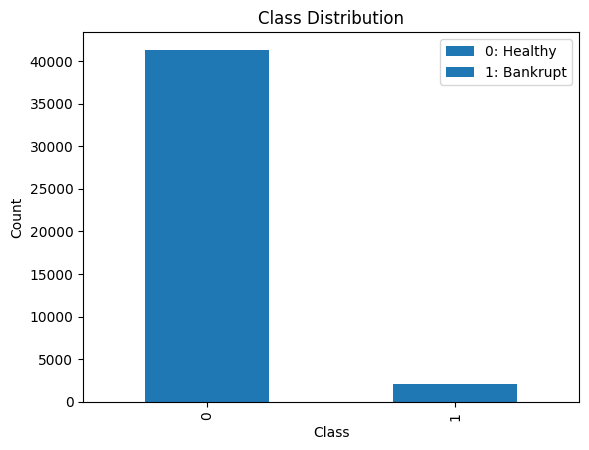

In [ ]:
category_counts = polish_Dataset['class'].value_counts()
ax = category_counts.plot(kind='bar')
category_counts.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend(['0: Healthy', '1: Bankrupt'])
plt.show()

In [ ]:
def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline

    import matplotlib.pyplot as plt

    # Generating multiple subplots
    fig, subPlot = plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20, 5))
    fig.suptitle('Bar charts of: ' + str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar', ax=subPlot[plotNumber])

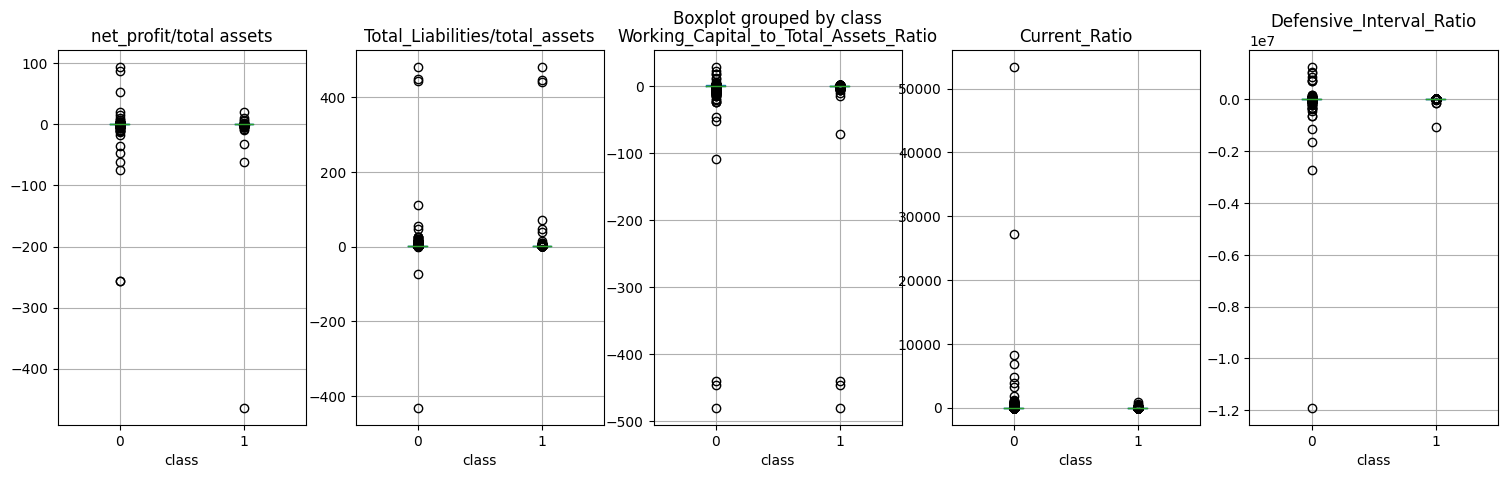

In [ ]:
import matplotlib.pyplot as plt

continuous_cols = ['net_profit/total assets','Total_Liabilities/total_assets','Working_Capital_to_Total_Assets_Ratio','Current_Ratio','Defensive_Interval_Ratio']

fig, axes = plt.subplots(nrows=1, ncols=len(continuous_cols), figsize=(18, 5))

# Creating box plots for each continuous predictor against the Target Variable "class"
for col, ax in zip(continuous_cols, axes):
    polish_Dataset.boxplot(column=col, by='class', figsize=(5,5), vert=True, ax=ax)
    ax.set_title(col)
plt.show()

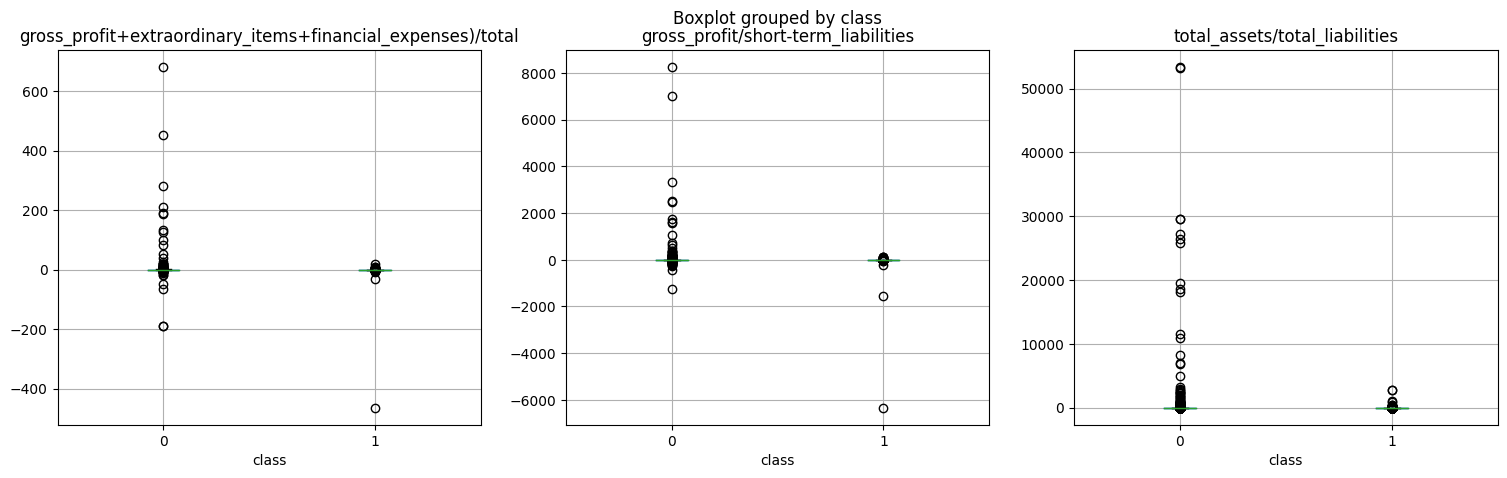

In [ ]:
continuous_cols = ['gross_profit+extraordinary_items+financial_expenses)/total','gross_profit/short-term_liabilities','total_assets/total_liabilities']

fig, axes = plt.subplots(nrows=1, ncols=len(continuous_cols), figsize=(18, 5))

# Creating box plots for each continuous predictor against the Target Variable "class"
for col, ax in zip(continuous_cols, axes):
    polish_Dataset.boxplot(column=col, by='class', figsize=(5,5), vert=True, ax=ax)
    ax.set_title(col)
plt.show()

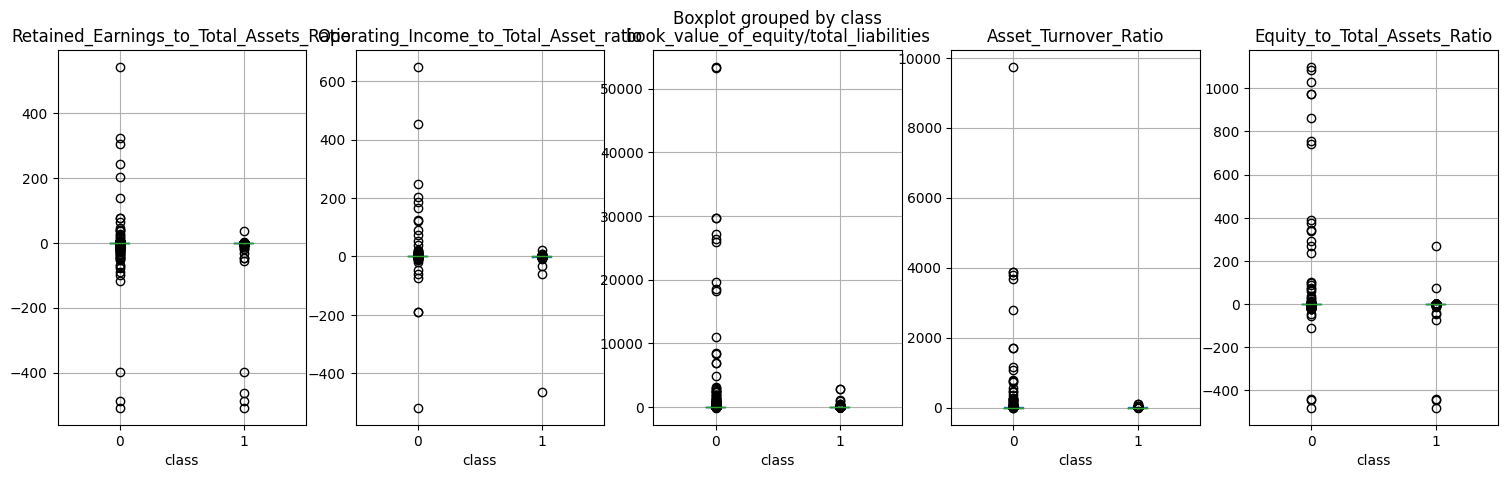

In [ ]:
continuous_cols = ['Retained_Earnings_to_Total_Assets_Ratio','Operating_Income_to_Total_Asset_ratio','book_value_of_equity/total_liabilities','Asset_Turnover_Ratio','Equity_to_Total_Assets_Ratio']

fig, axes = plt.subplots(nrows=1, ncols=len(continuous_cols), figsize=(18, 5))

# Creating box plots for each continuous predictor against the Target Variable "class"
for col, ax in zip(continuous_cols, axes):
    polish_Dataset.boxplot(column=col, by='class', figsize=(5,5), vert=True, ax=ax)
    ax.set_title(col)
plt.show()

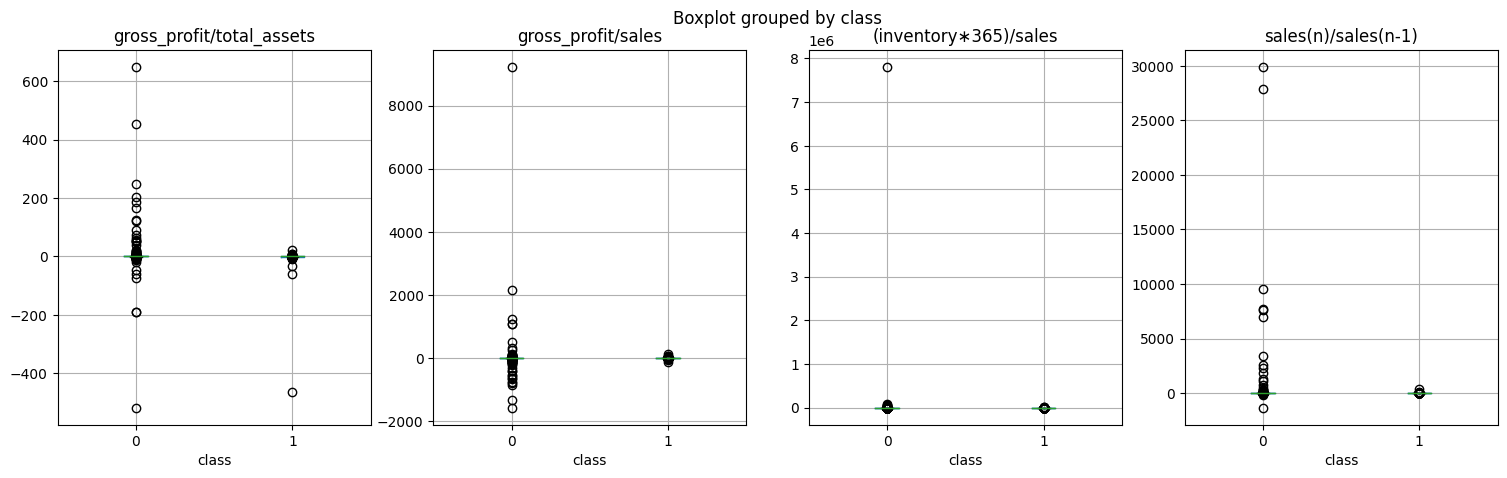

In [ ]:
continuous_cols = ['gross_profit/total_assets','gross_profit/sales','(inventory∗365)/sales','sales(n)/sales(n-1)']

fig, axes = plt.subplots(nrows=1, ncols=len(continuous_cols), figsize=(18, 5))

# Creating box plots for each continuous predictor against the Target Variable "class"
for col, ax in zip(continuous_cols, axes):
    polish_Dataset.boxplot(column=col, by='class', figsize=(5,5), vert=True, ax=ax)
    ax.set_title(col)
plt.show()

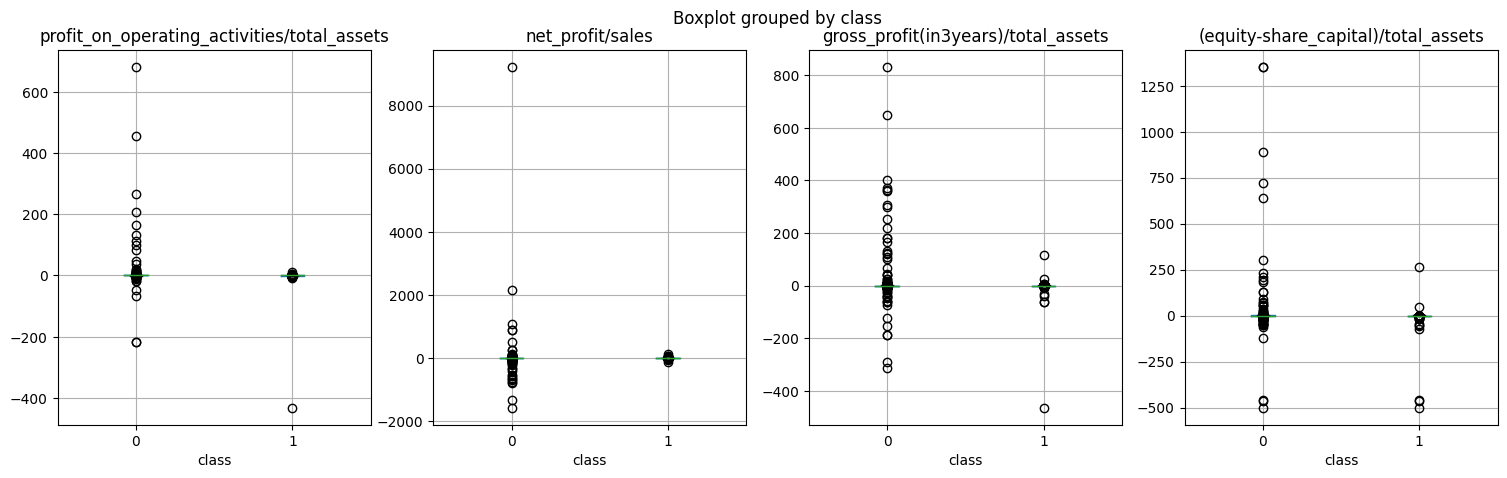

In [ ]:
continuous_cols = ['profit_on_operating_activities/total_assets','net_profit/sales','gross_profit(in3years)/total_assets','(equity-share_capital)/total_assets']

fig, axes = plt.subplots(nrows=1, ncols=len(continuous_cols), figsize=(18, 5))

# Creating box plots for each continuous predictor against the Target Variable "class"
for col, ax in zip(continuous_cols, axes):
    polish_Dataset.boxplot(column=col, by='class', figsize=(5,5), vert=True, ax=ax)
    ax.set_title(col)
plt.show()

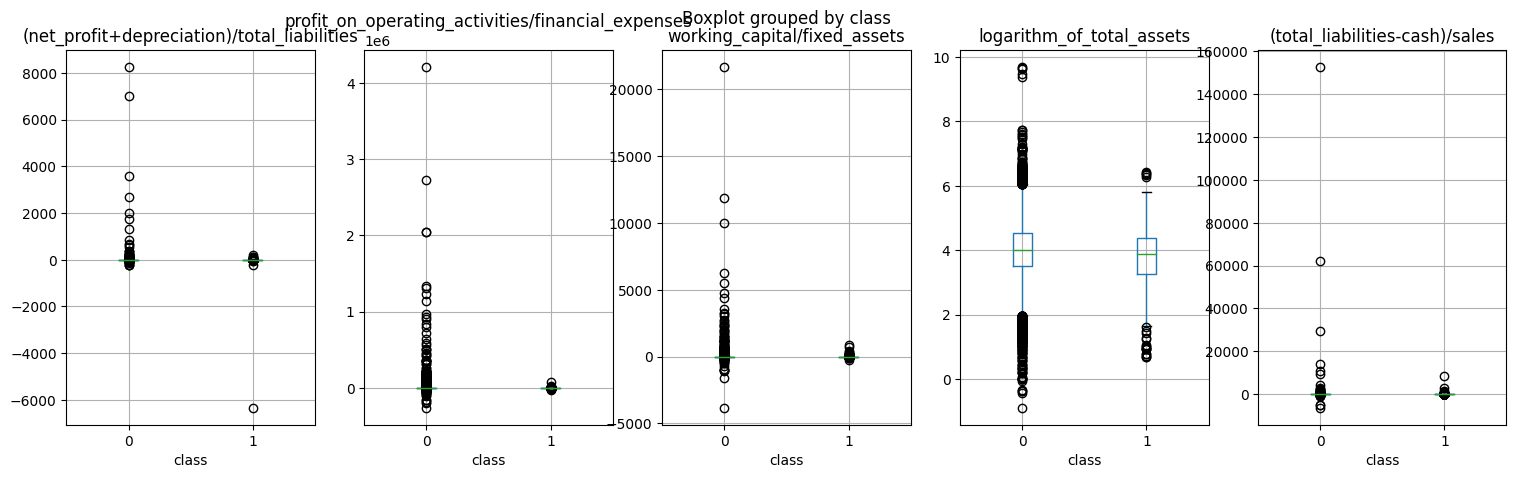

In [ ]:
continuous_cols = ['(net_profit+depreciation)/total_liabilities','profit_on_operating_activities/financial_expenses','working_capital/fixed_assets','logarithm_of_total_assets','(total_liabilities-cash)/sales']

fig, axes = plt.subplots(nrows=1, ncols=len(continuous_cols), figsize=(18, 5))

# Creating box plots for each continuous predictor against the Target Variable "class"
for col, ax in zip(continuous_cols, axes):
    polish_Dataset.boxplot(column=col, by='class', figsize=(5,5), vert=True, ax=ax)
    ax.set_title(col)
plt.show()

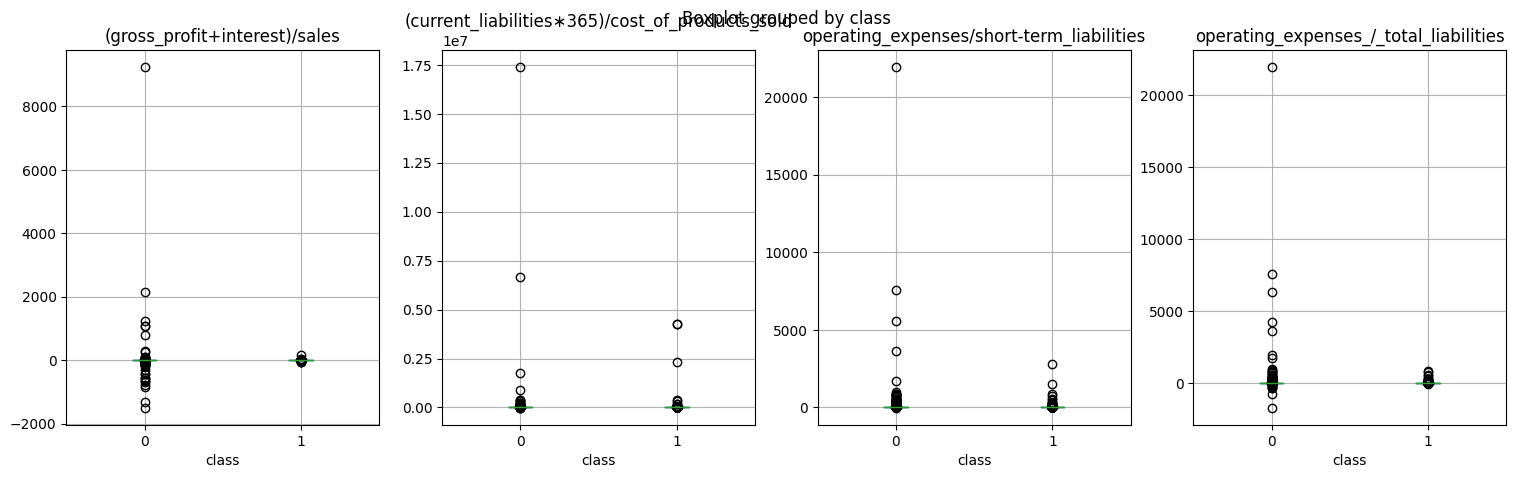

In [ ]:
continuous_cols = ['(gross_profit+interest)/sales','(current_liabilities∗365)/cost_of_products_sold','operating_expenses/short-term_liabilities','operating_expenses_/_total_liabilities']

fig, axes = plt.subplots(nrows=1, ncols=len(continuous_cols), figsize=(18, 5))

# Creating box plots for each continuous predictor against the Target Variable "class"
for col, ax in zip(continuous_cols, axes):
    polish_Dataset.boxplot(column=col, by='class', figsize=(5,5), vert=True, ax=ax)
    ax.set_title(col)
plt.show()

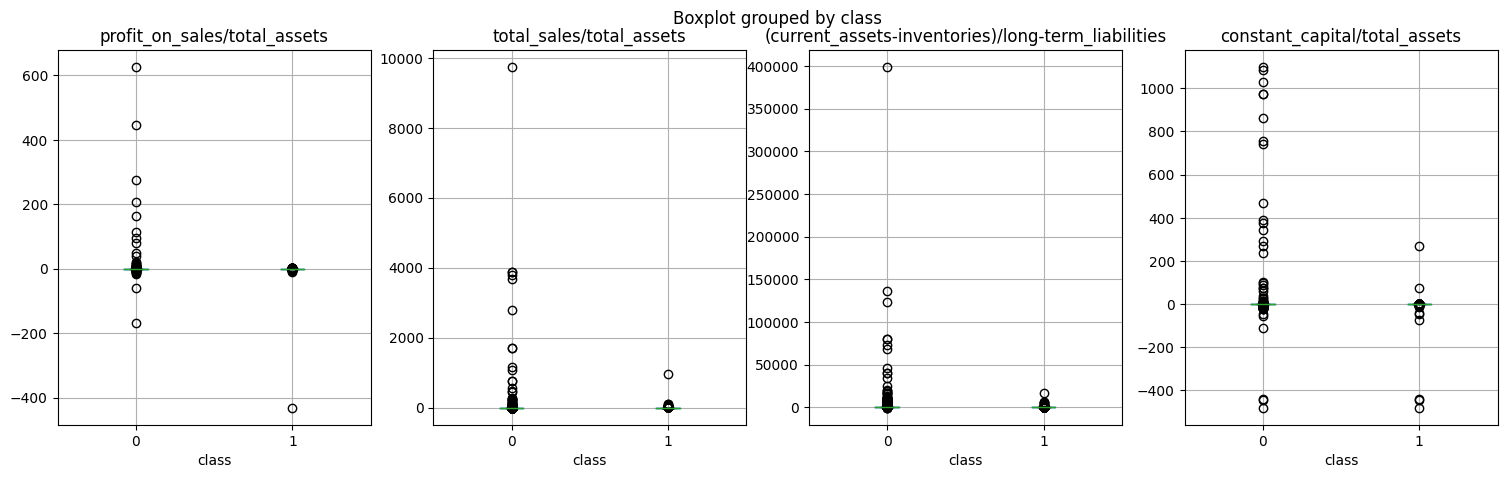

In [ ]:
continuous_cols = ['profit_on_sales/total_assets','total_sales/total_assets','(current_assets-inventories)/long-term_liabilities','constant_capital/total_assets']

fig, axes = plt.subplots(nrows=1, ncols=len(continuous_cols), figsize=(18, 5))

# Creating box plots for each continuous predictor against the Target Variable "class"
for col, ax in zip(continuous_cols, axes):
    polish_Dataset.boxplot(column=col, by='class', figsize=(5,5), vert=True, ax=ax)
    ax.set_title(col)
plt.show()

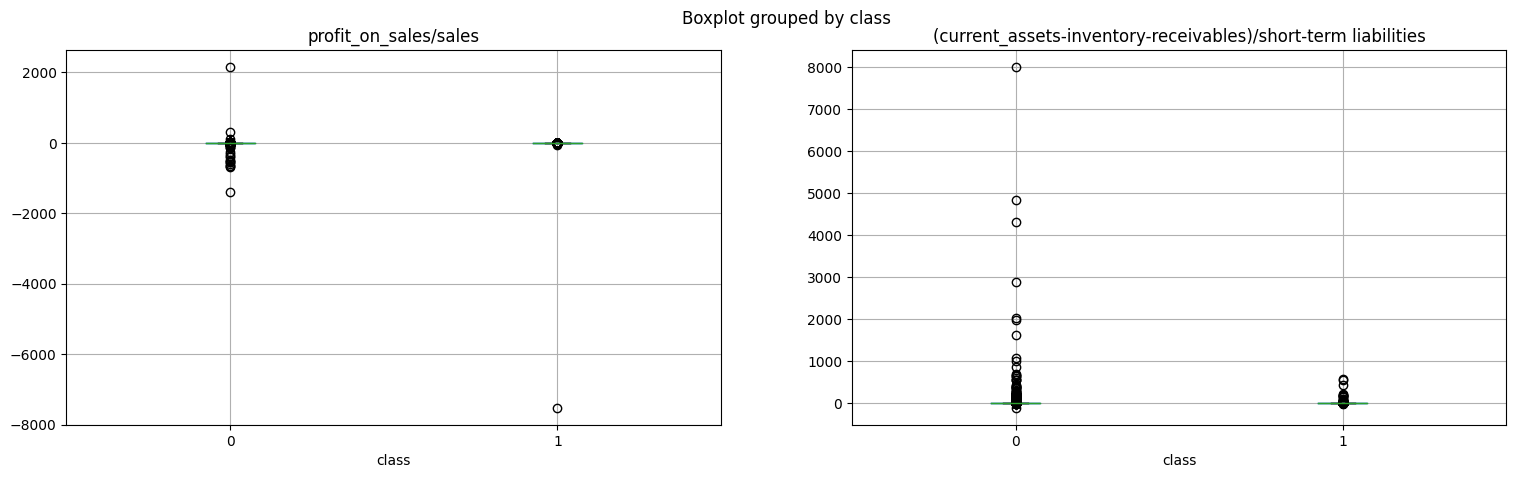

In [ ]:
continuous_cols = ['profit_on_sales/sales','(current_assets-inventory-receivables)/short-term liabilities']

fig, axes = plt.subplots(nrows=1, ncols=len(continuous_cols), figsize=(18, 5))

# Creating box plots for each continuous predictor against the Target Variable "class"
for col, ax in zip(continuous_cols, axes):
    polish_Dataset.boxplot(column=col, by='class', figsize=(5,5), vert=True, ax=ax)
    ax.set_title(col)
plt.show()

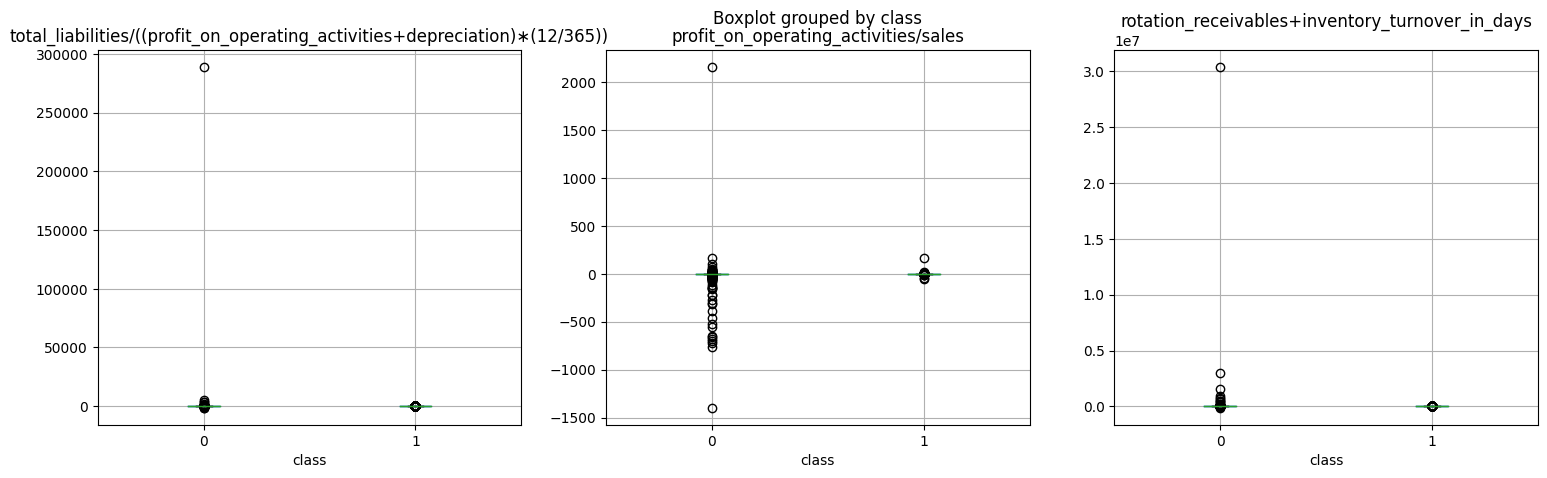

In [ ]:
continuous_cols = ['total_liabilities/((profit_on_operating_activities+depreciation)∗(12/365))','profit_on_operating_activities/sales','rotation_receivables+inventory_turnover_in_days']

fig, axes = plt.subplots(nrows=1, ncols=len(continuous_cols), figsize=(18, 5))

# Creating box plots for each continuous predictor against the Target Variable "class"
for col, ax in zip(continuous_cols, axes):
    polish_Dataset.boxplot(column=col, by='class', figsize=(5,5), vert=True, ax=ax)
    ax.set_title(col)
plt.show()

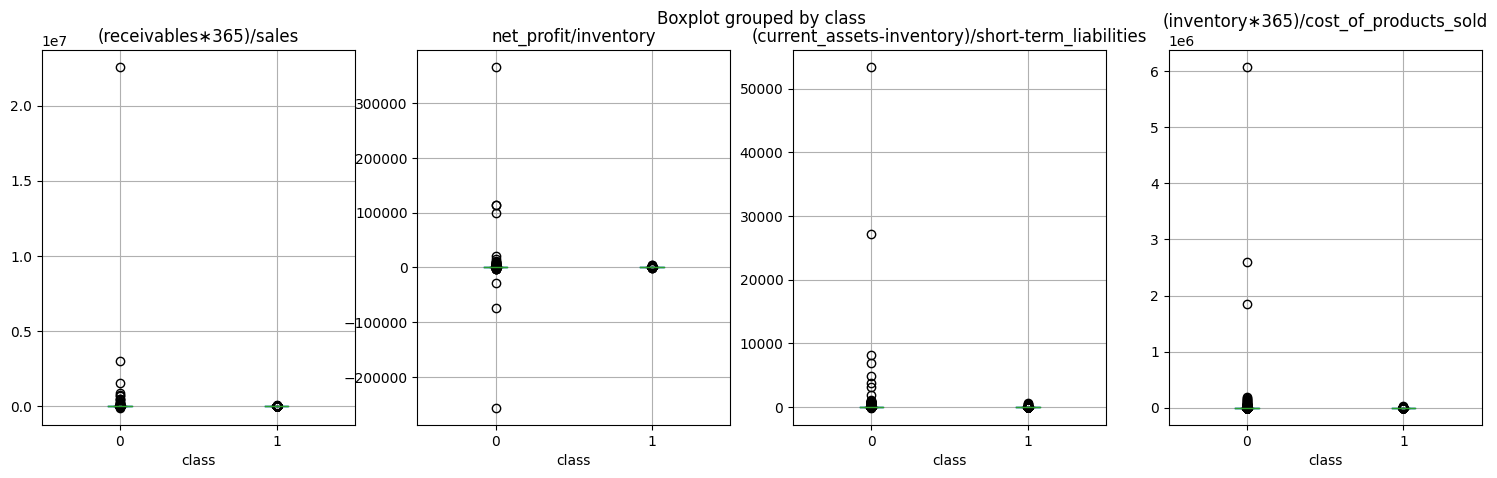

In [ ]:
continuous_cols = ['(receivables∗365)/sales','net_profit/inventory','(current_assets-inventory)/short-term_liabilities','(inventory∗365)/cost_of_products_sold']

fig, axes = plt.subplots(nrows=1, ncols=len(continuous_cols), figsize=(18, 5))

# Creating box plots for each continuous predictor against the Target Variable "class"
for col, ax in zip(continuous_cols, axes):
    polish_Dataset.boxplot(column=col, by='class', figsize=(5,5), vert=True, ax=ax)
    ax.set_title(col)
plt.show()

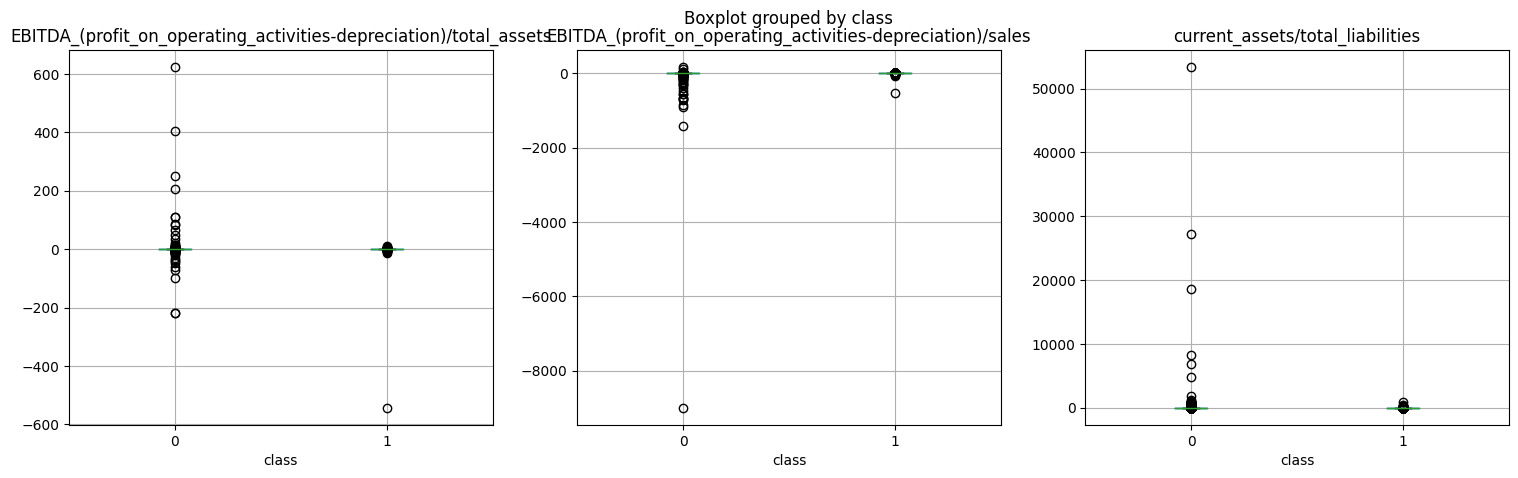

In [ ]:
continuous_cols = ['EBITDA_(profit_on_operating_activities-depreciation)/total_assets','EBITDA_(profit_on_operating_activities-depreciation)/sales','current_assets/total_liabilities']

fig, axes = plt.subplots(nrows=1, ncols=len(continuous_cols), figsize=(18, 5))

# Creating box plots for each continuous predictor against the Target Variable "class"
for col, ax in zip(continuous_cols, axes):
    polish_Dataset.boxplot(column=col, by='class', figsize=(5,5), vert=True, ax=ax)
    ax.set_title(col)
plt.show()

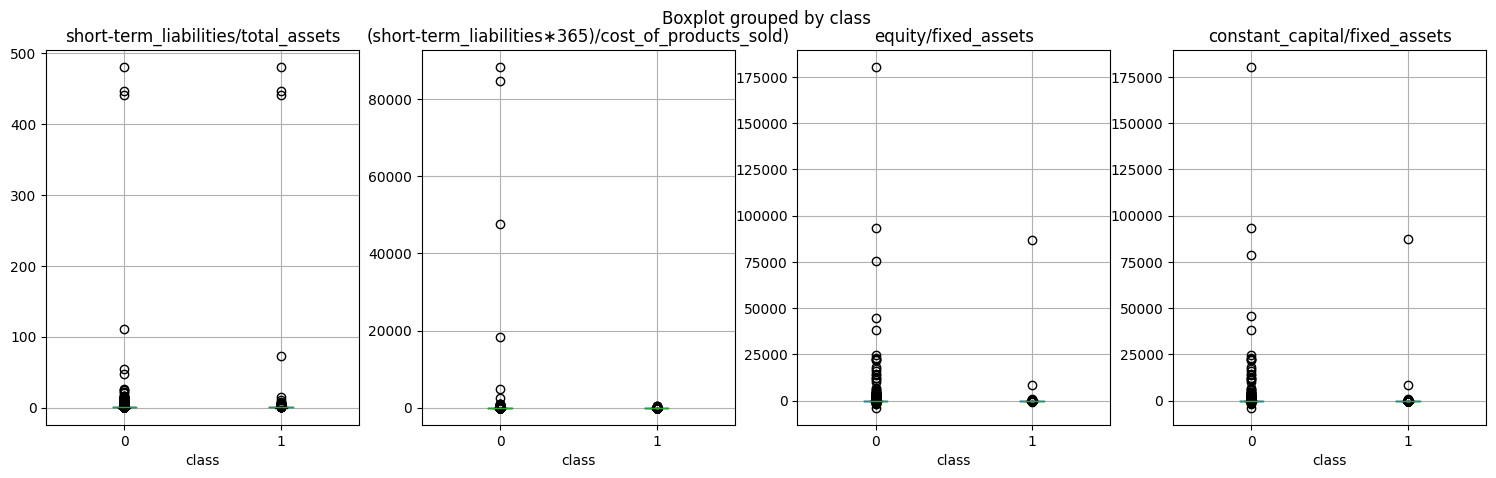

In [ ]:
continuous_cols = ['short-term_liabilities/total_assets','(short-term_liabilities∗365)/cost_of_products_sold)','equity/fixed_assets','constant_capital/fixed_assets']

fig, axes = plt.subplots(nrows=1, ncols=len(continuous_cols), figsize=(18, 5))

# Creating box plots for each continuous predictor against the Target Variable "class"
for col, ax in zip(continuous_cols, axes):
    polish_Dataset.boxplot(column=col, by='class', figsize=(5,5), vert=True, ax=ax)
    ax.set_title(col)
plt.show()

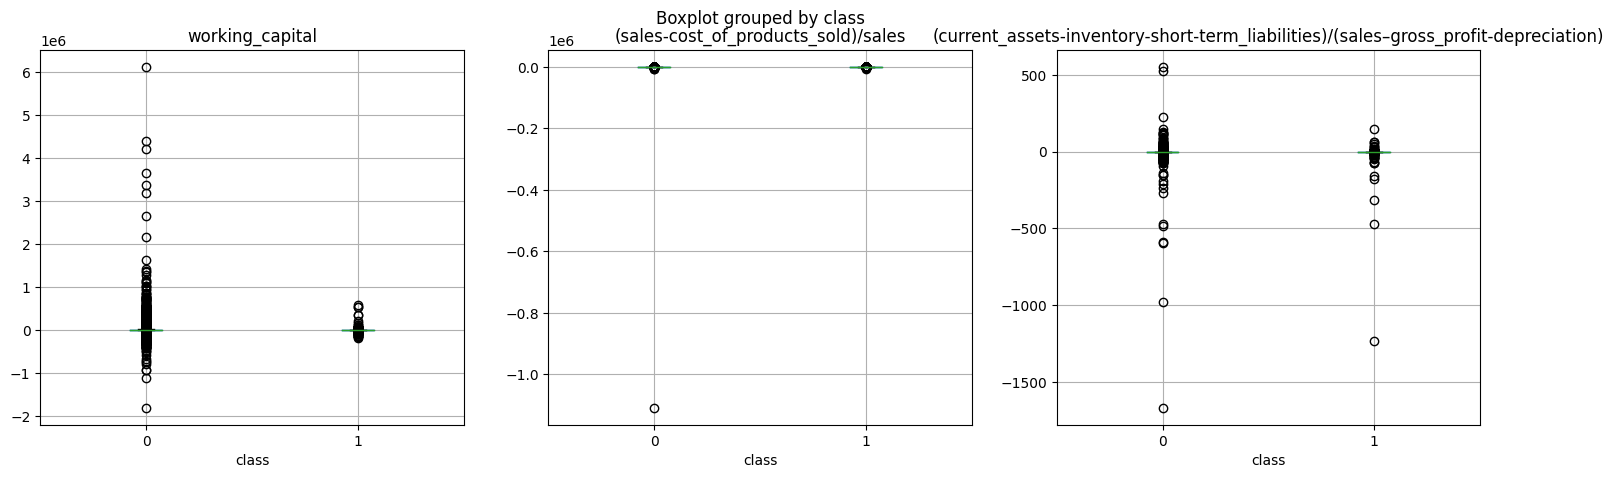

In [ ]:
continuous_cols = ['working_capital','(sales-cost_of_products_sold)/sales','(current_assets-inventory-short-term_liabilities)/(sales–gross_profit-depreciation)']

fig, axes = plt.subplots(nrows=1, ncols=len(continuous_cols), figsize=(18, 5))

# Creating box plots for each continuous predictor against the Target Variable "class"
for col, ax in zip(continuous_cols, axes):
    polish_Dataset.boxplot(column=col, by='class', figsize=(5,5), vert=True, ax=ax)
    ax.set_title(col)
plt.show()

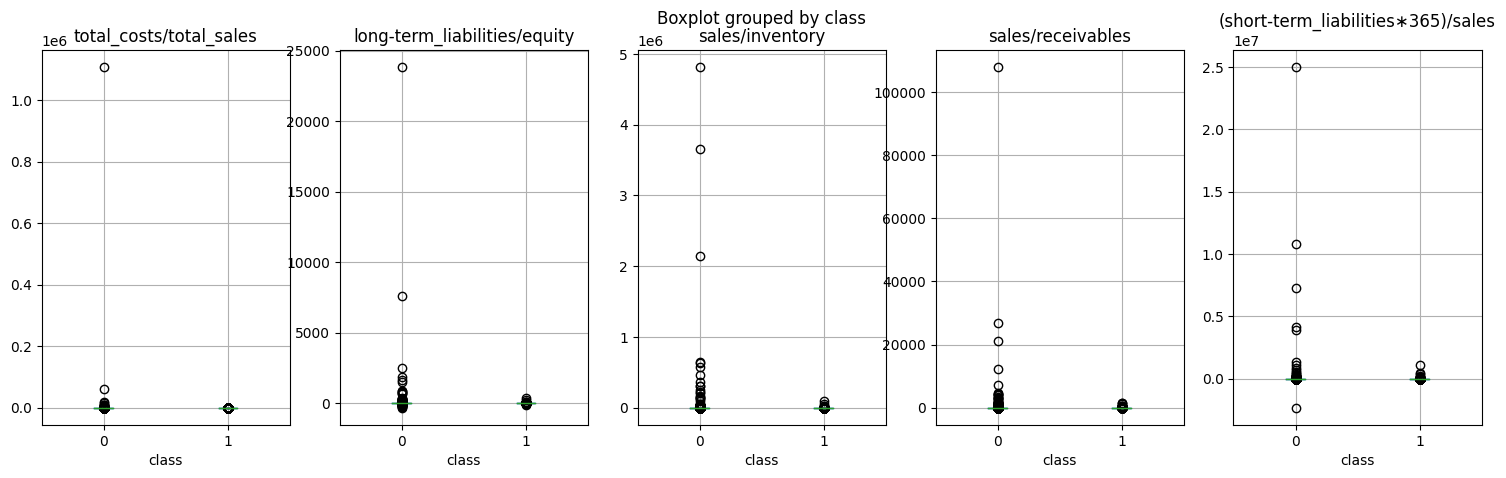

In [ ]:
continuous_cols = ['total_costs/total_sales','long-term_liabilities/equity','sales/inventory','sales/receivables','(short-term_liabilities∗365)/sales']
fig, axes = plt.subplots(nrows=1, ncols=len(continuous_cols), figsize=(18, 5))

# Creating box plots for each continuous predictor against the Target Variable "class"
for col, ax in zip(continuous_cols, axes):
    polish_Dataset.boxplot(column=col, by='class', figsize=(5,5), vert=True, ax=ax)
    ax.set_title(col)
plt.show()

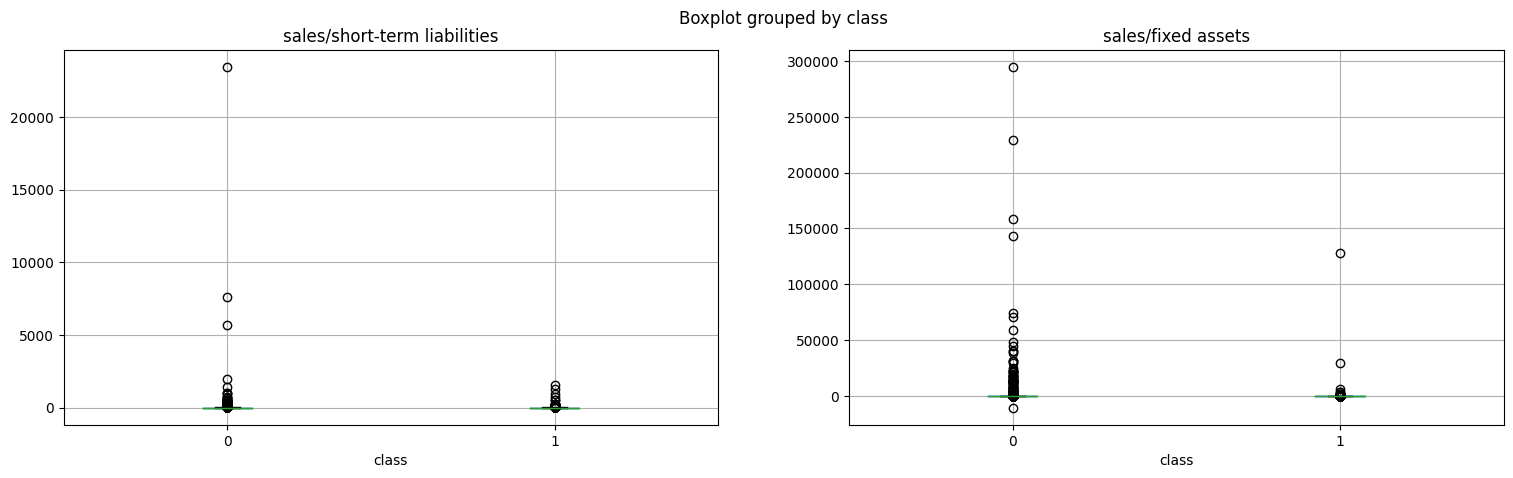

In [ ]:
continuous_cols = ['sales/short-term liabilities','sales/fixed assets']
fig, axes = plt.subplots(nrows=1, ncols=len(continuous_cols), figsize=(18, 5))

# Creating box plots for each continuous predictor against the Target Variable "class"
for col, ax in zip(continuous_cols, axes):
    polish_Dataset.boxplot(column=col, by='class', figsize=(5,5), vert=True, ax=ax)
    ax.set_title(col)
plt.show()

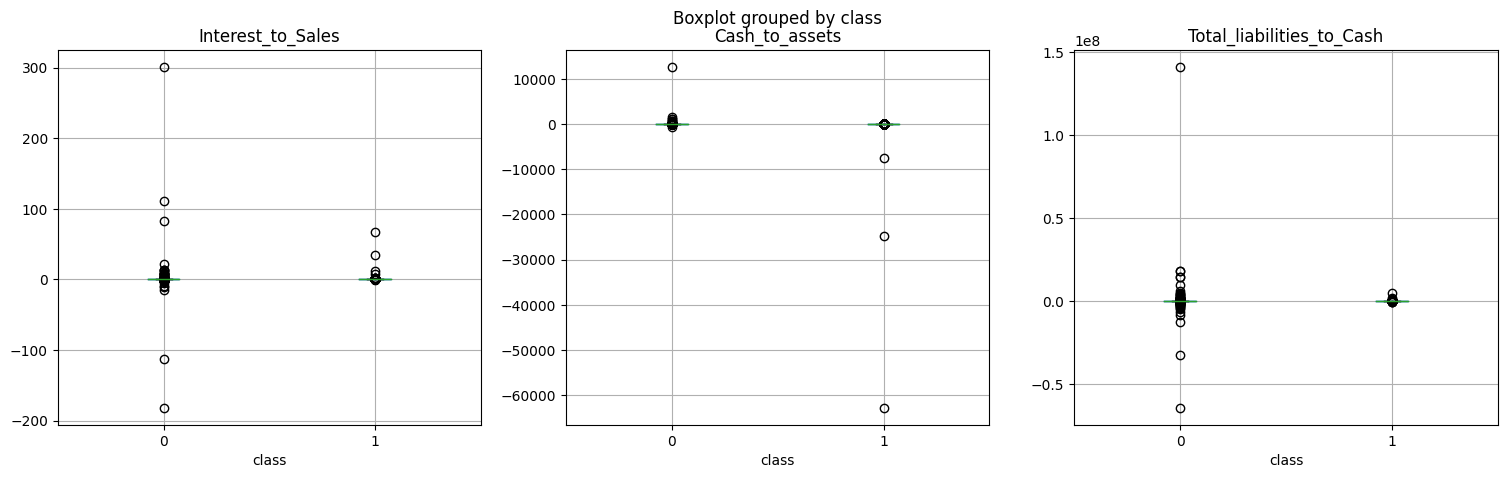

In [ ]:
continuous_cols = ['Interest_to_Sales','Cash_to_assets','Total_liabilities_to_Cash']
fig, axes = plt.subplots(nrows=1, ncols=len(continuous_cols), figsize=(18, 5))

# Creating box plots for each continuous predictor against the Target Variable "class"
for col, ax in zip(continuous_cols, axes):
    polish_Dataset.boxplot(column=col, by='class', figsize=(5,5), vert=True, ax=ax)
    ax.set_title(col)
plt.show()

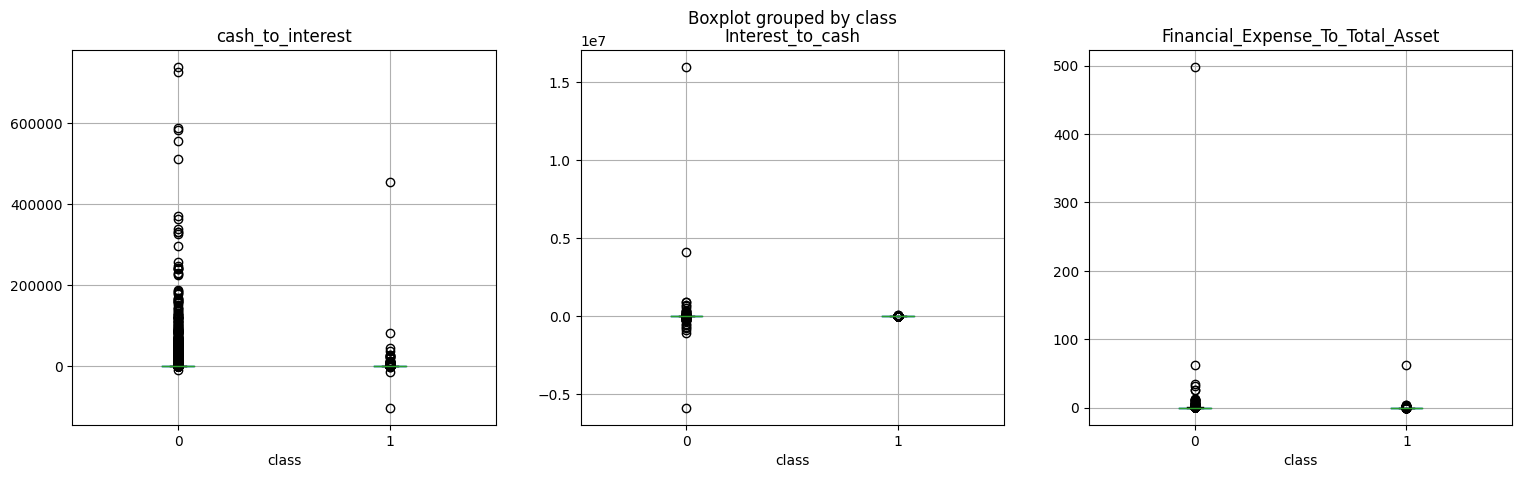

In [ ]:
continuous_cols = ['cash_to_interest','Interest_to_cash','Financial_Expense_To_Total_Asset']
fig, axes = plt.subplots(nrows=1, ncols=len(continuous_cols), figsize=(18, 5))

# Creating box plots for each continuous predictor against the Target Variable "class"
for col, ax in zip(continuous_cols, axes):
    polish_Dataset.boxplot(column=col, by='class', figsize=(5,5), vert=True, ax=ax)
    ax.set_title(col)
plt.show()

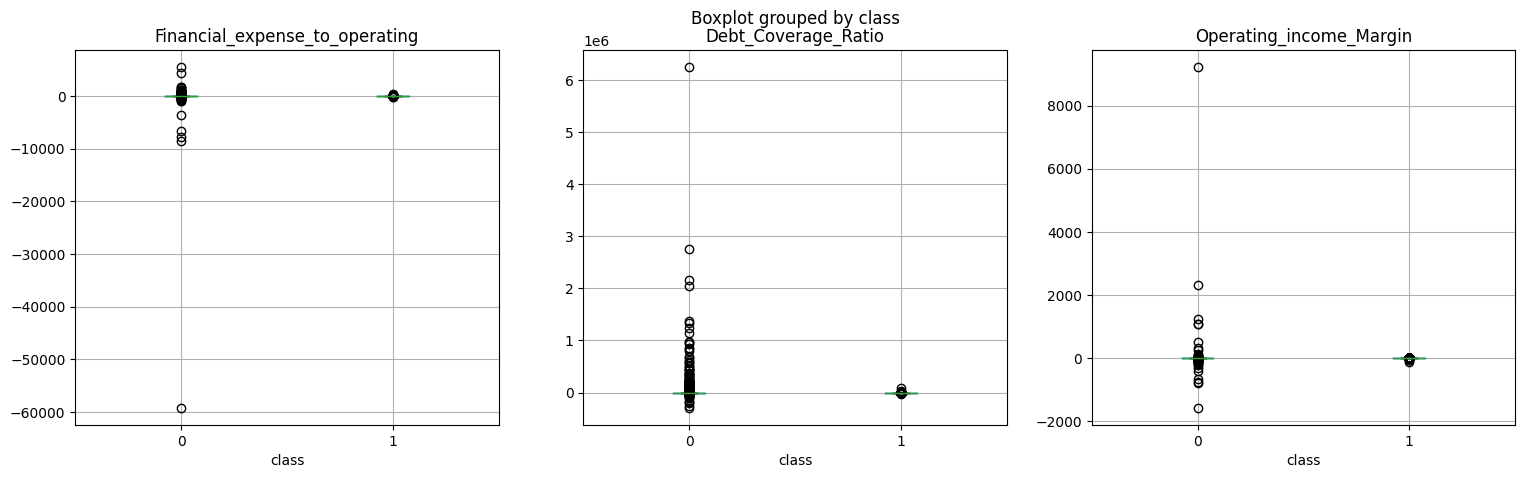

In [ ]:
continuous_cols = ['Financial_expense_to_operating','Debt_Coverage_Ratio','Operating_income_Margin']
fig, axes = plt.subplots(nrows=1, ncols=len(continuous_cols), figsize=(18, 5))

# Creating box plots for each continuous predictor against the Target Variable "class"
for col, ax in zip(continuous_cols, axes):
    polish_Dataset.boxplot(column=col, by='class', figsize=(5,5), vert=True, ax=ax)
    ax.set_title(col)
plt.show()

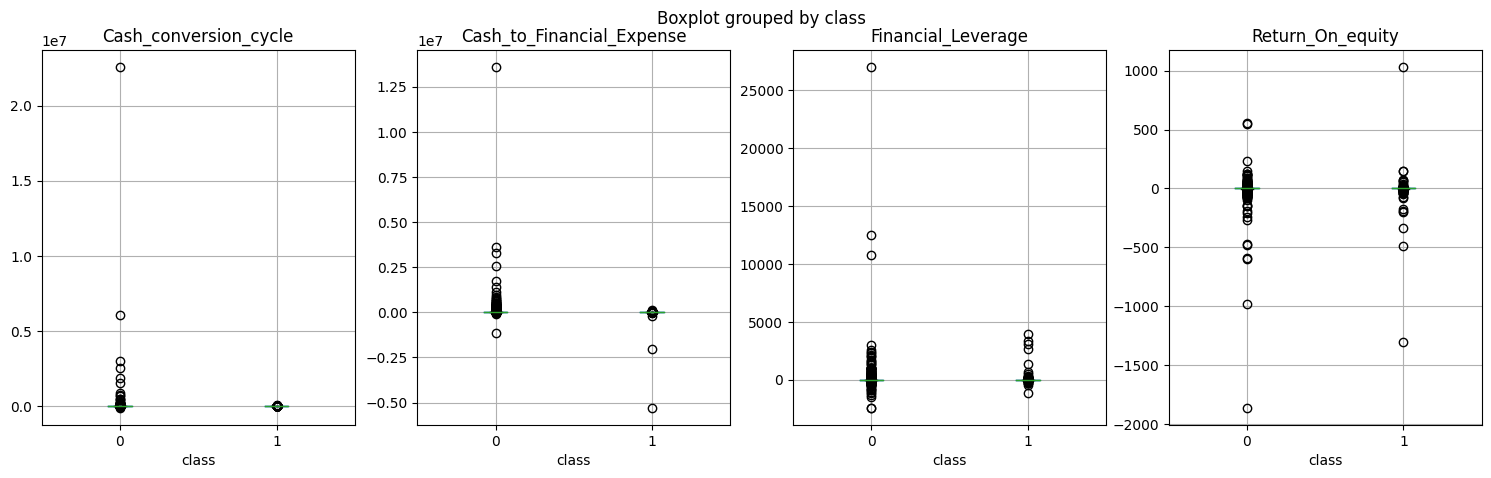

In [ ]:
continuous_cols = ['Cash_conversion_cycle','Cash_to_Financial_Expense','Financial_Leverage','Return_On_equity']
fig, axes = plt.subplots(nrows=1, ncols=len(continuous_cols), figsize=(18, 5))

# Creating box plots for each continuous predictor against the Target Variable "class"
for col, ax in zip(continuous_cols, axes):
    polish_Dataset.boxplot(column=col, by='class', figsize=(5,5), vert=True, ax=ax)
    ax.set_title(col)
plt.show()


In [ ]:
polish_Dataset.isnull().any()

year                                                                                   False
net_profit/total assets                                                                 True
Total_Liabilities/total_assets                                                          True
Working_Capital_to_Total_Assets_Ratio                                                   True
Current_Ratio                                                                           True
Defensive_Interval_Ratio                                                                True
Retained_Earnings_to_Total_Assets_Ratio                                                 True
Operating_Income_to_Total_Asset_ratio                                                   True
book_value_of_equity/total_liabilities                                                  True
Asset_Turnover_Ratio                                                                    True
Equity_to_Total_Assets_Ratio                                          

In [ ]:
#number of null
Features_Null=(polish_Dataset.isnull().sum())
Features_Null

year                                                                                       0
net_profit/total assets                                                                    8
Total_Liabilities/total_assets                                                             8
Working_Capital_to_Total_Assets_Ratio                                                      8
Current_Ratio                                                                            134
Defensive_Interval_Ratio                                                                  89
Retained_Earnings_to_Total_Assets_Ratio                                                    8
Operating_Income_to_Total_Asset_ratio                                                      8
book_value_of_equity/total_liabilities                                                    94
Asset_Turnover_Ratio                                                                       9
Equity_to_Total_Assets_Ratio                                          

In [ ]:
polish_Dataset.corr()

year  \
year                                                                                 1.000000   
net_profit/total assets                                                             -0.004052   
Total_Liabilities/total_assets                                                      -0.004834   
Working_Capital_to_Total_Assets_Ratio                                                0.004653   
Current_Ratio                                                                        0.004548   
Defensive_Interval_Ratio                                                             0.001471   
Retained_Earnings_to_Total_Assets_Ratio                                             -0.000409   
Operating_Income_to_Total_Asset_ratio                                               -0.019313   
book_value_of_equity/total_liabilities                                               0.005614   
Asset_Turnover_Ratio                                                                -0.017984   
Equity_to_Total_Assets_Ratio                                                        -0.021114   
gross_profit+extraordinary_items+financial_expenses)/total                          -0.019025   
gross_profit/short-term_liabilities                                                 -0.000910   
(gross_profit+depreciation)/sales                                                   -0.006130   
(gross_profit+interest)/total_assets                                                -0.019312   
(total_liabilities∗365)/(gross_profit+depreciation)                                  0.002806   
(gross profit+depreciation)/total_liabilities                                       -0.000490   
total_assets/total_liabilities                                                       0.005595   
gross_profit/total_assets                                                           -0.018880   
gross_profit/sales                                                                  -0.004937   
(inventory∗365)/sales                                                               -0.007237   
sales(n)/sales(n-1)                                                                 -0.009455   
profit_on_operating_activities/total_assets                                         -0.016220   
net_profit/sales                                                                    -0.005043   
gross_profit(in3years)/total_assets                                                 -0.011841   
(equity-share_capital)/total_assets                                                 -0.016473   
(net_profit+depreciation)/total_liabilities                                         -0.000569   
profit_on_operating_activities/financial_expenses                                   -0.006109   
working_capital/fixed_assets                                                         0.013252   
logarithm_of_total_assets                                                           -0.015942   
(total_liabilities-cash)/sales                                                      -0.007532   
(gross_profit+interest)/sales                                                       -0.004699   
(current_liabilities∗365)/cost_of_products_sold                                      0.001381   
operating_expenses/short-term_liabilities                                           -0.000124   
operating_expenses_/_total_liabilities                                              -0.000522   
profit_on_sales/total_assets                                                        -0.018639   
total_sales/total_assets                                                            -0.017789   
(current_assets-inventories)/long-term_liabilities                                  -0.006016   
constant_capital/total_assets                                                       -0.020650   
profit_on_sales/sales                                                               -0.005304   
(current_assets-inventory-receivables)/short-term liabilities                        0.009845   
total_liabiliti

<function matplotlib.pyplot.show(close=None, block=None)>

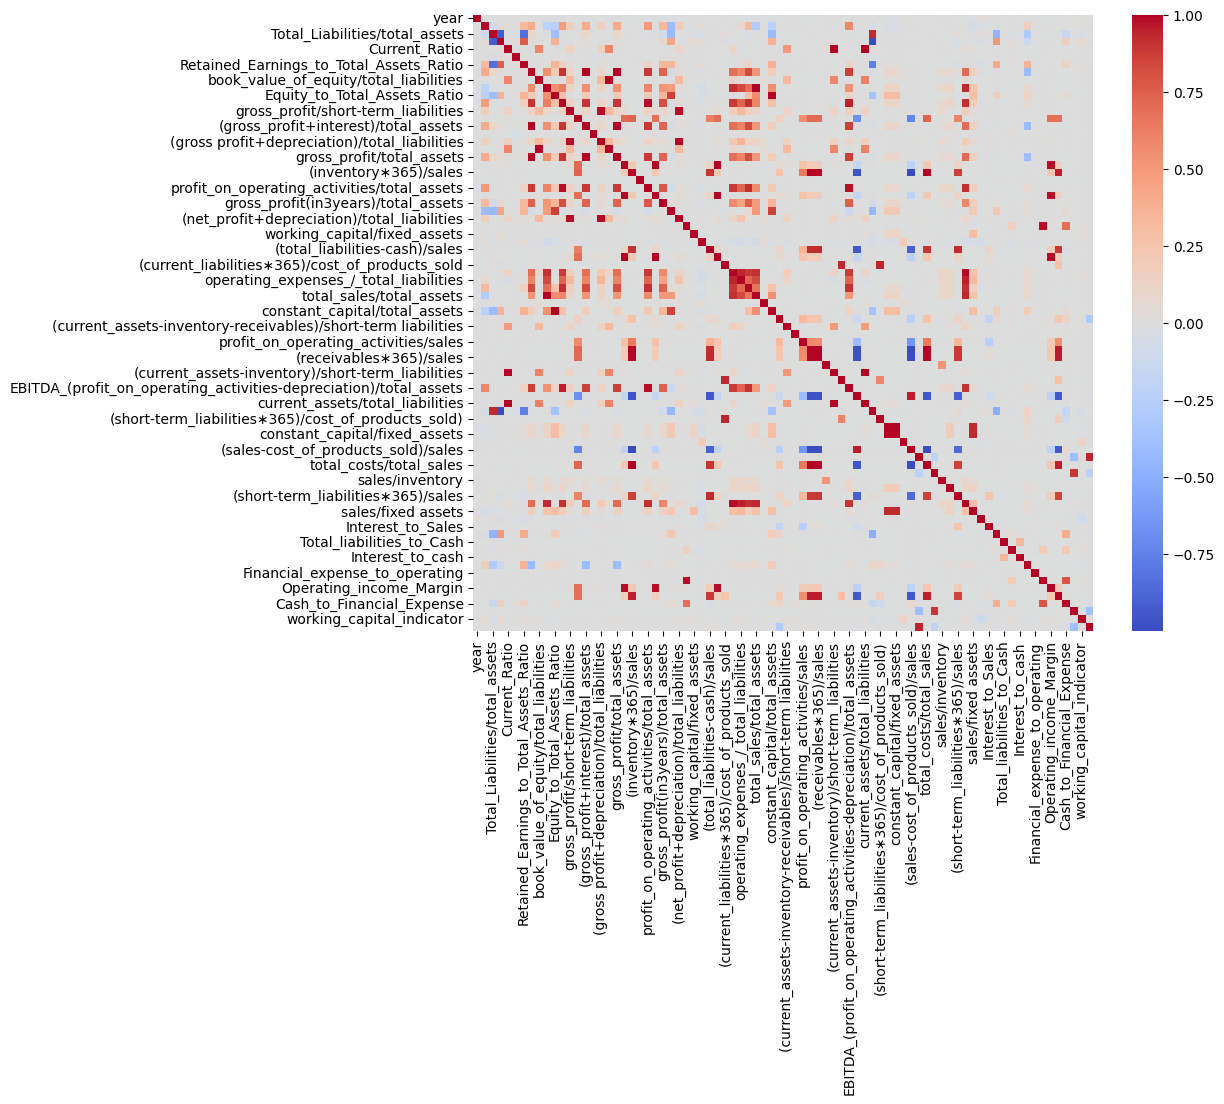

In [ ]:
correlation_matrix = polish_Dataset.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.show

In [ ]:
# based on initial observations, there are many extermine outliers in this dataset. The outliers are extreme in the 0 dataset.
#I will review each attribute and based on industry and financial experience will narrow the feature selections,
#before conducting any cleaning.

#Approach



##Dimensionality Reduction (Logistic Regression & Random Forest)

In [ ]:
from scipy.stats import ttest_ind
import statsmodels.api as sm

# Handle missing values by dropping rows with missing data
polish_Dataset_clean = polish_Dataset.dropna()

# Ensure 'class' is categorical
polish_Dataset_clean['class'] = polish_Dataset_clean['class'].astype('category')

# List of continuous columns
continuous_columns = [
    'net_profit/total assets', 'Total_Liabilities/total_assets', 'Working_Capital_to_Total_Assets_Ratio',
    'Current_Ratio', 'Defensive_Interval_Ratio', 'Retained_Earnings_to_Total_Assets_Ratio',
    'Operating_Income_to_Total_Asset_ratio', 'book_value_of_equity/total_liabilities', 'Asset_Turnover_Ratio',
    'Equity_to_Total_Assets_Ratio', 'gross_profit+extraordinary_items+financial_expenses)/total',
    'gross_profit/short-term_liabilities', '(gross_profit+depreciation)/sales',
    '(gross_profit+interest)/total_assets', '(total_liabilities∗365)/(gross_profit+depreciation)',
    '(gross profit+depreciation)/total_liabilities', 'total_assets/total_liabilities',
    'gross_profit/total_assets', 'gross_profit/sales', '(inventory∗365)/sales', 'sales(n)/sales(n-1)',
    'profit_on_operating_activities/total_assets', 'net_profit/sales', 'gross_profit(in3years)/total_assets',
    '(equity-share_capital)/total_assets', '(net_profit+depreciation)/total_liabilities',
    'profit_on_operating_activities/financial_expenses', 'working_capital/fixed_assets',
    'logarithm_of_total_assets', '(total_liabilities-cash)/sales', '(gross_profit+interest)/sales',
    '(current_liabilities∗365)/cost_of_products_sold', 'operating_expenses/short-term_liabilities',
    'operating_expenses_/_total_liabilities', 'profit_on_sales/total_assets', 'total_sales/total_assets',
    '(current_assets-inventories)/long-term_liabilities', 'constant_capital/total_assets',
    'profit_on_sales/sales', '(current_assets-inventory-receivables)/short-term liabilities',
    'total_liabilities/((profit_on_operating_activities+depreciation)∗(12/365))',
    'profit_on_operating_activities/sales', 'rotation_receivables+inventory_turnover_in_days',
    '(receivables∗365)/sales', 'net_profit/inventory', '(current_assets-inventory)/short-term_liabilities',
    '(inventory∗365)/cost_of_products_sold', 'EBITDA_(profit_on_operating_activities-depreciation)/total_assets',
    'EBITDA_(profit_on_operating_activities-depreciation)/sales', 'current_assets/total_liabilities',
    'short-term_liabilities/total_assets', '(short-term_liabilities∗365)/cost_of_products_sold)',
    'equity/fixed_assets', 'constant_capital/fixed_assets', 'working_capital', '(sales-cost_of_products_sold)/sales',
    '(current_assets-inventory-short-term_liabilities)/(sales–gross_profit-depreciation)',
    'total_costs/total_sales', 'long-term_liabilities/equity', 'sales/inventory', 'sales/receivables',
    '(short-term_liabilities∗365)/sales', 'sales/short-term liabilities', 'sales/fixed assets',
    'Interest_to_Sales', 'Cash_to_assets', 'Total_liabilities_to_Cash', 'cash_to_interest', 'Interest_to_cash',
    'Financial_Expense_To_Total_Asset', 'Financial_expense_to_operating', 'Debt_Coverage_Ratio',
    'Operating_income_Margin', 'Cash_conversion_cycle', 'Cash_to_Financial_Expense', 'Financial_Leverage',
    'Return_On_equity'
]




<ipython-input-53-10a95daf9452>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  polish_Dataset_clean['class'] = polish_Dataset_clean['class'].astype('category')


###Logistic regression testing

In [ ]:

# Perform logistic regression

for col in continuous_columns:
    X = polish_Dataset_clean[col]
    y = polish_Dataset_clean['class'].cat.codes  # Convert categorical 'class' to numerical codes

    # Add constant to X
    X = sm.add_constant(X)

    # Fit logistic regression model
    model = sm.Logit(y, X)
    result = model.fit()

  # Print summary of logistic regression
  #  print(f"Logistic Regression Summary for {col}:")
  #  print(result.summary())

    # Check p-value and add note
    print(f'Summary for {col}: ')
    p_val = result.pvalues[col]
    print(f"  P-value: {p_val}")

    if p_val <= 0.05:
        print("  Note: P-value is less than or equal to 0.05, indicating a significant difference.\n")
    else:
        print("  Note: P-value is greater than 0.05, indicating no significant difference.\n")



Optimization terminated successfully.
         Current function value: 0.180916
         Iterations 7
Summary for net_profit/total assets: 
  P-value: 2.8839233163618935e-27
  Note: P-value is less than or equal to 0.05, indicating a significant difference.

Optimization terminated successfully.
         Current function value: 0.183148
         Iterations 7
Summary for Total_Liabilities/total_assets: 
  P-value: 2.954968663776984e-19
  Note: P-value is less than or equal to 0.05, indicating a significant difference.

Optimization terminated successfully.
         Current function value: 0.181819
         Iterations 7
Summary for Working_Capital_to_Total_Assets_Ratio: 
  P-value: 5.3211203686323745e-24
  Note: P-value is less than or equal to 0.05, indicating a significant difference.

Optimization terminated successfully.
         Current function value: 0.178788
         Iterations 9
Summary for Current_Ratio: 
  P-value: 1.409759677433866e-20
  Note: P-value is less than or equal to

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


###Random Forest

                                                   importance
Cash_to_assets                                       0.091916
cash_to_interest                                     0.069459
Total_liabilities_to_Cash                            0.060540
Cash_to_Financial_Expense                            0.055671
Interest_to_cash                                     0.037461
gross_profit(in3years)/total_assets                  0.031761
total_costs/total_sales                              0.021268
(current_assets-inventory)/short-term_liabilities    0.018589
logarithm_of_total_assets                            0.015406
(sales-cost_of_products_sold)/sales                  0.012982
constant_capital/fixed_assets                        0.012955
(net_profit+depreciation)/total_liabilities          0.012860
Interest_to_Sales                                    0.012508
(gross_profit+depreciation)/sales                    0.012068
working_capital                                      0.011907
constant

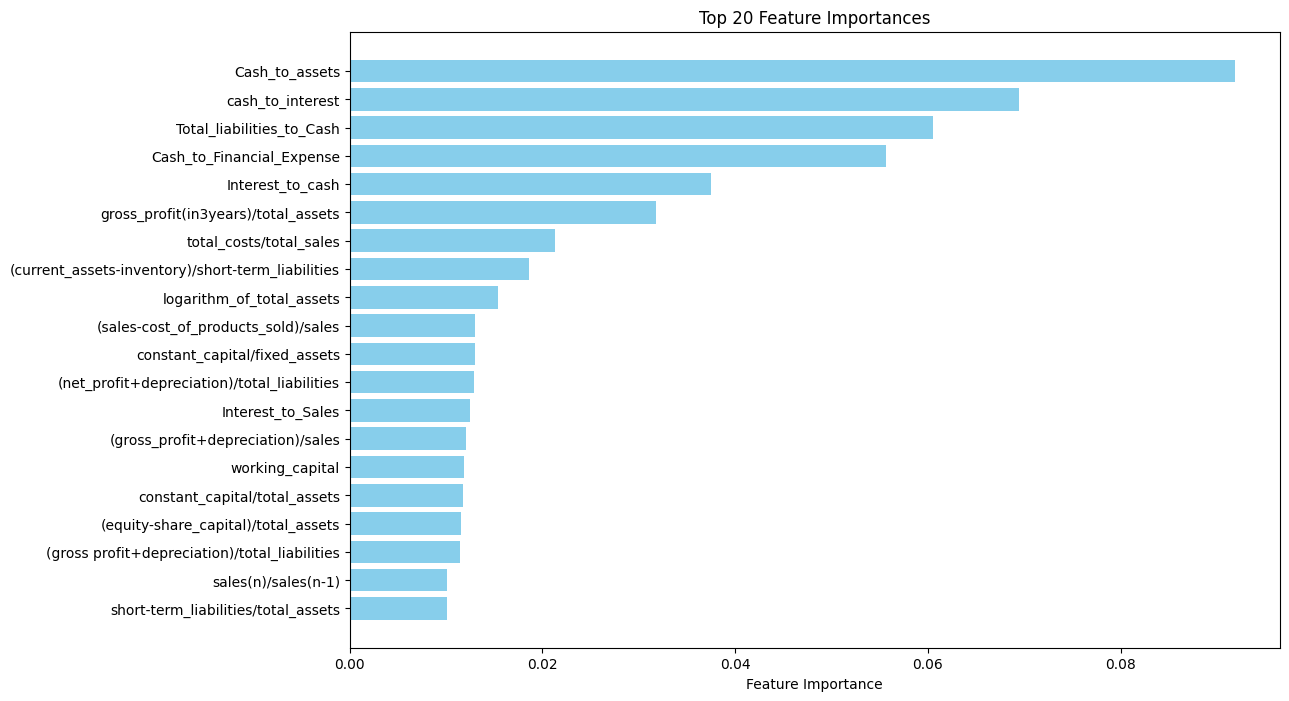

In [ ]:
# Define features (X) and target (y)
X = polish_Dataset_clean.drop('class', axis=1)
y = polish_Dataset_clean['class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Extract feature importances
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index=X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

# Display the top 10 features
print(feature_importances.head(20))

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importances.index[:20], feature_importances['importance'][:20], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Top 20 Feature Importances')
plt.gca().invert_yaxis()
plt.show()

##New feature selections for models

After careful analyzing all the features. The theme of selection came down to:
**Reason for companies to go bankrupt:**
1.	**Failure of Business Strategy:**
    a.	Lack of governance
      i.	Failure to understand key metrics can lead to bankruptcy.
    b.	Market trends
      i.	Failing to see what competitors are doing
      ii.	Market sentiment shifts and not adjusting
2.**Inefficient use of assets**
    a.	Management fails to generate income from assets
    b.	Holding inventory too long
    c.	Negative Working Capital
3.	**Too much Debt**
    a.	Debt used to pay for Working capital
    b.	Debt used to pay for equipment, plant
    c.	Operating profits can’t cover interest
4.**Not enough Cash flow**
    a.	Not enough cash on hand
    b.	Not collecting from account receivables
    c.	Sales are not enough to cover expenses
    d.	Cash conversation cycle is too long
    e.	Cash can’t cover interest
    f.	Days payable is too high

In [ ]:
#this resulted in the folliwng:
#analysis and data cleaning will be done on this new dataset.
Bankrupt_model = polish_Dataset[['year',
    'Cash_to_assets',
    'cash_to_interest',
    'Total_liabilities_to_Cash',
    'Cash_to_Financial_Expense',
    'Interest_to_cash',
    'total_costs/total_sales',
    '(current_assets-inventory)/short-term_liabilities',
    'logarithm_of_total_assets',
    '(sales-cost_of_products_sold)/sales',
    'constant_capital/fixed_assets',
    'Interest_to_Sales',
    'working_capital',
    'constant_capital/total_assets',
    '(equity-share_capital)/total_assets',
    'sales(n)/sales(n-1)',
    'short-term_liabilities/total_assets','class']]
Bankrupt_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43405 entries, 0 to 43404
Data columns (total 18 columns):
 #   Column                                             Non-Null Count  Dtype   
---  ------                                             --------------  -----   
 0   year                                               43405 non-null  int64   
 1   Cash_to_assets                                     43270 non-null  float64 
 2   cash_to_interest                                   23529 non-null  float64 
 3   Total_liabilities_to_Cash                          43238 non-null  float64 
 4   Cash_to_Financial_Expense                          37567 non-null  float64 
 5   Interest_to_cash                                   23511 non-null  float64 
 6   total_costs/total_sales                            43321 non-null  float64 
 7   (current_assets-inventory)/short-term_liabilities  43270 non-null  float64 
 8   logarithm_of_total_assets                          43397 non-null  float64 


<function matplotlib.pyplot.show(close=None, block=None)>

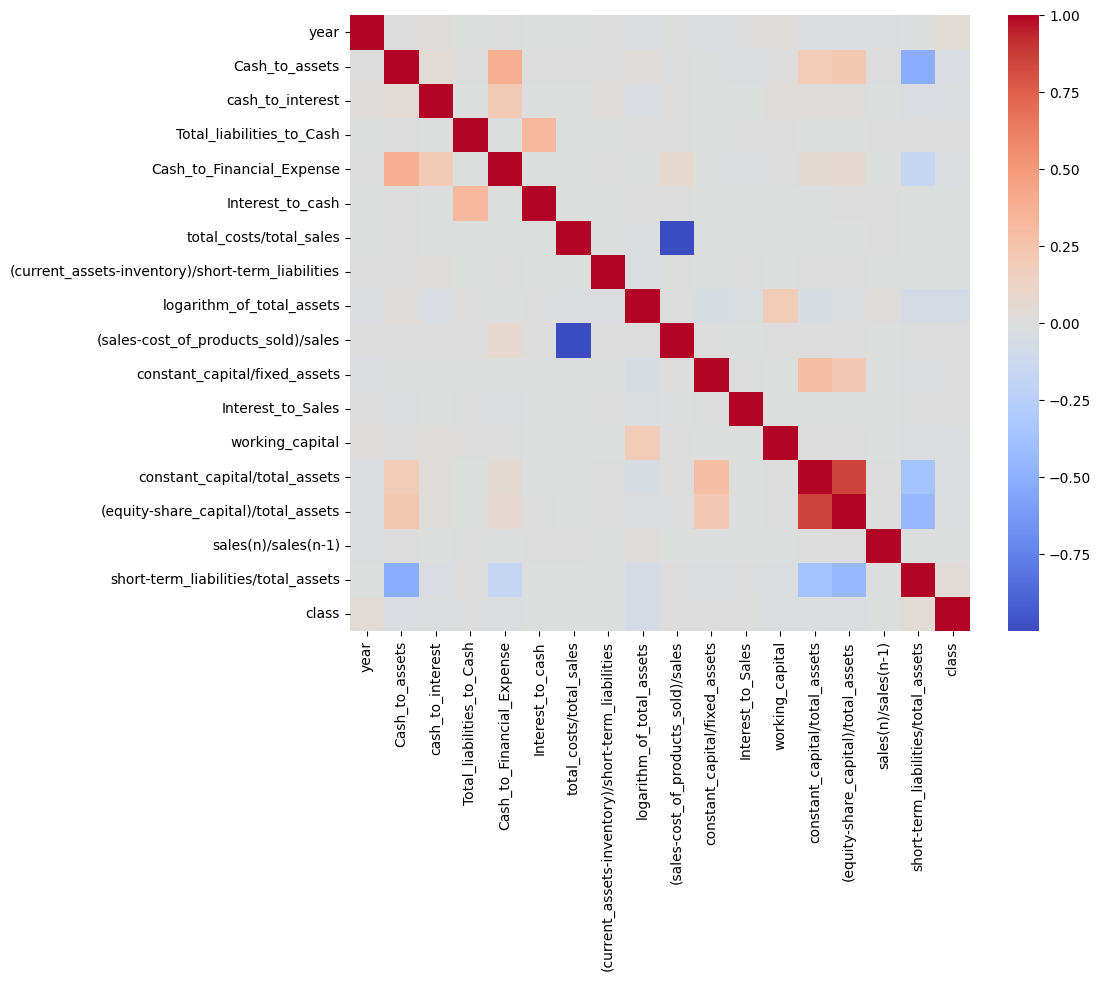

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(Bankrupt_model.corr(), annot=False, cmap='coolwarm', fmt=".2f")
plt.show

In [ ]:
pd.options.display.float_format = "{:.3f}".format
Bankrupt_model.describe()

year  Cash_to_assets  cash_to_interest  Total_liabilities_to_Cash  \
count 43405.000       43270.000         23529.000                  43238.000   
mean      2.940          -1.694          1535.972                   2881.205   
std       1.284         331.746         15145.109                 787900.726   
min       1.000      -62701.320       -103000.374              -64078999.678   
25%       2.000           0.006             0.322                      1.105   
50%       3.000           0.037             2.203                      6.574   
75%       4.000           0.130            21.143                     33.245   
max       5.000       12643.204        738251.408              140981668.045   

       Cash_to_Financial_Expense  Interest_to_cash  total_costs/total_sales  \
count                  37567.000         23511.000                43321.000   
mean                    1602.862           617.736                   30.026   
std                    84176.481        115662.865                 5334.454   
min                 -5282808.239      -5855701.082                 -198.690   
25%                        0.089             0.015                    0.875   
50%                        0.717             0.257                    0.951   
75%                        4.571             1.585                    0.993   
max                 13597750.957      15987106.466              1108300.000   

       (current_assets-inventory)/short-term_liabilities  logarithm_of_total_assets  \
count                                          43270.000                  43397.000   
mean                                               5.429                      4.005   
std                                              295.356                      0.827   
min                                             -101.260                     -0.886   
25%                                                0.607                      3.495   
50%                                                1.027                      4.014   
75%                                                1.911                      4.520   
max                                            53433.000                      9.698   

       (sales-cost_of_products_sold)/sales  constant_capital/fixed_assets  Interest_to_Sales  \
count                            43278.000                      42593.000          43277.000   
mean                               -26.220                         24.655              0.021   
std                               5327.862                       1220.884              1.949   
min                           -1108300.000                      -3828.900           -181.810   
25%                                  0.009                          0.956              0.000   
50%                                  0.053                          1.377              0.000   
75%                                  0.129                          2.370              0.007   
max                                293.150                     180440.000            301.300   

       working_capital  constant_capital/total_assets  (equity-share_capital)/total_assets  \
count        43404.000                      43397.000                            43397.000   
mean          7672.346                          0.724                                0.393   
std          70053.490                         14.749                               12.891   
min       -1810000.000                       -479.910                             -500.930   
25%             27.554                          0.420                                0.150   
50%           1088.350                          0.612                                0.385   
75%           4993.325                          0.772                                0.611   
max        6120000.000                       1099.500                             1353.300   

       sales(n)/sales(n-1)  short-term_liabilities/total_assets  
count           

In [ ]:
#exterime outliers are detected with the first analysis. will use a range with a multiper to remove the exterme outliers.

In [ ]:
Bankrupt_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43405 entries, 0 to 43404
Data columns (total 18 columns):
 #   Column                                             Non-Null Count  Dtype   
---  ------                                             --------------  -----   
 0   year                                               43405 non-null  int64   
 1   Cash_to_assets                                     43270 non-null  float64 
 2   cash_to_interest                                   23529 non-null  float64 
 3   Total_liabilities_to_Cash                          43238 non-null  float64 
 4   Cash_to_Financial_Expense                          37567 non-null  float64 
 5   Interest_to_cash                                   23511 non-null  float64 
 6   total_costs/total_sales                            43321 non-null  float64 
 7   (current_assets-inventory)/short-term_liabilities  43270 non-null  float64 
 8   logarithm_of_total_assets                          43397 non-null  float64 


In [ ]:
#adjusting for outliers
numeric_cols = Bankrupt_model.select_dtypes(include=[float]).columns
numeric_cols

Index(['Cash_to_assets', 'cash_to_interest', 'Total_liabilities_to_Cash',
       'Cash_to_Financial_Expense', 'Interest_to_cash', 'total_costs/total_sales',
       '(current_assets-inventory)/short-term_liabilities', 'logarithm_of_total_assets',
       '(sales-cost_of_products_sold)/sales', 'constant_capital/fixed_assets', 'Interest_to_Sales',
       'working_capital', 'constant_capital/total_assets', '(equity-share_capital)/total_assets',
       'sales(n)/sales(n-1)', 'short-term_liabilities/total_assets'],
      dtype='object')

In [ ]:
#adjusting for outliers
numeric_cols = Bankrupt_model.select_dtypes(include=[float, int]).columns
# Calculate Q1, Q3, and IQR for each column
Q1 = Bankrupt_model[numeric_cols].quantile(0.25)
Q3 = Bankrupt_model[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

# Create a boolean DataFrame indicating whether each value is an outlier
outliers = (Bankrupt_model[numeric_cols] < lower_bound) | (Bankrupt_model[numeric_cols] > upper_bound)

# Filter rows that contain any outliers
rows_with_outliers = outliers.any(axis=1)
Bankruptcleaned_model = Bankrupt_model[~rows_with_outliers]

Bankruptcleaned_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19048 entries, 4 to 43404
Data columns (total 18 columns):
 #   Column                                             Non-Null Count  Dtype   
---  ------                                             --------------  -----   
 0   year                                               19048 non-null  int64   
 1   Cash_to_assets                                     19021 non-null  float64 
 2   cash_to_interest                                   9123 non-null   float64 
 3   Total_liabilities_to_Cash                          19018 non-null  float64 
 4   Cash_to_Financial_Expense                          17689 non-null  float64 
 5   Interest_to_cash                                   9122 non-null   float64 
 6   total_costs/total_sales                            19028 non-null  float64 
 7   (current_assets-inventory)/short-term_liabilities  19024 non-null  float64 
 8   logarithm_of_total_assets                          19043 non-null  float64 
 9   

In [ ]:
print(len(Bankrupt_model))
print(len(Bankruptcleaned_model))

43405
19048


In [ ]:
Bankruptcleaned_model.describe()

year  Cash_to_assets  cash_to_interest  Total_liabilities_to_Cash  \
count 19048.000       19021.000          9123.000                  19018.000   
mean      2.870           0.063             6.901                     17.611   
std       1.298           0.086            11.950                     31.886   
min       1.000          -0.364           -52.971                    -95.252   
25%       2.000           0.012             0.945                      2.780   
50%       3.000           0.035             2.742                      9.527   
75%       4.000           0.087             7.675                     27.685   
max       5.000           0.501            83.456                    129.648   

       Cash_to_Financial_Expense  Interest_to_cash  total_costs/total_sales  \
count                  17689.000          9122.000                19028.000   
mean                       1.905             0.682                    0.951   
std                        3.250             1.002                    0.093   
min                      -12.981            -4.523                    0.524   
25%                        0.177             0.111                    0.910   
50%                        0.672             0.317                    0.963   
75%                        2.111             0.893                    0.995   
max                       18.005             6.267                    1.344   

       (current_assets-inventory)/short-term_liabilities  logarithm_of_total_assets  \
count                                          19024.000                  19043.000   
mean                                               1.175                      4.023   
std                                                0.917                      0.627   
min                                               -0.343                      0.687   
25%                                                0.598                      3.642   
50%                                                0.908                      4.087   
75%                                                1.420                      4.446   
max                                                5.810                      6.584   

       (sales-cost_of_products_sold)/sales  constant_capital/fixed_assets  Interest_to_Sales  \
count                            19026.000                      18864.000          19026.000   
mean                                 0.052                          1.540              0.004   
std                                  0.096                          1.091              0.006   
min                                 -0.349                         -3.084             -0.021   
25%                                  0.007                          0.943              0.000   
50%                                  0.041                          1.254              0.000   
75%                                  0.095                          1.825              0.006   
max                                  0.483                          6.607              0.029   

       working_capital  constant_capital/total_assets  (equity-share_capital)/total_assets  \
count        19048.000                      19043.000                            19043.000   
mean          2708.278                          0.559                                0.372   
std           5091.880                          0.227                                0.294   
min         -14863.000                         -0.614                               -1.226   
25%             58.023                          0.422                                0.186   
50%           1182.100                          0.587                                0.393   
75%           4568.350                          0.730                                0.586   
max          19885.000                          1.170                                1.000   

       sales(n)/sales(n-1)  short-term_liabilities/total_assets  
count           

In [ ]:
#certain columns should not be less than zero. if it is zero, that data point is meaningless

In [ ]:
Bankruptcleaned_model.corr()

year  Cash_to_assets  cash_to_interest  \
year                                               1.000          -0.007             0.015   
Cash_to_assets                                    -0.007           1.000             0.471   
cash_to_interest                                   0.015           0.471             1.000   
Total_liabilities_to_Cash                         -0.001          -0.217            -0.282   
Cash_to_Financial_Expense                          0.008           0.419             0.504   
Interest_to_cash                                  -0.002          -0.328            -0.310   
total_costs/total_sales                            0.057          -0.131            -0.037   
(current_assets-inventory)/short-term_liabilities  0.025           0.460             0.309   
logarithm_of_total_assets                          0.006          -0.155            -0.046   
(sales-cost_of_products_sold)/sales               -0.062           0.133             0.037   
constant_capital/fixed_assets                      0.021           0.278             0.173   
Interest_to_Sales                                  0.027          -0.072            -0.325   
working_capital                                    0.038           0.185             0.120   
constant_capital/total_assets                      0.016           0.123             0.122   
(equity-share_capital)/total_assets                0.007           0.168             0.153   
sales(n)/sales(n-1)                               -0.001           0.012             0.010   
short-term_liabilities/total_assets               -0.020          -0.127            -0.126   
class                                              0.027          -0.097            -0.083   

                                                   Total_liabilities_to_Cash  \
year                                                                  -0.001   
Cash_to_assets                                                        -0.217   
cash_to_interest                                                      -0.282   
Total_liabilities_to_Cash                                              1.000   
Cash_to_Financial_Expense                                             -0.122   
Interest_to_cash                                                       0.731   
total_costs/total_sales                                                0.016   
(current_assets-inventory)/short-term_liabilities                     -0.192   
logarithm_of_total_assets                                             -0.085   
(sales-cost_of_products_sold)/sales                                    0.004   
constant_capital/fixed_assets                                         -0.072   
Interest_to_Sales                                                      0.194   
working_capital                                                       -0.110   
constant_capital/total_assets                                         -0.156   
(equity-share_capital)/total_assets                                   -0.191   
sales(n)/sales(n-1)                                                    0.031   
short-term_liabilities/total_assets                                    0.177   
class                                                                 -0.054   

                                                   Cash_to_Financial_Expense  Interest_to_cash  \
year                                                                   0.008            -0.002   
Cash_to_assets                                                         0.419            -0.328   
cash_to_interest                                                       0.504            -0.310   
Total_liabilities_to_Cash                                             -0.122             0.731   
Cash_to_Financial_Expense                                              1.000            -0.378   
Interest_to_cash                                                      -0.378             1.000   
total_costs/total_sales                                   

In [ ]:
for column in Bankruptcleaned_model.columns:
  countzero = (Bankruptcleaned_model[column] == 0).sum()
  print(f"{column} has {countzero} zero values")

year has 0 zero values
Cash_to_assets has 3 zero values
cash_to_interest has 1 zero values
Total_liabilities_to_Cash has 6 zero values
Cash_to_Financial_Expense has 2 zero values
Interest_to_cash has 0 zero values
total_costs/total_sales has 0 zero values
(current_assets-inventory)/short-term_liabilities has 0 zero values
logarithm_of_total_assets has 0 zero values
(sales-cost_of_products_sold)/sales has 4 zero values
constant_capital/fixed_assets has 2 zero values
Interest_to_Sales has 9902 zero values
working_capital has 2 zero values
constant_capital/total_assets has 2 zero values
(equity-share_capital)/total_assets has 14 zero values
sales(n)/sales(n-1) has 0 zero values
short-term_liabilities/total_assets has 19 zero values
class has 18145 zero values


In [ ]:
length=len(Bankruptcleaned_model['class'])
print(f"total number of rows is: {length}")

total number of rows is: 19048


In [ ]:
nulls=Bankruptcleaned_model.isnull().sum()

In [ ]:
nulls

year                                                    0
Cash_to_assets                                         27
cash_to_interest                                     9925
Total_liabilities_to_Cash                              30
Cash_to_Financial_Expense                            1359
Interest_to_cash                                     9926
total_costs/total_sales                                20
(current_assets-inventory)/short-term_liabilities      24
logarithm_of_total_assets                               5
(sales-cost_of_products_sold)/sales                    22
constant_capital/fixed_assets                         184
Interest_to_Sales                                      22
working_capital                                         0
constant_capital/total_assets                           5
(equity-share_capital)/total_assets                     5
sales(n)/sales(n-1)                                  2225
short-term_liabilities/total_assets                     5
class         

In [ ]:
percentage_nulls=nulls/length*100
percentage_nulls
#to determine % of null per attribute. anything over 10% will be removed. The remainder will use random forest imputation.

year                                                 0.000
Cash_to_assets                                       0.142
cash_to_interest                                    52.105
Total_liabilities_to_Cash                            0.157
Cash_to_Financial_Expense                            7.135
Interest_to_cash                                    52.110
total_costs/total_sales                              0.105
(current_assets-inventory)/short-term_liabilities    0.126
logarithm_of_total_assets                            0.026
(sales-cost_of_products_sold)/sales                  0.115
constant_capital/fixed_assets                        0.966
Interest_to_Sales                                    0.115
working_capital                                      0.000
constant_capital/total_assets                        0.026
(equity-share_capital)/total_assets                  0.026
sales(n)/sales(n-1)                                 11.681
short-term_liabilities/total_assets                  0.0

In [ ]:
percentage_nulls[percentage_nulls>6]

cash_to_interest            52.105
Cash_to_Financial_Expense    7.135
Interest_to_cash            52.110
sales(n)/sales(n-1)         11.681
dtype: float64

In [ ]:
#Bankruptcleaned_model.drop(['cash_to_interest','Cash_to_Financial_Expense',
#                            'Interest_to_cash','sales(n)/sales(n-1)'],axis=1,inplace=True)

In [ ]:
Bankruptcleaned_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19048 entries, 4 to 43404
Data columns (total 18 columns):
 #   Column                                             Non-Null Count  Dtype   
---  ------                                             --------------  -----   
 0   year                                               19048 non-null  int64   
 1   Cash_to_assets                                     19021 non-null  float64 
 2   cash_to_interest                                   9123 non-null   float64 
 3   Total_liabilities_to_Cash                          19018 non-null  float64 
 4   Cash_to_Financial_Expense                          17689 non-null  float64 
 5   Interest_to_cash                                   9122 non-null   float64 
 6   total_costs/total_sales                            19028 non-null  float64 
 7   (current_assets-inventory)/short-term_liabilities  19024 non-null  float64 
 8   logarithm_of_total_assets                          19043 non-null  float64 
 9   

In [ ]:
 nulls=Bankruptcleaned_model.isnull().sum()
 nulls

year                                                    0
Cash_to_assets                                         27
cash_to_interest                                     9925
Total_liabilities_to_Cash                              30
Cash_to_Financial_Expense                            1359
Interest_to_cash                                     9926
total_costs/total_sales                                20
(current_assets-inventory)/short-term_liabilities      24
logarithm_of_total_assets                               5
(sales-cost_of_products_sold)/sales                    22
constant_capital/fixed_assets                         184
Interest_to_Sales                                      22
working_capital                                         0
constant_capital/total_assets                           5
(equity-share_capital)/total_assets                     5
sales(n)/sales(n-1)                                  2225
short-term_liabilities/total_assets                     5
class         

In [ ]:
nulls/length*100

year                                                 0.000
Cash_to_assets                                       0.142
cash_to_interest                                    52.105
Total_liabilities_to_Cash                            0.157
Cash_to_Financial_Expense                            7.135
Interest_to_cash                                    52.110
total_costs/total_sales                              0.105
(current_assets-inventory)/short-term_liabilities    0.126
logarithm_of_total_assets                            0.026
(sales-cost_of_products_sold)/sales                  0.115
constant_capital/fixed_assets                        0.966
Interest_to_Sales                                    0.115
working_capital                                      0.000
constant_capital/total_assets                        0.026
(equity-share_capital)/total_assets                  0.026
sales(n)/sales(n-1)                                 11.681
short-term_liabilities/total_assets                  0.0

In [ ]:
#using 3 different methods of imputation to see which one works best
Bankrupt_modelMMM=Bankruptcleaned_model.copy()
#Bankrupt_modelKNN=Bankruptcleaned_model.copy()
Bankrupt_modelRF=Bankruptcleaned_model.copy()

In [ ]:
# Columns with missing values in your bankrupt_model dataset
columns_with_missing = [
'Cash_to_assets', 'cash_to_interest', 'Total_liabilities_to_Cash',
       'Cash_to_Financial_Expense', 'Interest_to_cash', 'total_costs/total_sales',
       '(current_assets-inventory)/short-term_liabilities', 'logarithm_of_total_assets',
       '(sales-cost_of_products_sold)/sales', 'constant_capital/fixed_assets', 'Interest_to_Sales',
       'working_capital', 'constant_capital/total_assets', '(equity-share_capital)/total_assets',
       'sales(n)/sales(n-1)', 'short-term_liabilities/total_assets'
]



In [ ]:
# Perform imputation (example using SimpleImputer with mean)
imputer = SimpleImputer(strategy='mean')
Bankrupt_modelMMM[columns_with_missing] = imputer.fit_transform(Bankrupt_modelMMM[columns_with_missing])



In [ ]:
Bankrupt_modelMMM.isnull().sum()

year                                                 0
Cash_to_assets                                       0
cash_to_interest                                     0
Total_liabilities_to_Cash                            0
Cash_to_Financial_Expense                            0
Interest_to_cash                                     0
total_costs/total_sales                              0
(current_assets-inventory)/short-term_liabilities    0
logarithm_of_total_assets                            0
(sales-cost_of_products_sold)/sales                  0
constant_capital/fixed_assets                        0
Interest_to_Sales                                    0
working_capital                                      0
constant_capital/total_assets                        0
(equity-share_capital)/total_assets                  0
sales(n)/sales(n-1)                                  0
short-term_liabilities/total_assets                  0
class                                                0
dtype: int

In [ ]:
Bankrupt_modelMMM.describe()

year  Cash_to_assets  cash_to_interest  Total_liabilities_to_Cash  \
count 19048.000       19048.000         19048.000                  19048.000   
mean      2.870           0.063             6.901                     17.611   
std       1.298           0.086             8.270                     31.861   
min       1.000          -0.364           -52.971                    -95.252   
25%       2.000           0.012             3.009                      2.788   
50%       3.000           0.035             6.901                      9.568   
75%       4.000           0.087             6.901                     27.622   
max       5.000           0.501            83.456                    129.648   

       Cash_to_Financial_Expense  Interest_to_cash  total_costs/total_sales  \
count                  19048.000         19048.000                19048.000   
mean                       1.905             0.682                    0.951   
std                        3.132             0.694                    0.092   
min                      -12.981            -4.523                    0.524   
25%                        0.201             0.348                    0.910   
50%                        0.788             0.682                    0.963   
75%                        1.912             0.682                    0.995   
max                       18.005             6.267                    1.344   

       (current_assets-inventory)/short-term_liabilities  logarithm_of_total_assets  \
count                                          19048.000                  19048.000   
mean                                               1.175                      4.023   
std                                                0.916                      0.627   
min                                               -0.343                      0.687   
25%                                                0.599                      3.642   
50%                                                0.909                      4.087   
75%                                                1.419                      4.446   
max                                                5.810                      6.584   

       (sales-cost_of_products_sold)/sales  constant_capital/fixed_assets  Interest_to_Sales  \
count                            19048.000                      19048.000          19048.000   
mean                                 0.052                          1.540              0.004   
std                                  0.096                          1.085              0.006   
min                                 -0.349                         -3.084             -0.021   
25%                                  0.007                          0.945              0.000   
50%                                  0.041                          1.261              0.000   
75%                                  0.095                          1.817              0.006   
max                                  0.483                          6.607              0.029   

       working_capital  constant_capital/total_assets  (equity-share_capital)/total_assets  \
count        19048.000                      19048.000                            19048.000   
mean          2708.278                          0.559                                0.372   
std           5091.880                          0.227                                0.294   
min         -14863.000                         -0.614                               -1.226   
25%             58.023                          0.422                                0.186   
50%           1182.100                          0.587                                0.393   
75%           4568.350                          0.729                                0.586   
max          19885.000                          1.170                                1.000   

       sales(n)/sales(n-1)  short-term_liabilities/total_assets  
count           

In [ ]:
Bankrupt_modelMMM['class'].value_counts()

class
0    18145
1      903
Name: count, dtype: int64

In [ ]:
Bankrupt_modelRF=Bankrupt_modelMMM.copy()

##Download "Bankrupt_Model to CSV

In [ ]:
filename='Bankrupt_Model.csv'
Bankrupt_model.to_csv(filename,index=False)

In [ ]:
files.download('Bankrupt_Model.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Spliting Datasets into respective Years

In [ ]:
#seperating the year. Year 1
Bankrupt_model1= Bankrupt_modelRF.loc[Bankrupt_modelRF['year']== 1]
Bankrupt_model1 = Bankrupt_model1.drop(['year'],axis=1)
Bankrupt_model1.head()


Cash_to_assets  cash_to_interest  Total_liabilities_to_Cash  Cash_to_Financial_Expense  \
4            0.159             6.901                      3.849                      1.136   
5            0.035             7.860                     14.104                      6.973   
11           0.019             6.901                      5.980                      0.319   
13          -0.019             6.901                    -10.498                     -0.943   
16           0.155             6.901                      1.935                      1.043   

    Interest_to_cash  total_costs/total_sales  (current_assets-inventory)/short-term_liabilities  \
4              0.682                    0.865                                              0.958   
5              0.127                    0.859                                              0.537   
11             0.682                    1.102                                              0.779   
13             0.682                    0.796                                              2.220   
16             0.682                    0.819                                              2.020   

    logarithm_of_total_assets  (sales-cost_of_products_sold)/sales  constant_capital/fixed_assets  \
4                       4.142                                0.135                          2.118   
5                       4.326                                0.139                          3.193   
11                      4.057                               -0.102                          1.113   
13                      5.268                                0.204                          1.093   
16                      4.341                                0.181                          2.875   

    Interest_to_Sales  working_capital  constant_capital/total_assets  \
4               0.000         3186.600                          0.435   
5               0.002         7616.800                          0.514   
11              0.000         1366.500                          0.856   
13              0.000        15132.000                          0.958   
16              0.000        10278.000                          0.667   

    (equity-share_capital)/total_assets  sales(n)/sales(n-1)  short-term_liabilities/total_assets  \
4                                 0.387                1.066                                0.565   
5                                 0.500                1.728                                0.479   
11                                0.856                1.163                                0.111   
13                                0.801                1.185                                0.042   
16                                0.667                1.128                                0.299   

   class  
4      0  
5      0  
11     0  
13     0  
16     0

In [ ]:
#year 2
Bankrupt_model2= Bankrupt_modelRF.loc[Bankrupt_modelRF['year']== 2]
Bankrupt_model2 = Bankrupt_model2.drop(['year'],axis=1)
Bankrupt_model2.head()


Cash_to_assets  cash_to_interest  Total_liabilities_to_Cash  Cash_to_Financial_Expense  \
7030           0.030             3.446                     22.295                      0.317   
7031           0.059             6.901                      6.486                      0.419   
7032           0.100             6.901                      5.535                      0.870   
7033           0.004             0.494                    111.607                      0.154   
7039           0.004             6.901                     28.478                      0.063   

      Interest_to_cash  total_costs/total_sales  \
7030             0.290                    0.786   
7031             0.682                    0.899   
7032             0.682                    0.774   
7033             2.022                    0.874   
7039             0.682                    1.058   

      (current_assets-inventory)/short-term_liabilities  logarithm_of_total_assets  \
7030                                              0.593                      4.474   
7031                                              1.226                      4.705   
7032                                              1.282                      4.405   
7033                                              0.445                      4.472   
7039                                              0.675                      4.069   

      (sales-cost_of_products_sold)/sales  constant_capital/fixed_assets  Interest_to_Sales  \
7030                                0.294                          1.084              0.007   
7031                                0.101                          2.003              0.000   
7032                                0.226                          2.345              0.000   
7033                                0.142                          2.301              0.006   
7039                               -0.059                          1.073              0.000   

      working_capital  constant_capital/total_assets  (equity-share_capital)/total_assets  \
7030         1273.800                          0.477                                0.310   
7031        18209.000                          0.522                                0.522   
7032         8040.800                          0.548                                0.446   
7033         9246.000                          0.544                                0.511   
7039         1781.000                          0.788                                0.788   

      sales(n)/sales(n-1)  short-term_liabilities/total_assets class  
7030                1.270                                0.517     0  
7031                1.360                                0.380     0  
7032                1.673                                0.450     0  
7033                1.065                                0.452     0  
7039                1.168                                0.114     0

In [ ]:
#year 3
Bankrupt_model3= Bankrupt_modelRF.loc[Bankrupt_modelRF['year']== 3]
Bankrupt_model3 = Bankrupt_model3.drop(['year'],axis=1)
Bankrupt_model3.head()


Cash_to_assets  cash_to_interest  Total_liabilities_to_Cash  Cash_to_Financial_Expense  \
17203           0.058             6.901                      7.416                      0.472   
17204           0.004             0.870                    103.878                      0.764   
17210          -0.004             6.901                    -22.183                     -0.068   
17212          -0.013             6.901                    -14.723                     -0.459   
17216           0.288             6.901                      0.787                      2.106   

       Interest_to_cash  total_costs/total_sales  \
17203             0.682                    0.952   
17204             1.150                    0.826   
17210             0.682                    1.313   
17212             0.682                    0.792   
17216             0.682                    0.809   

       (current_assets-inventory)/short-term_liabilities  logarithm_of_total_assets  \
17203                                              0.910                      4.260   
17204                                              0.527                      4.603   
17210                                              0.608                      4.026   
17212                                              2.713                      5.125   
17216                                              2.992                      4.335   

       (sales-cost_of_products_sold)/sales  constant_capital/fixed_assets  Interest_to_Sales  \
17203                                0.048                          1.730              0.000   
17204                                0.176                          2.174              0.003   
17210                               -0.313                          1.058              0.000   
17212                                0.208                          1.157              0.000   
17216                                0.191                          3.485              0.000   

       working_capital  constant_capital/total_assets  (equity-share_capital)/total_assets  \
17203         5012.600                          0.645                                0.565   
17204        13730.000                          0.628                                0.573   
17210         1582.100                          0.805                                0.805   
17212        17148.000                          0.951                                0.808   
17216        12188.000                          0.733                                0.733   

       sales(n)/sales(n-1)  short-term_liabilities/total_assets class  
17203                0.628                                0.352     0  
17204                1.204                                0.369     0  
17210                0.683                                0.090     0  
17212                0.965                                0.049     0  
17216                0.846                                0.227     0

In [ ]:
#year 4
Bankrupt_model4= Bankrupt_modelRF.loc[Bankrupt_modelRF['year']== 4]
Bankrupt_model4 = Bankrupt_model4.drop(['year'],axis=1)
Bankrupt_model4.head()


Cash_to_assets  cash_to_interest  Total_liabilities_to_Cash  Cash_to_Financial_Expense  \
27704           0.013             3.140                     34.907                      3.140   
27706           0.076             6.901                      5.334                      0.566   
27710           0.008             0.202                     70.789                      1.905   
27712          -0.074             6.901                     -2.606                     -2.518   
27716           0.048             6.901                      4.810                      0.282   

       Interest_to_cash  total_costs/total_sales  \
27704             0.318                    1.062   
27706             0.682                    0.897   
27710             4.943                    0.730   
27712             0.682                    0.825   
27716             0.682                    0.860   

       (current_assets-inventory)/short-term_liabilities  logarithm_of_total_assets  \
27704                                              1.086                      3.989   
27706                                              1.197                      4.324   
27710                                              0.649                      3.362   
27712                                              3.005                      5.139   
27716                                              2.550                      4.293   

       (sales-cost_of_products_sold)/sales  constant_capital/fixed_assets  Interest_to_Sales  \
27704                               -0.089                          1.659              0.003   
27706                                0.103                          1.963              0.000   
27710                                0.271                          1.200              0.013   
27712                                0.175                          1.172              0.000   
27716                                0.140                          2.905              0.000   

       working_capital  constant_capital/total_assets  (equity-share_capital)/total_assets  \
27704         2624.900                          0.618                                0.089   
27706         6649.900                          0.632                                0.589   
27710          162.390                          0.405                               -0.447   
27712        19195.000                          0.950                                0.806   
27716        10189.000                          0.720                                0.720   

       sales(n)/sales(n-1)  short-term_liabilities/total_assets class  
27704                0.657                                0.358     0  
27706                1.335                                0.362     0  
27710                1.103                                0.592     0  
27712                1.033                                0.050     0  
27716                1.071                                0.233     0

In [ ]:
#year 5
Bankrupt_model5= Bankrupt_modelRF.loc[Bankrupt_modelRF['year']== 5]
Bankrupt_model5 = Bankrupt_model5.drop(['year'],axis=1)
Bankrupt_model5.head()


Cash_to_assets  cash_to_interest  Total_liabilities_to_Cash  Cash_to_Financial_Expense  \
37495           0.007             6.901                     78.589                      0.054   
37496           0.021             2.854                     23.598                      2.727   
37502          -0.010             6.901                    -20.017                     -0.320   
37505           0.014             6.901                     23.660                      0.084   
37506           0.181             6.901                      1.732                      0.872   

       Interest_to_cash  total_costs/total_sales  \
37495             0.682                    0.919   
37496             0.350                    1.005   
37502             0.682                    0.812   
37505             0.682                    0.873   
37506             0.682                    0.953   

       (current_assets-inventory)/short-term_liabilities  logarithm_of_total_assets  \
37495                                              0.669                      6.127   
37496                                              1.061                      4.002   
37502                                              2.195                      5.093   
37505                                              1.755                      4.357   
37506                                              1.736                      4.478   

       (sales-cost_of_products_sold)/sales  constant_capital/fixed_assets  Interest_to_Sales  \
37495                                0.081                          0.739              0.000   
37496                               -0.029                          1.569              0.006   
37502                                0.188                          1.124              0.000   
37505                                0.127                          2.258              0.000   
37506                                0.047                          2.083              0.000   

       working_capital  constant_capital/total_assets  (equity-share_capital)/total_assets  \
37495        15182.000                          0.321                                0.320   
37496         2341.800                          0.594                                0.080   
37502        12885.000                          0.942                                0.795   
37505         8701.100                          0.626                                0.626   
37506        12778.000                          0.798                                0.676   

       sales(n)/sales(n-1)  short-term_liabilities/total_assets class  
37495                1.157                                0.554     0  
37496                1.016                                0.388     0  
37502                0.992                                0.058     0  
37505                1.141                                0.340     0  
37506                1.210                                0.192     0

In [ ]:
Bankrupt_model1['class'].value_counts()

class
0    3328
1     143
Name: count, dtype: int64

In [ ]:
Bankrupt_model2['class'].value_counts()

class
0    4342
1     193
Name: count, dtype: int64

In [ ]:
Bankrupt_model3['class'].value_counts()

class
0    4330
1     211
Name: count, dtype: int64

In [ ]:
Bankrupt_model4['class'].value_counts()

class
0    3799
1     209
Name: count, dtype: int64

In [ ]:
Bankrupt_model5['class'].value_counts()

class
0    2346
1     147
Name: count, dtype: int64

#Preparing to model

This step includes spliting the datasets into training and testing sets. Will be using K-Fold Cross-Vaildation to split the sets. Using a K=10 as it is standard.

##Random Oversampling and Undersampling
Because the dataset is imbalanced, will be using Synthetic Minority Oversampling Technique (SMOTE) to increase the Class "1" to better balance the dataset.

As well as Undersampling, removing rows from the Majority Class"0" to balance the dataset.

Both will be used to go into the models and will test the performance.

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
#defining the number of folds
from sklearn.model_selection import RepeatedStratifiedKFold
kf = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=7)

In [ ]:
##Year 1

In [ ]:
#performing K-Fold cross-validation to split training sets. Using K= 10 as standard
Bankrupt_model_x1 =Bankrupt_model1.drop(['class'],axis=1)
Bankrupt_model_y1 =Bankrupt_model1['class']

In [ ]:
for train_index, test_index in kf.split(Bankrupt_model_x1,Bankrupt_model_y1):
    # Split data into train and test sets
    X_train1, X_test1 = Bankrupt_model_x1.iloc[train_index], Bankrupt_model_x1.iloc[test_index]
    y_train1, y_test1 = Bankrupt_model_y1.iloc[train_index], Bankrupt_model_y1.iloc[test_index]

In [ ]:
#Using Oversampling - SMOTE
smote = SMOTE(random_state=7)
X_train_Smote1, y_train_Smote1 = smote.fit_resample(X_train1, y_train1)

In [ ]:
y_train_Smote1.value_counts()

class
0    2996
1    2996
Name: count, dtype: int64

In [ ]:
#undersampling
UnderSampling  = RandomUnderSampler(random_state=7)
X_train_Under1, y_train_Under1 = UnderSampling.fit_resample(X_train1, y_train1)

In [ ]:
y_train_Under1.value_counts()

class
0    128
1    128
Name: count, dtype: int64

In [ ]:
y_test1.value_counts()

class
0    332
1     15
Name: count, dtype: int64

In [ ]:
##Year 2

In [ ]:
#performing K-Fold cross-validation to split training sets. Using K= 10 as standard
Bankrupt_model_x2 =Bankrupt_model2.drop(['class'],axis=1)
Bankrupt_model_y2 =Bankrupt_model2['class']

In [ ]:
for train_index, test_index in kf.split(Bankrupt_model_x2,Bankrupt_model_y2):
    # Split data into train and test sets
    X_train2, X_test2 = Bankrupt_model_x2.iloc[train_index], Bankrupt_model_x2.iloc[test_index]
    y_train2, y_test2 = Bankrupt_model_y2.iloc[train_index], Bankrupt_model_y2.iloc[test_index]

In [ ]:
X_train2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4082 entries, 7030 to 17196
Data columns (total 16 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Cash_to_assets                                     4082 non-null   float64
 1   cash_to_interest                                   4082 non-null   float64
 2   Total_liabilities_to_Cash                          4082 non-null   float64
 3   Cash_to_Financial_Expense                          4082 non-null   float64
 4   Interest_to_cash                                   4082 non-null   float64
 5   total_costs/total_sales                            4082 non-null   float64
 6   (current_assets-inventory)/short-term_liabilities  4082 non-null   float64
 7   logarithm_of_total_assets                          4082 non-null   float64
 8   (sales-cost_of_products_sold)/sales                4082 non-null   float64
 9   constant_

In [ ]:
y_test2.value_counts()

class
0    1314
1      47
Name: count, dtype: int64

In [ ]:
#Using Oversampling - SMOTE
smote = SMOTE(random_state=7)
X_train_Smote2, y_train_Smote2 = smote.fit_resample(X_train2, y_train2)

In [ ]:
y_train_Smote2.value_counts()

class
0    3028
1    3028
Name: count, dtype: int64

In [ ]:
#undersampling
UnderSampling  = RandomUnderSampler(random_state=7)
X_train_Under2, y_train_Under2 = UnderSampling.fit_resample(X_train2, y_train2)

In [ ]:
##Year 3

In [ ]:
#performing K-Fold cross-validation to split training sets. Using K= 10 as standard
Bankrupt_model_x3 =Bankrupt_model3.drop(['class'],axis=1)
Bankrupt_model_y3 =Bankrupt_model3['class']

In [ ]:
for train_index, test_index in kf.split(Bankrupt_model_x3,Bankrupt_model_y3):
    # Split data into train and test sets
    X_train3, X_test3 = Bankrupt_model_x3.iloc[train_index], Bankrupt_model_x3.iloc[test_index]
    y_train3, y_test3 = Bankrupt_model_y3.iloc[train_index], Bankrupt_model_y3.iloc[test_index]

In [ ]:
y_test3.value_counts()

class
0    433
1     21
Name: count, dtype: int64

In [ ]:
#Using Oversampling - SMOTE
smote = SMOTE(random_state=7)
X_train_Smote3, y_train_Smote3 = smote.fit_resample(X_train3, y_train3)

In [ ]:
y_train_Smote3.value_counts()

class
0    3897
1    3897
Name: count, dtype: int64

In [ ]:
#undersampling
UnderSampling  = RandomUnderSampler(random_state=7)
X_train_Under3, y_train_Under3 = UnderSampling.fit_resample(X_train3, y_train3)

In [ ]:
##Year 4

In [ ]:
#performing K-Fold cross-validation to split training sets. Using K= 10 as standard
Bankrupt_model_x4 =Bankrupt_model4.drop(['class'],axis=1)
Bankrupt_model_y4 =Bankrupt_model4['class']

In [ ]:
for train_index, test_index in kf.split(Bankrupt_model_x4,Bankrupt_model_y4):
    # Split data into train and test sets
    X_train4, X_test4 = Bankrupt_model_x4.iloc[train_index], Bankrupt_model_x4.iloc[test_index]
    y_train4, y_test4 = Bankrupt_model_y4.iloc[train_index], Bankrupt_model_y4.iloc[test_index]

In [ ]:
y_test4.value_counts()

class
0    379
1     21
Name: count, dtype: int64

In [ ]:
#Using Oversampling - SMOTE
smote = SMOTE(random_state=7)
X_train_Smote4, y_train_Smote4 = smote.fit_resample(X_train4, y_train4)

In [ ]:
y_train_Smote4.value_counts()

class
0    3420
1    3420
Name: count, dtype: int64

In [ ]:
#undersampling
UnderSampling  = RandomUnderSampler(random_state=7)
X_train_Under4, y_train_Under4 = UnderSampling.fit_resample(X_train4, y_train4)

In [ ]:
##Year 5

In [ ]:
#performing K-Fold cross-validation to split training sets. Using K= 10 as standard
Bankrupt_model_x5 =Bankrupt_model5.drop(['class'],axis=1)
Bankrupt_model_y5 =Bankrupt_model5['class']

In [ ]:
for train_index, test_index in kf.split(Bankrupt_model_x5,Bankrupt_model_y5):
    # Split data into train and test sets
    X_train5, X_test5 = Bankrupt_model_x5.iloc[train_index], Bankrupt_model_x5.iloc[test_index]
    y_train5, y_test5 = Bankrupt_model_y5.iloc[train_index], Bankrupt_model_y5.iloc[test_index]

In [ ]:
y_test5.value_counts()

class
0    234
1     15
Name: count, dtype: int64

In [ ]:
#Using Oversampling - SMOTE
smote = SMOTE(random_state=7)
X_train_Smote5, y_train_Smote5 = smote.fit_resample(X_train5, y_train5)

In [ ]:
y_train_Smote5.value_counts()

class
0    2112
1    2112
Name: count, dtype: int64

In [ ]:
#undersampling
UnderSampling  = RandomUnderSampler(random_state=7)
X_train_Under5, y_train_Under5 = UnderSampling.fit_resample(X_train5, y_train5)

In [ ]:
X_train_Smote5.describe()

Cash_to_assets  cash_to_interest  Total_liabilities_to_Cash  Cash_to_Financial_Expense  \
count        4224.000          4224.000                   4224.000                   4224.000   
mean            0.040             5.668                     11.880                      1.604   
std             0.080             7.618                     33.028                      2.953   
min            -0.304           -18.989                    -95.252                    -11.724   
25%             0.002             1.910                      0.246                      0.205   
50%             0.021             6.901                      7.399                      1.131   
75%             0.068             6.901                     24.824                      1.905   
max             0.501            83.405                    129.462                     17.788   

       Interest_to_cash  total_costs/total_sales  \
count          4224.000                 4224.000   
mean              0.591                    0.984   
std               0.769                    0.103   
min              -4.406                    0.529   
25%               0.226                    0.933   
50%               0.682                    0.979   
75%               0.682                    1.031   
max               5.803                    1.342   

       (current_assets-inventory)/short-term_liabilities  logarithm_of_total_assets  \
count                                           4224.000                   4224.000   
mean                                               0.915                      3.991   
std                                                0.821                      0.656   
min                                               -0.343                      1.718   
25%                                                0.395                      3.577   
50%                                                0.680                      4.078   
75%                                                1.142                      4.409   
max                                                5.788                      6.554   

       (sales-cost_of_products_sold)/sales  constant_capital/fixed_assets  Interest_to_Sales  \
count                             4224.000                       4224.000           4224.000   
mean                                 0.016                          1.322              0.005   
std                                  0.107                          1.064              0.007   
min                                 -0.347                         -3.046             -0.021   
25%                                 -0.034                          0.733              0.000   
50%                                  0.022                          1.141              0.002   
75%                                  0.069                          1.642              0.009   
max                                  0.475                          6.596              0.029   

       working_capital  constant_capital/total_assets  (equity-share_capital)/total_assets  \
count         4224.000                       4224.000                             4224.000   
mean          1839.013                          0.468                                0.269   
std           5289.938                          0.252                                0.299   
min         -13598.000                         -0.584                               -1.090   
25%           -352.926                          0.302                                0.069   
50%            493.598                          0.484                                0.260   
75%           3311.865                          0.654                                0.477   
max          19885.000                          1.170                                1.000   

       sales(n)/sales(n-1)  short-term_liabilities/total_assets  
count             4224.000                             4224.000  
mean                 1.056          

#Models

    1.Logistic Regression
    2.Decision Tree
    3.Random Forest
    4.AdaBoost
    5.Gradient Boosting

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier


In [ ]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

##Logistic Regression

In [ ]:
#Logistic Regression
classifierLRSMOTE1 = LogisticRegression()
classifierLRSMOTE2 = LogisticRegression()
classifierLRSMOTE3 = LogisticRegression()
classifierLRSMOTE4 = LogisticRegression()
classifierLRSMOTE5 = LogisticRegression()
classifierLRUnder1 = LogisticRegression()
classifierLRUnder2 = LogisticRegression()
classifierLRUnder3 = LogisticRegression()
classifierLRUnder4 = LogisticRegression()
classifierLRUnder5 = LogisticRegression()

classifierLRSMOTE1.fit(X_train_Smote1, y_train_Smote1)
classifierLRSMOTE2.fit(X_train_Smote2, y_train_Smote2)
classifierLRSMOTE3.fit(X_train_Smote3, y_train_Smote3)
classifierLRSMOTE4.fit(X_train_Smote4, y_train_Smote4)
classifierLRSMOTE5.fit(X_train_Smote5, y_train_Smote5)
classifierLRUnder1.fit(X_train_Under1, y_train_Under1)
classifierLRUnder2.fit(X_train_Under2, y_train_Under2)
classifierLRUnder3.fit(X_train_Under3, y_train_Under3)
classifierLRUnder4.fit(X_train_Under4, y_train_Under4)
classifierLRUnder5.fit(X_train_Under5, y_train_Under5)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LogisticRegression()

In [ ]:
y_predLROver1 =pd.Series(classifierLRSMOTE1.predict(X_test1))
y_predLROver1
y_predLROver1.value_counts()

0    215
1    132
Name: count, dtype: int64

In [ ]:
y_predLROver2 =pd.Series(classifierLRSMOTE2.predict(X_test2))
y_predLROver2
y_predLROver2.value_counts()

0    252
1    201
Name: count, dtype: int64

In [ ]:
y_predLROver3 =pd.Series(classifierLRSMOTE3.predict(X_test3))
y_predLROver3
y_predLROver3.value_counts()

0    280
1    174
Name: count, dtype: int64

In [ ]:
y_predLROver4 =pd.Series(classifierLRSMOTE4.predict(X_test4))
y_predLROver4
y_predLROver4.value_counts()

0    267
1    133
Name: count, dtype: int64

In [ ]:
y_predLROver5 =pd.Series(classifierLRSMOTE5.predict(X_test5))
y_predLROver5
y_predLROver5.value_counts()

0    165
1     84
Name: count, dtype: int64

In [ ]:
y_predLRUnder1 =pd.Series(classifierLRUnder1.predict(X_test1))
y_predLRUnder1
y_predLRUnder1.value_counts()

0    208
1    139
Name: count, dtype: int64

In [ ]:
y_predLRUnder2 =pd.Series(classifierLRUnder2.predict(X_test2))
y_predLRUnder2
y_predLRUnder2.value_counts()

0    237
1    216
Name: count, dtype: int64

In [ ]:
y_predLRUnder3 =pd.Series(classifierLRUnder3.predict(X_test3))
y_predLRUnder3
y_predLRUnder3.value_counts()

0    268
1    186
Name: count, dtype: int64

In [ ]:
y_predLRUnder4 =pd.Series(classifierLRUnder4.predict(X_test4))
y_predLRUnder4
y_predLRUnder4.value_counts()

0    220
1    180
Name: count, dtype: int64

In [ ]:
y_predLRUnder5 =pd.Series(classifierLRUnder5.predict(X_test5))
y_predLRUnder5
y_predLRUnder5.value_counts()

0    170
1     79
Name: count, dtype: int64

##Decision Tree

In [ ]:
#Decision tree :

classifierDTSmote1 =  DecisionTreeClassifier(random_state=7)
classifierDTSmote2 =  DecisionTreeClassifier(random_state=7)
classifierDTSmote3 =  DecisionTreeClassifier(random_state=7)
classifierDTSmote4 =  DecisionTreeClassifier(random_state=7)
classifierDTSmote5 =  DecisionTreeClassifier(random_state=7)

classifierDTUnder1 =  DecisionTreeClassifier(random_state=7)
classifierDTUnder2 =  DecisionTreeClassifier(random_state=7)
classifierDTUnder3 =  DecisionTreeClassifier(random_state=7)
classifierDTUnder4 =  DecisionTreeClassifier(random_state=7)
classifierDTUnder5 =  DecisionTreeClassifier(random_state=7)


classifierDTSmote1.fit(X_train1, y_train1)
classifierDTSmote2.fit(X_train2, y_train2)
classifierDTSmote3.fit(X_train3, y_train3)
classifierDTSmote4.fit(X_train4, y_train4)
classifierDTSmote5.fit(X_train5, y_train5)

classifierDTUnder1.fit(X_train1, y_train1)
classifierDTUnder2.fit(X_train2, y_train2)
classifierDTUnder3.fit(X_train3, y_train3)
classifierDTUnder4.fit(X_train4, y_train4)
classifierDTUnder5.fit(X_train5, y_train5)


DecisionTreeClassifier(random_state=7)

In [ ]:
y_predDTOver1 = pd.Series(classifierDTSmote1.predict(X_test1))


y_predDTOver2 = pd.Series(classifierDTSmote2.predict(X_test2))


y_predDTOver3 = pd.Series(classifierDTSmote3.predict(X_test3))


y_predDTOver4 = pd.Series(classifierDTSmote4.predict(X_test4))


y_predDTOver5 = pd.Series(classifierDTSmote5.predict(X_test5))


print("Year 1: " + str(y_predDTOver1.value_counts()))
print("Year 2: " + str(y_predDTOver2.value_counts()))
print("Year 3: " + str(y_predDTOver3.value_counts()))
print("Year 4: " + str(y_predDTOver4.value_counts()))
print("Year 5: " + str(y_predDTOver5.value_counts()))

Year 1: 0    337
1     10
Name: count, dtype: int64
Year 2: 0    432
1     21
Name: count, dtype: int64
Year 3: 0    433
1     21
Name: count, dtype: int64
Year 4: 0    376
1     24
Name: count, dtype: int64
Year 5: 0    238
1     11
Name: count, dtype: int64


In [ ]:
y_predDTUnder1 = pd.Series(classifierDTUnder1.predict(X_test1))

y_predDTUnder2 = pd.Series(classifierDTUnder2.predict(X_test2))
y_predDTUnder3 = pd.Series(classifierDTUnder3.predict(X_test3))
y_predDTUnder4 = pd.Series(classifierDTUnder4.predict(X_test4))
y_predDTUnder5 = pd.Series(classifierDTUnder5.predict(X_test5))


print("Year 1: " + str(y_predDTUnder1.value_counts()))
print("Year 2: " + str(y_predDTUnder2.value_counts()))
print("Year 3: " + str(y_predDTUnder3.value_counts()))
print("Year 4: " + str(y_predDTUnder4.value_counts()))
print("Year 5: " + str(y_predDTUnder5.value_counts()))

Year 1: 0    337
1     10
Name: count, dtype: int64
Year 2: 0    432
1     21
Name: count, dtype: int64
Year 3: 0    433
1     21
Name: count, dtype: int64
Year 4: 0    376
1     24
Name: count, dtype: int64
Year 5: 0    238
1     11
Name: count, dtype: int64


##Random Forest

In [ ]:
#Random Forest
classifierRFOver1 = RandomForestClassifier(n_estimators=1000, criterion='log_loss',random_state=7)
classifierRFOver2 = RandomForestClassifier(n_estimators=1000, criterion='log_loss',random_state=7)
classifierRFOver3 = RandomForestClassifier(n_estimators=1000, criterion='log_loss',random_state=7)
classifierRFOver4 = RandomForestClassifier(n_estimators=1000, criterion='log_loss',random_state=7)
classifierRFOver5 = RandomForestClassifier(n_estimators=1000, criterion='log_loss',random_state=7)

classifierRFUnder1 = RandomForestClassifier(n_estimators=1000, criterion='log_loss',random_state=7)
classifierRFUnder2 = RandomForestClassifier(n_estimators=1000, criterion='log_loss',random_state=7)
classifierRFUnder3 = RandomForestClassifier(n_estimators=1000, criterion='log_loss',random_state=7)
classifierRFUnder4 = RandomForestClassifier(n_estimators=1000, criterion='log_loss',random_state=7)
classifierRFUnder5 = RandomForestClassifier(n_estimators=1000, criterion='log_loss',random_state=7)

classifierRFOver1.fit(X_train1, y_train1)
classifierRFOver2.fit(X_train2, y_train2)
classifierRFOver3.fit(X_train3, y_train3)
classifierRFOver4.fit(X_train4, y_train4)
classifierRFOver5.fit(X_train5, y_train5)

classifierRFUnder1.fit(X_train1, y_train1)
classifierRFUnder2.fit(X_train2, y_train2)
classifierRFUnder3.fit(X_train3, y_train3)
classifierRFUnder4.fit(X_train4, y_train4)
classifierRFUnder5.fit(X_train5, y_train5)

RandomForestClassifier(criterion='log_loss', n_estimators=1000, random_state=7)

In [ ]:
y_predRFOver1 = pd.Series(classifierRFOver1.predict(X_test1))
y_predRFOver2 = pd.Series(classifierRFOver2.predict(X_test2))
y_predRFOver3 = pd.Series(classifierRFOver3.predict(X_test3))
y_predRFOver4 = pd.Series(classifierRFOver4.predict(X_test4))
y_predRFOver5 = pd.Series(classifierRFOver5.predict(X_test5))



print("Year 1: " + str(y_predRFOver1.value_counts()))
print("Year 2: " + str(y_predRFOver2.value_counts()))
print("Year 3: " + str(y_predRFOver3.value_counts()))
print("Year 4: " + str(y_predRFOver4.value_counts()))
print("Year 5: " + str(y_predRFOver5.value_counts()))

Year 1: 0    341
1      6
Name: count, dtype: int64
Year 2: 0    442
1     11
Name: count, dtype: int64
Year 3: 0    449
1      5
Name: count, dtype: int64
Year 4: 0    390
1     10
Name: count, dtype: int64
Year 5: 0    239
1     10
Name: count, dtype: int64


In [ ]:
y_predRFUnder1 = pd.Series(classifierRFUnder1.predict(X_test1))
y_predRFUnder2 = pd.Series(classifierRFUnder2.predict(X_test2))
y_predRFUnder3 = pd.Series(classifierRFUnder3.predict(X_test3))
y_predRFUnder4 = pd.Series(classifierRFUnder4.predict(X_test4))
y_predRFUnder5 = pd.Series(classifierRFUnder5.predict(X_test5))

print("Year 1: " + str(y_predRFUnder1.value_counts()))
print("Year 2: " + str(y_predRFUnder2.value_counts()))
print("Year 3: " + str(y_predRFUnder3.value_counts()))
print("Year 4: " + str(y_predRFUnder4.value_counts()))
print("Year 5: " + str(y_predRFUnder5.value_counts()))

Year 1: 0    341
1      6
Name: count, dtype: int64
Year 2: 0    442
1     11
Name: count, dtype: int64
Year 3: 0    449
1      5
Name: count, dtype: int64
Year 4: 0    390
1     10
Name: count, dtype: int64
Year 5: 0    239
1     10
Name: count, dtype: int64


##AdaBoost

In [ ]:
#AdaBoost
classifierABOver1 = AdaBoostClassifier(n_estimators=1000, learning_rate=.1,random_state=7)
classifierABOver2 = AdaBoostClassifier(n_estimators=1000, learning_rate=.1,random_state=7)
classifierABOver3 = AdaBoostClassifier(n_estimators=1000, learning_rate=.1,random_state=7)
classifierABOver4 = AdaBoostClassifier(n_estimators=1000, learning_rate=.1,random_state=7)
classifierABOver5 = AdaBoostClassifier(n_estimators=1000, learning_rate=.1,random_state=7)

classifierABUnder1 = AdaBoostClassifier(n_estimators=1000, learning_rate=.1,random_state=7)
classifierABUnder2 = AdaBoostClassifier(n_estimators=1000, learning_rate=.1,random_state=7)
classifierABUnder3 = AdaBoostClassifier(n_estimators=1000, learning_rate=.1,random_state=7)
classifierABUnder4 = AdaBoostClassifier(n_estimators=1000, learning_rate=.1,random_state=7)
classifierABUnder5 = AdaBoostClassifier(n_estimators=1000, learning_rate=.1,random_state=7)


classifierABOver1.fit(X_train1, y_train1)
classifierABOver2.fit(X_train2, y_train2)
classifierABOver3.fit(X_train3, y_train3)
classifierABOver4.fit(X_train4, y_train4)
classifierABOver5.fit(X_train5, y_train5)

classifierABUnder1.fit(X_train1, y_train1)
classifierABUnder2.fit(X_train2, y_train2)
classifierABUnder3.fit(X_train3, y_train3)
classifierABUnder4.fit(X_train4, y_train4)
classifierABUnder5.fit(X_train5, y_train5)




AdaBoostClassifier(learning_rate=0.1, n_estimators=1000, random_state=7)

In [ ]:
y_predABOver1 = pd.Series(classifierABOver1.predict(X_test1))
y_predABOver2 = pd.Series(classifierABOver2.predict(X_test2))
y_predABOver3 = pd.Series(classifierABOver3.predict(X_test3))
y_predABOver4 = pd.Series(classifierABOver4.predict(X_test4))
y_predABOver5 = pd.Series(classifierABOver5.predict(X_test5))


print("Year 1: " + str(y_predABOver1.value_counts()))
print("Year 2: " + str(y_predABOver2.value_counts()))
print("Year 3: " + str(y_predABOver3.value_counts()))
print("Year 4: " + str(y_predABOver4.value_counts()))
print("Year 5: " + str(y_predABOver5.value_counts()))

Year 1: 0    341
1      6
Name: count, dtype: int64
Year 2: 0    446
1      7
Name: count, dtype: int64
Year 3: 0    448
1      6
Name: count, dtype: int64
Year 4: 0    386
1     14
Name: count, dtype: int64
Year 5: 0    242
1      7
Name: count, dtype: int64


In [ ]:
y_predABUnder1 = pd.Series(classifierABUnder1.predict(X_test1))
y_predABUnder2 = pd.Series(classifierABUnder2.predict(X_test2))
y_predABUnder3 = pd.Series(classifierABUnder3.predict(X_test3))
y_predABUnder4 = pd.Series(classifierABUnder4.predict(X_test4))
y_predABUnder5 = pd.Series(classifierABUnder5.predict(X_test5))

print("Year 1: " + str(y_predABUnder1.value_counts()))
print("Year 2: " + str(y_predABUnder2.value_counts()))
print("Year 3: " + str(y_predABUnder3.value_counts()))
print("Year 4: " + str(y_predABUnder4.value_counts()))
print("Year 5: " + str(y_predABUnder5.value_counts()))

Year 1: 0    341
1      6
Name: count, dtype: int64
Year 2: 0    446
1      7
Name: count, dtype: int64
Year 3: 0    448
1      6
Name: count, dtype: int64
Year 4: 0    386
1     14
Name: count, dtype: int64
Year 5: 0    242
1      7
Name: count, dtype: int64


##Gradient Boosting

In [ ]:
#Gradient Boosting
classifierGBover1 = GradientBoostingClassifier( n_estimators=1000,random_state=7)
classifierGBover2 = GradientBoostingClassifier( n_estimators=1000,random_state=7)
classifierGBover3 = GradientBoostingClassifier( n_estimators=1000,random_state=7)
classifierGBover4 = GradientBoostingClassifier( n_estimators=1000,random_state=7)
classifierGBover5 = GradientBoostingClassifier( n_estimators=1000,random_state=7)

classiferGBunder1 = GradientBoostingClassifier( n_estimators=1000,random_state=7)
classiferGBunder2 = GradientBoostingClassifier( n_estimators=1000,random_state=7)
classiferGBunder3 = GradientBoostingClassifier( n_estimators=1000,random_state=7)
classiferGBunder4 = GradientBoostingClassifier( n_estimators=1000,random_state=7)
classiferGBunder5 = GradientBoostingClassifier( n_estimators=1000,random_state=7)




classifierGBover1.fit(X_train1, y_train1)
classifierGBover2.fit(X_train2, y_train2)
classifierGBover3.fit(X_train3, y_train3)
classifierGBover4.fit(X_train4, y_train4)
classifierGBover5.fit(X_train5, y_train5)

classiferGBunder1.fit(X_train1, y_train1)
classiferGBunder2.fit(X_train2, y_train2)
classiferGBunder3.fit(X_train3, y_train3)
classiferGBunder4.fit(X_train4, y_train4)
classiferGBunder5.fit(X_train5, y_train5)



GradientBoostingClassifier(n_estimators=1000, random_state=7)

In [ ]:
y_predGBover1 = pd.Series(classifierGBover1.predict(X_test1))
y_predGBover2 = pd.Series(classifierGBover2.predict(X_test2))
y_predGBover3 = pd.Series(classifierGBover3.predict(X_test3))
y_predGBover4 = pd.Series(classifierGBover4.predict(X_test4))
y_predGBover5 = pd.Series(classifierGBover5.predict(X_test5))


print("Year 1: " + str(y_predGBover1.value_counts()))
print("Year 2: " + str(y_predGBover2.value_counts()))
print("Year 3: " + str(y_predGBover3.value_counts()))
print("Year 4: " + str(y_predGBover4.value_counts()))
print("Year 5: " + str(y_predGBover5.value_counts()))



Year 1: 0    336
1     11
Name: count, dtype: int64
Year 2: 0    441
1     12
Name: count, dtype: int64
Year 3: 0    446
1      8
Name: count, dtype: int64
Year 4: 0    383
1     17
Name: count, dtype: int64
Year 5: 0    238
1     11
Name: count, dtype: int64


In [ ]:
y_predGBunder1 = pd.Series(classiferGBunder1.predict(X_test1))
y_predGBunder2 = pd.Series(classiferGBunder2.predict(X_test2))
y_predGBunder3 = pd.Series(classiferGBunder3.predict(X_test3))
y_predGBunder4 = pd.Series(classiferGBunder4.predict(X_test4))
y_predGBunder5 = pd.Series(classiferGBunder5.predict(X_test5))

print("Year 1: " + str(y_predGBunder1.value_counts()))
print("Year 2: " + str(y_predGBunder2.value_counts()))
print("Year 3: " + str(y_predGBunder3.value_counts()))
print("Year 4: " + str(y_predGBunder4.value_counts()))
print("Year 5: " + str(y_predGBunder5.value_counts()))

Year 1: 0    336
1     11
Name: count, dtype: int64
Year 2: 0    441
1     12
Name: count, dtype: int64
Year 3: 0    446
1      8
Name: count, dtype: int64
Year 4: 0    383
1     17
Name: count, dtype: int64
Year 5: 0    238
1     11
Name: count, dtype: int64


#Performance Metrics
This model is to predict bankrupt companies "1", hence the True Postives (TP) are '1' and the True Negatives (TN) are "0"

## Descision trees

###Confusion Matrix

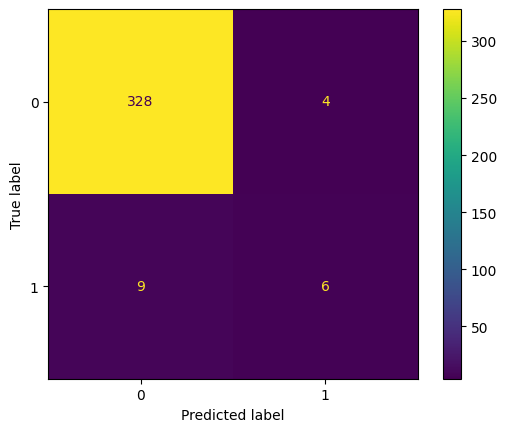

In [ ]:
#Confusion matrix for |SMOTE  Decision Tree year 1
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test1,y_predDTOver1, labels=classifierDTSmote1.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierDTSmote1.classes_)
disp.plot()
plt.show()


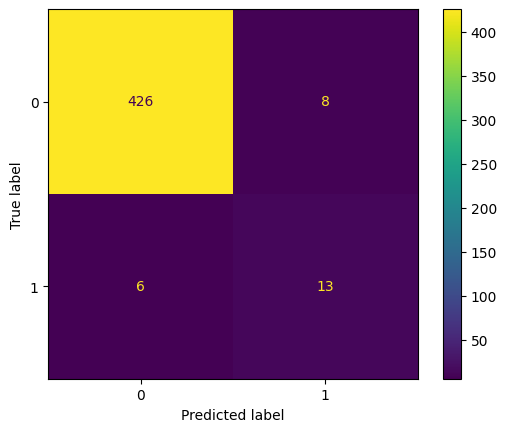

In [ ]:
#Confusion matrix for SMOTE Decision Tree year 2
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test2,y_predDTOver2, labels=classifierDTSmote2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierDTSmote2.classes_)
disp.plot()
plt.show()

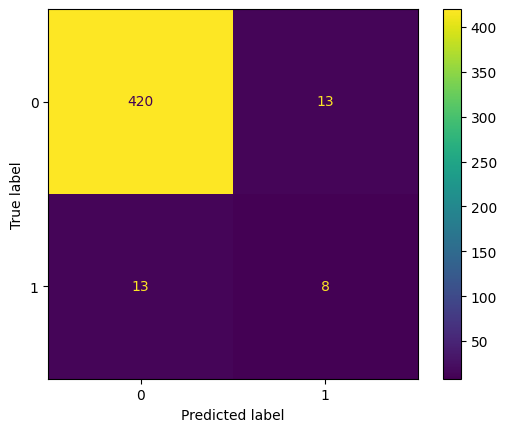

In [ ]:
#Confusion matrix for SMOTE Decision Tree year 3
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test3,y_predDTOver3, labels=classifierDTSmote3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierDTSmote3.classes_)
disp.plot()
plt.show()

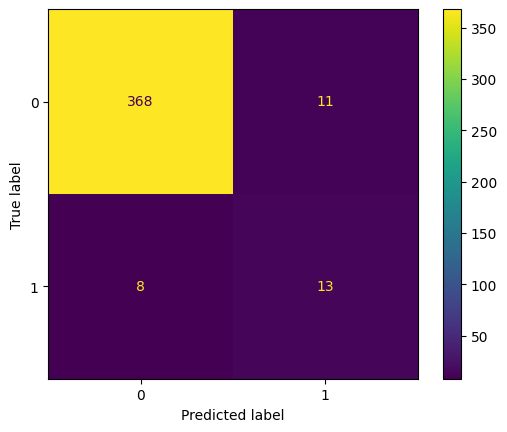

In [ ]:
#Confusion matrix for SMOTE Decision Tree year 4
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test4,y_predDTOver4, labels=classifierDTSmote4.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierDTSmote4.classes_)
disp.plot()
plt.show()

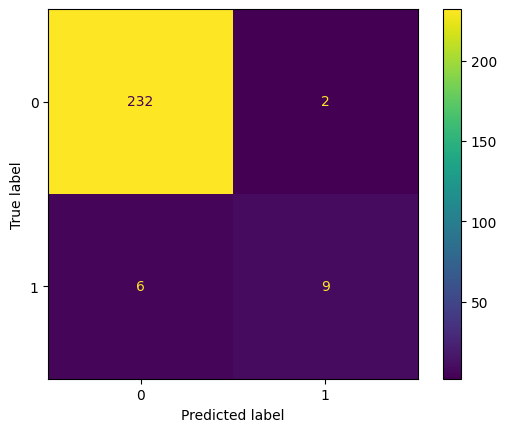

In [ ]:
#Confusion matrix for SMOTE Decision Tree year 5
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test5,y_predDTOver5, labels=classifierDTSmote5.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierDTSmote5.classes_)
disp.plot()
plt.show()

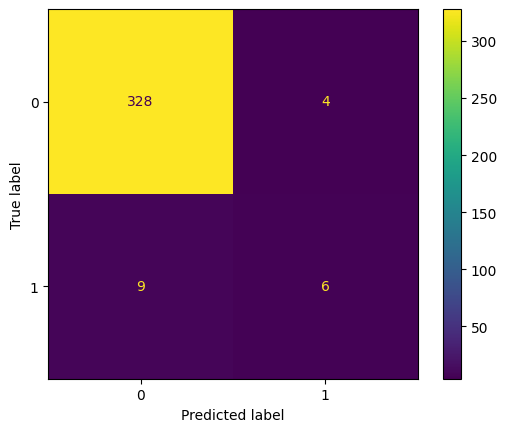

In [ ]:
#Confusion matrix for under Decision Tree year 1
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test1,y_predDTUnder1, labels=classifierDTUnder1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierDTUnder1.classes_)
disp.plot()
plt.show()

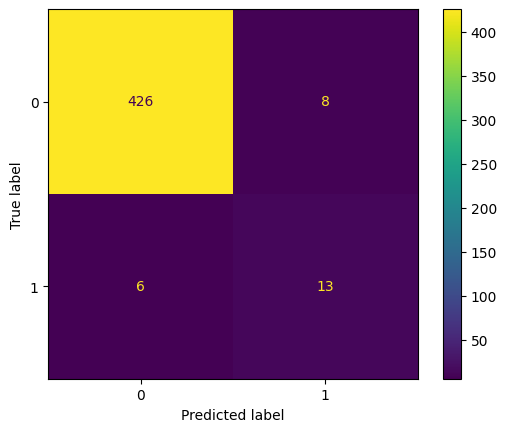

In [ ]:
#Confusion matrix for under Decision Tree year 2
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test2,y_predDTUnder2, labels=classifierDTUnder2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierDTUnder2.classes_)
disp.plot()
plt.show()

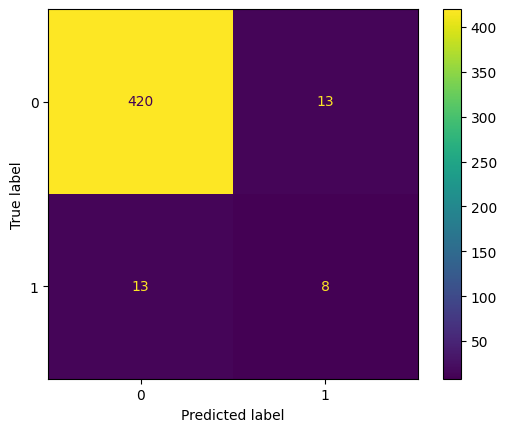

In [ ]:
#Confusion matrix for under Decision Tree year 3
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test3,y_predDTUnder3, labels=classifierDTUnder3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierDTUnder3.classes_)
disp.plot()
plt.show()

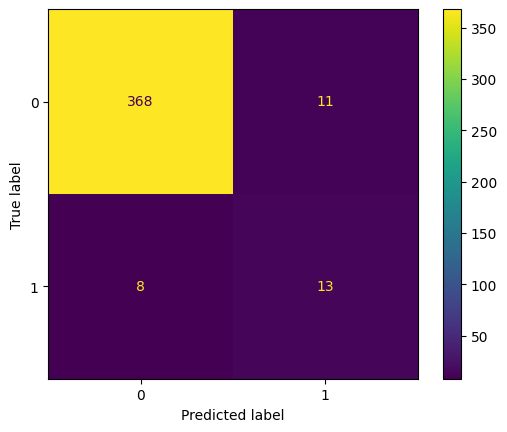

In [ ]:
#Confusion matrix for under Decision Tree year 4
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test4,y_predDTUnder4, labels=classifierDTUnder4.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierDTUnder4.classes_)
disp.plot()
plt.show()

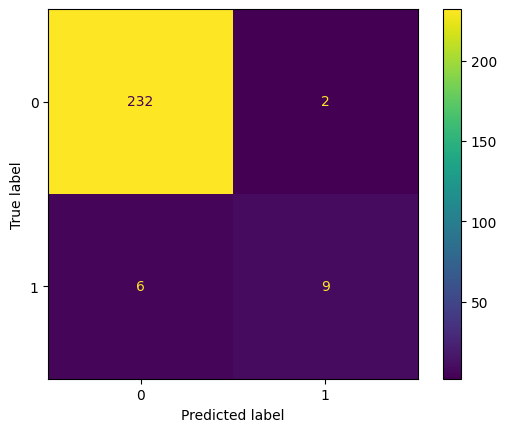

In [ ]:
#Confusion matrix for under Decision Tree year 5
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test5,y_predDTUnder5, labels=classifierDTUnder5.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierDTUnder5.classes_)
disp.plot()
plt.show()

###**Specificity**

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [ ]:
# Function to calculate specificity
def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn = cm[0, 0]
    fp = cm[0, 1]
    return tn / (tn + fp) if (tn + fp) > 0 else 0.0

In [ ]:
#year 1
#Over
specificity_DTOver = specificity_score(y_test1, y_predDTOver1)
print("Specificity Over:", specificity_DTOver)
#Under
specificity_DTUnder = specificity_score(y_test1, y_predDTUnder1)
print("Specificity Under:" ,specificity_DTUnder)

Specificity Over: 0.9879518072289156
Specificity Under: 0.9879518072289156


In [ ]:
#Year 2
#Over
specificity_DTOver = specificity_score(y_test2, y_predDTOver2)
print("Specificity Over:", specificity_DTOver)
#Under
specificity_DTUnder = specificity_score(y_test2, y_predDTUnder2)
print("Specificity Under:" ,specificity_DTUnder)

Specificity Over: 0.9815668202764977
Specificity Under: 0.9815668202764977


In [ ]:
#Year 3
#Over
specificity_DTOver = specificity_score(y_test3, y_predDTOver3)
print("Specificity Over :", specificity_DTOver)
#Under
specificity_DTUnder = specificity_score(y_test3, y_predDTUnder3)
print("Specificity Under:" ,specificity_DTUnder)

Specificity Over : 0.9699769053117783
Specificity Under: 0.9699769053117783


In [ ]:
#Year 4
#Over
specificity_DTOver = specificity_score(y_test4, y_predDTOver4)
print("Specificity Over :", specificity_DTOver)
#Under
specificity_DTUnder = specificity_score(y_test4, y_predDTUnder4)
print("Specificity Under:" ,specificity_DTUnder)

Specificity Over : 0.9709762532981531
Specificity Under: 0.9709762532981531


In [ ]:
#Year 5
#Over
specificity_DTOver = specificity_score(y_test5, y_predDTOver5)
print("Specificity Over :", specificity_DTOver)
#Under
specificity_DTUnder = specificity_score(y_test5, y_predDTUnder5)
print("Specificity Under :" ,specificity_DTUnder)

Specificity Over : 0.9914529914529915
Specificity Under : 0.9914529914529915


###**Precision**

In [ ]:
# Function to calculate Precision
def Precision_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tp = cm[1, 1]
    fp = cm[0, 1]
    return tp / (tp + fp) if (tp + fp) > 0 else 0.0

In [ ]:
#year 1
#over
precisionDTover = Precision_score(y_test1, y_predDTOver1)
print("Precision Over :", precisionDTover)
#under
precisionDTUnder = Precision_score(y_test1, y_predDTUnder1)
print("Precision Under :", precisionDTUnder)

Precision Over : 0.6
Precision Under : 0.6


In [ ]:
#year 2
#over
precisionDTover = Precision_score(y_test2, y_predDTOver2)
print("Precision Over :", precisionDTover)
#under
precisionDTUnder = Precision_score(y_test2, y_predDTUnder2)
print("Precision Under :", precisionDTUnder)

Precision Over : 0.6190476190476191
Precision Under : 0.6190476190476191


In [ ]:
#Year 3
#Over
precisionDTover = Precision_score(y_test3, y_predDTOver3)
print("Precision Over :", precisionDTover)
#Under
precisionDTUnder = Precision_score(y_test3, y_predDTUnder3)
print("Precision Under :", precisionDTUnder)

Precision Over : 0.38095238095238093
Precision Under : 0.38095238095238093


In [ ]:
#year 4
#Over
precisionDTover = Precision_score(y_test4, y_predDTOver4)
print("Precision Over :", precisionDTover)
#Under
precisionDTUnder = Precision_score(y_test4, y_predDTUnder4)
print("Precision Under :", precisionDTUnder)

Precision Over : 0.5416666666666666
Precision Under : 0.5416666666666666


In [ ]:
#Year 5
#Over
precisionDTover = Precision_score(y_test5, y_predDTOver5)
print("Precision Over :", precisionDTover)
#Under
precisionDTUnder = Precision_score(y_test5, y_predDTUnder5)
print("Precision Under :", precisionDTUnder)

Precision Over : 0.8181818181818182
Precision Under : 0.8181818181818182


###Recall

In [ ]:
#Function to calculate Recall
def Recall_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tp = cm[1, 1]
    fn = cm[1, 0]
    return tp / (tp + fn) if (tp + fn) > 0 else 0.0

In [ ]:
#Year 1
#Over
RecallDTover = Recall_score(y_test1, y_predDTOver1)
print("Recall Over :", RecallDTover)
#Under
RecallDTUnder = Recall_score(y_test1, y_predDTUnder1)
print("Recall Under :", RecallDTUnder)

Recall Over : 0.4
Recall Under : 0.4


In [ ]:
#year 2
#Over
RecallDTover = Recall_score(y_test2, y_predDTOver2)
print("Recall Over :", RecallDTover)
#Under
RecallDTUnder = Recall_score(y_test2, y_predDTUnder2)
print("Recall Under :", RecallDTUnder)

Recall Over : 0.6842105263157895
Recall Under : 0.6842105263157895


In [ ]:
#Year 3
#Over
RecallDTover = Recall_score(y_test3, y_predDTOver3)
print("Recall Over :", RecallDTover)
#Under
RecallDTUnder = Recall_score(y_test3, y_predDTUnder3)
print("Recall Under :", RecallDTUnder)

Recall Over : 0.38095238095238093
Recall Under : 0.38095238095238093


In [ ]:
#Year 4
#Over
RecallDTover = Recall_score(y_test4, y_predDTOver4)
print("Recall Over :", RecallDTover)
#Under
RecallDTUnder = Recall_score(y_test4, y_predDTUnder4)
print("Recall Under :", RecallDTUnder)

Recall Over : 0.6190476190476191
Recall Under : 0.6190476190476191


In [ ]:
#Year 5
#Over
RecallDTover = Recall_score(y_test5, y_predDTOver5)
print("Recall Over :", RecallDTover)
#Under
RecallDTUnder = Recall_score(y_test5, y_predDTUnder5)
print("Recall Under :", RecallDTUnder)

Recall Over : 0.6
Recall Under : 0.6


###Sensitivity

In [ ]:
def Sensitivity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tp = cm[1, 1]
    fn = cm[1, 0]
    return tp / (tp + fn) if (tp + fn) > 0 else 0.0

In [ ]:
#Year 1
#Over
SensitivityDTover = Sensitivity_score(y_test1, y_predDTOver1)
print("Sensitivity Over :", SensitivityDTover)
#Under
SensitivityDTUnder = Sensitivity_score(y_test1, y_predDTUnder1)
print("Sensitivity Under :", SensitivityDTUnder)

Sensitivity Over : 0.4
Sensitivity Under : 0.4


In [ ]:
#Year 2
#Over
SensitivityDTover = Sensitivity_score(y_test2, y_predDTOver2)
print("Sensitivity Over :", SensitivityDTover)
#Under
SensitivityDTUnder = Sensitivity_score(y_test2, y_predDTUnder2)
print("Sensitivity Under :", SensitivityDTUnder)

Sensitivity Over : 0.6842105263157895
Sensitivity Under : 0.6842105263157895


In [ ]:
#Year 3
#Over
SensitivityDTover = Sensitivity_score(y_test3, y_predDTOver3)
print("Sensitivity Over :", SensitivityDTover)
#Under
SensitivityDTUnder = Sensitivity_score(y_test3, y_predDTUnder3)
print("Sensitivity Under :", SensitivityDTUnder)

Sensitivity Over : 0.38095238095238093
Sensitivity Under : 0.38095238095238093


In [ ]:
#Year 4
#Over
SensitivityDTover = Sensitivity_score(y_test4, y_predDTOver4)
print("Sensitivity Over :", SensitivityDTover)
#Under
SensitivityDTUnder = Sensitivity_score(y_test4, y_predDTUnder4)
print("Sensitivity Under :", SensitivityDTUnder)

Sensitivity Over : 0.6190476190476191
Sensitivity Under : 0.6190476190476191


In [ ]:
#Year 5
#Over
SensitivityDTover = Sensitivity_score(y_test5, y_predDTOver5)
print("Sensitivity Over :", SensitivityDTover)
#Under
SensitivityDTUnder = Sensitivity_score(y_test5, y_predDTUnder5)
print("Sensitivity Under :", SensitivityDTUnder)

Sensitivity Over : 0.6
Sensitivity Under : 0.6


###F1 Score

In [ ]:
def F1_score(y_true, y_pred):
    precision = Precision_score(y_true, y_pred)
    recall = Recall_score(y_true, y_pred)
    return 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0


In [ ]:
#Year 1
#Over
F1DTover = F1_score(y_test1, y_predDTOver1)
print("F1 Score Over :", F1DTover)
#Under
F1DTUnder = F1_score(y_test1, y_predDTUnder1)
print("F1 Score Under :", F1DTUnder)

F1 Score Over : 0.48
F1 Score Under : 0.48


In [ ]:
#Year 2
#Over
F1DTover = F1_score(y_test2, y_predDTOver2)
print("F1 Score Over :", F1DTover)
#Under
F1DTUnder = F1_score(y_test2, y_predDTUnder2)
print("F1 Score Under :", F1DTUnder)

F1 Score Over : 0.6500000000000001
F1 Score Under : 0.6500000000000001


In [ ]:
#Year 3
#Over
F1DTover = F1_score(y_test3, y_predDTOver3)
print("F1 Score Over :", F1DTover)
#Under
F1DTUnder = F1_score(y_test3, y_predDTUnder3)
print("F1 Score Under :", F1DTUnder)

F1 Score Over : 0.38095238095238093
F1 Score Under : 0.38095238095238093


In [ ]:
#Year 4
#Over
F1DTover = F1_score(y_test4, y_predDTOver4)
print("F1 Score Over :", F1DTover)
#Under
F1DTUnder = F1_score(y_test4, y_predDTUnder4)
print("F1 Score Under :", F1DTUnder)

F1 Score Over : 0.5777777777777778
F1 Score Under : 0.5777777777777778


In [ ]:
#Year 5
#Over
F1DTover = F1_score(y_test5, y_predDTOver5)
print("F1 Score Over :", F1DTover)
#Under
F1DTUnder = F1_score(y_test5, y_predDTUnder5)
print("F1 Score Under :", F1DTUnder)

F1 Score Over : 0.6923076923076923
F1 Score Under : 0.6923076923076923


###False Postive Rate

In [ ]:
def False_Positive_Rate(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    fp = cm[0, 1]
    tn = cm[0, 0]
    return fp / (fp + tn)

In [ ]:
#year1
#over
False_Positive_RateDTover = False_Positive_Rate(y_test1, y_predDTOver1)
print("False Positive Rate Over :", False_Positive_RateDTover)
#under
False_Positive_RateDTUnder = False_Positive_Rate(y_test1, y_predDTUnder1)
print("False Positive Rate Under :", False_Positive_RateDTUnder)

False Positive Rate Over : 0.012048192771084338
False Positive Rate Under : 0.012048192771084338


In [ ]:
#Year 2
#Over
False_Positive_RateDTover = False_Positive_Rate(y_test2, y_predDTOver2)
print("False Positive Rate Over :", False_Positive_RateDTover)
#Under
False_Positive_RateDTUnder = False_Positive_Rate(y_test2, y_predDTUnder2)
print("False Positive Rate Under :", False_Positive_RateDTUnder)

False Positive Rate Over : 0.018433179723502304
False Positive Rate Under : 0.018433179723502304


In [ ]:
#Year 3
#over
False_Positive_RateDTover = False_Positive_Rate(y_test3, y_predDTOver3)
print("False Positive Rate Over :", False_Positive_RateDTover)
#Under
False_Positive_RateDTUnder = False_Positive_Rate(y_test3, y_predDTUnder3)
print("False Positive Rate Under :", False_Positive_RateDTUnder)

False Positive Rate Over : 0.03002309468822171
False Positive Rate Under : 0.03002309468822171


In [ ]:
#Year 4
#Over
False_Positive_RateDTover = False_Positive_Rate(y_test4, y_predDTOver4)
print("False Positive Rate Over :", False_Positive_RateDTover)
#Under
False_Positive_RateDTUnder = False_Positive_Rate(y_test4, y_predDTUnder4)
print("False Positive Rate Under :", False_Positive_RateDTUnder)

False Positive Rate Over : 0.029023746701846966
False Positive Rate Under : 0.029023746701846966


In [ ]:
#Year 5
#Over
False_Positive_RateDTover = False_Positive_Rate(y_test5, y_predDTOver5)
print("False Positive Rate Over :", False_Positive_RateDTover)
#Under
False_Positive_RateDTUnder = False_Positive_Rate(y_test5, y_predDTUnder5)
print("False Positive Rate Under :", False_Positive_RateDTUnder)

False Positive Rate Over : 0.008547008547008548
False Positive Rate Under : 0.008547008547008548


###False Negative Rate

In [ ]:
def False_Negative_Rate(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    fn = cm[1, 0]
    tp = cm[1, 1]
    return fn / (fn + tp) if (fn + tp) > 0 else 0.0

In [ ]:
#year 1
False_Negative_RateDTover = False_Negative_Rate(y_test1, y_predDTOver1)
print("False Negative Rate Over :", False_Negative_RateDTover)
False_Negative_RateDTUnder = False_Negative_Rate(y_test1, y_predDTUnder1)
print("False Negative Rate Under :", False_Negative_RateDTUnder)

False Negative Rate Over : 0.6
False Negative Rate Under : 0.6


In [ ]:
#Year 2
False_Negative_RateDTover = False_Negative_Rate(y_test2, y_predDTOver2)
print("False Negative Rate Over :", False_Negative_RateDTover)
False_Negative_RateDTUnder = False_Negative_Rate(y_test2, y_predDTUnder2)
print("False Negative Rate Under :", False_Negative_RateDTUnder)

False Negative Rate Over : 0.3157894736842105
False Negative Rate Under : 0.3157894736842105


In [ ]:
#Year 3
False_Negative_RateDTover = False_Negative_Rate(y_test3, y_predDTOver3)
print("False Negative Rate Over :", False_Negative_RateDTover)
False_Negative_RateDTUnder = False_Negative_Rate(y_test3, y_predDTUnder3)
print("False Negative Rate Under :", False_Negative_RateDTUnder)

False Negative Rate Over : 0.6190476190476191
False Negative Rate Under : 0.6190476190476191


In [ ]:
#Year 4
False_Negative_RateDTover = False_Negative_Rate(y_test4, y_predDTOver4)
print("False Negative Rate Over :", False_Negative_RateDTover)
False_Negative_RateDTUnder = False_Negative_Rate(y_test4, y_predDTUnder4)
print("False Negative Rate Under :", False_Negative_RateDTUnder)

False Negative Rate Over : 0.38095238095238093
False Negative Rate Under : 0.38095238095238093


In [ ]:
#Year 5
False_Negative_RateDTover = False_Negative_Rate(y_test5, y_predDTOver5)
print("False Negative Rate Over :", False_Negative_RateDTover)
False_Negative_RateDTUnder = False_Negative_Rate(y_test5, y_predDTUnder5)
print("False Negative Rate Under :", False_Negative_RateDTUnder)

False Negative Rate Over : 0.4
False Negative Rate Under : 0.4


###Precison-Recall AUC | Average precision

In [ ]:
from sklearn.metrics import average_precision_score

In [ ]:
#Year 1
#Over
Precison_Recall_AUC_DTover = average_precision_score(y_test1, y_predDTOver1)
print("Precison-Recall AUC Over :", Precison_Recall_AUC_DTover)
#under
Precison_Recall_AUC_DTUnder = average_precision_score(y_test1, y_predDTUnder1)
print("Precison-Recall AUC Under :", Precison_Recall_AUC_DTUnder)

Precison-Recall AUC Over : 0.2659365994236311
Precison-Recall AUC Under : 0.2659365994236311


In [ ]:
#year 2
#over
Precision_Recall_AUC_DTover = average_precision_score(y_test2, y_predDTOver2)
print("Precison-Recall AUC Over :", Precision_Recall_AUC_DTover)
#under
Precision_Recall_AUC_DTUnder = average_precision_score(y_test2, y_predDTUnder2)
print("Precison-Recall AUC Under :", Precision_Recall_AUC_DTUnder)

Precison-Recall AUC Over : 0.4368039303556906
Precison-Recall AUC Under : 0.4368039303556906


In [ ]:
#Year 3
#Over
Precision_Recall_AUC_DTover = average_precision_score(y_test3, y_predDTOver3)
print("Precison-Recall AUC Over :", Precision_Recall_AUC_DTover)
#Under
Precision_Recall_AUC_DTUnder = average_precision_score(y_test3, y_predDTUnder3)
print("Precison-Recall AUC Under :", Precision_Recall_AUC_DTUnder)

Precison-Recall AUC Over : 0.17375907778676813
Precison-Recall AUC Under : 0.17375907778676813


In [ ]:
#Year 4
#Over
Precision_Recall_AUC_DTover = average_precision_score(y_test4, y_predDTOver4)
print("Precison-Recall AUC Over :", Precision_Recall_AUC_DTover)
#Under
Precision_Recall_AUC_DTUnder = average_precision_score(y_test4, y_predDTUnder4)
print("Precison-Recall AUC Under :", Precision_Recall_AUC_DTUnder)

Precison-Recall AUC Over : 0.3553174603174603
Precison-Recall AUC Under : 0.3553174603174603


In [ ]:
#Year 5
#Over
Precision_Recall_AUC_DTover = average_precision_score(y_test5, y_predDTOver5)
print("Precison-Recall AUC Over :", Precision_Recall_AUC_DTover)
#Under
Precision_Recall_AUC_DTUnder = average_precision_score(y_test5, y_predDTUnder5)
print("Precison-Recall AUC Under :", Precision_Recall_AUC_DTUnder)

Precison-Recall AUC Over : 0.5150054764512596
Precison-Recall AUC Under : 0.5150054764512596


##Losistic Regression


###Confusion Matrix

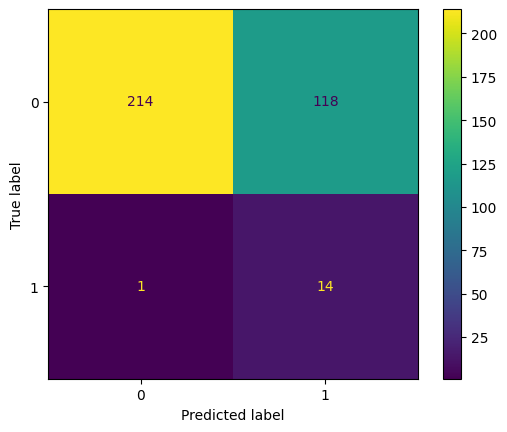

In [ ]:
#Confusion matrix for SMOTE 1 Logistic Regression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test1,y_predLROver1, labels=classifierLRSMOTE1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierLRSMOTE1.classes_)
disp.plot()
plt.show()

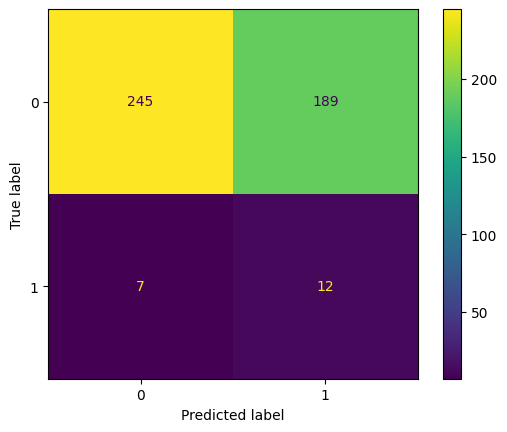

In [ ]:
#Confusion matrix for SMOTE Logistic Regression year 2
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test2,y_predLROver2, labels=classifierLRSMOTE2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierLRSMOTE2.classes_)
disp.plot()
plt.show()

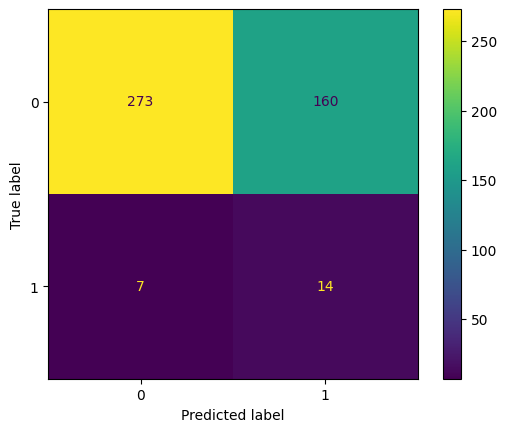

In [ ]:
#Confusion matrix for SMOTE  Logistic Regression  year 3
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test3,y_predLROver3, labels=classifierLRSMOTE3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierLRSMOTE3.classes_)
disp.plot()
plt.show()

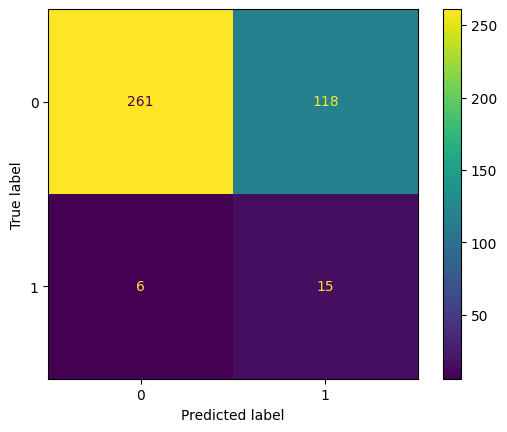

In [ ]:
#Confusion matrix for SMOTE  Logistic Regression  year 4
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test4,y_predLROver4, labels=classifierLRSMOTE4.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierLRSMOTE4.classes_)
disp.plot()
plt.show()

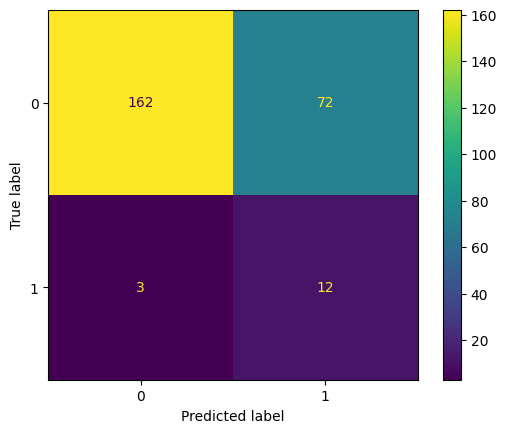

In [ ]:
#Confusion matrix for SMOTE  Logistic Regression  year 5
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test5,y_predLROver5, labels=classifierLRSMOTE5.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierLRSMOTE5.classes_)
disp.plot()
plt.show()

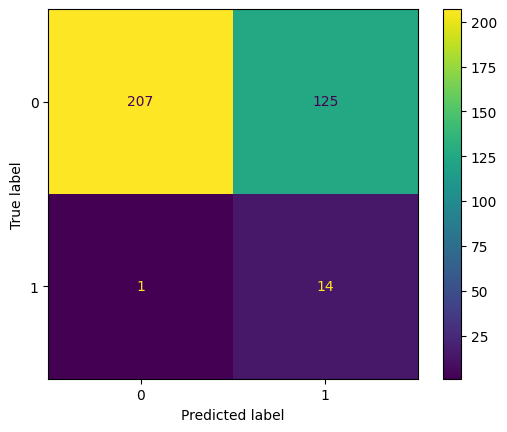

In [ ]:
#Confusion matrix for Under  Logistic Regression  year 1
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test1,y_predLRUnder1, labels=classifierLRUnder1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierLRUnder1.classes_)
disp.plot()
plt.show()

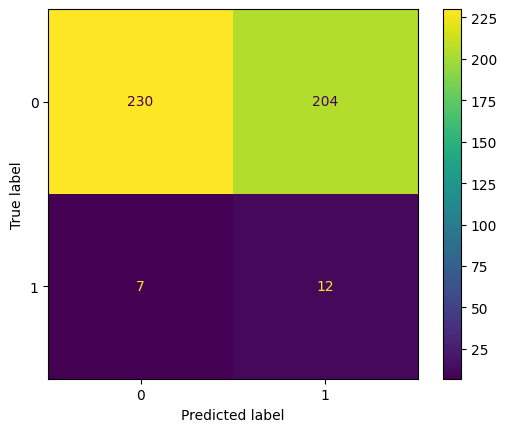

In [ ]:
#Confusion matrix for Under  Logistic Regression  year 2
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test2,y_predLRUnder2, labels=classifierLRUnder2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierLRUnder2.classes_)
disp.plot()
plt.show()

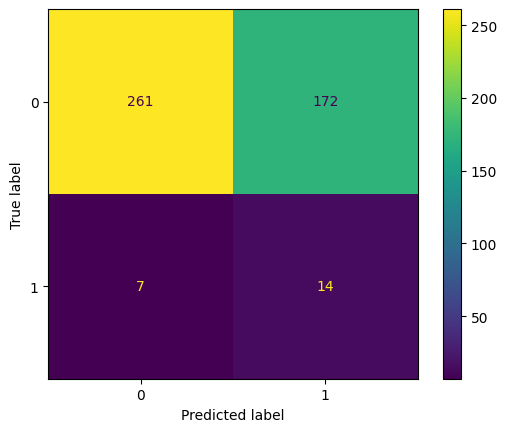

In [ ]:
#Confusion matrix for Under  Logistic Regression  year 3
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test3,y_predLRUnder3, labels=classifierLRUnder3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierLRUnder3.classes_)
disp.plot()
plt.show()

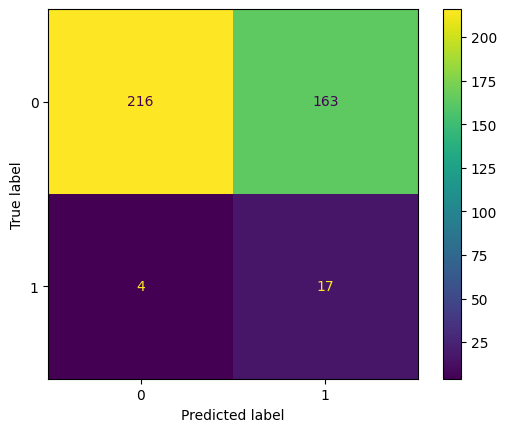

In [ ]:
#Confusion matrix for Under  Logistic Regression  year 4
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test4,y_predLRUnder4, labels=classifierLRUnder4.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierLRUnder4.classes_)
disp.plot()
plt.show()

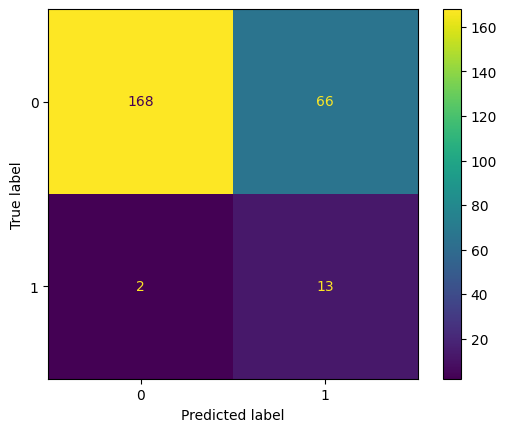

In [ ]:
#Confusion matrix for Under  Logistic Regression  year 5
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test5,y_predLRUnder5, labels=classifierLRUnder5.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierLRUnder5.classes_)
disp.plot()
plt.show()

###Specificity

In [ ]:
##Year 1
specificity_LROver = specificity_score(y_test1, y_predLROver1)
print("Specificity Over :", specificity_LROver)
specificity_LRUnder = specificity_score(y_test1, y_predLRUnder1)
print("Specificity Under:", specificity_LRUnder)

Specificity Over : 0.6445783132530121
Specificity Under: 0.6234939759036144


In [ ]:
#Year 2
specificity_LROver = specificity_score(y_test2, y_predLROver2)
print("Specificity Over :", specificity_LROver)
specificity_LRUnder = specificity_score(y_test2, y_predLRUnder2)
print("Specificity Under:", specificity_LRUnder)

Specificity Over : 0.5645161290322581
Specificity Under: 0.5299539170506913


In [ ]:
##Year 3
specificity_LROver = specificity_score(y_test3, y_predLROver3)
print("Specificity Over :", specificity_LROver)
specificity_LRUnder = specificity_score(y_test3, y_predLRUnder3)
print("Specificity Under:", specificity_LRUnder)

Specificity Over : 0.6304849884526559
Specificity Under: 0.6027713625866051


In [ ]:
#Year 4
specificity_LROver = specificity_score(y_test4, y_predLROver4)
print("Specificity Over :", specificity_LROver)
specificity_LRUnder = specificity_score(y_test4, y_predLRUnder4)
print("Specificity Under:", specificity_LRUnder)

Specificity Over : 0.6886543535620053
Specificity Under: 0.5699208443271768


In [ ]:
#Year 5
specificity_LROver = specificity_score(y_test5, y_predLROver5)
print("Specificity Over :", specificity_LROver)
specificity_LRUnder = specificity_score(y_test5, y_predLRUnder5)
print("Specificity Under:", specificity_LRUnder)

Specificity Over : 0.6923076923076923
Specificity Under: 0.717948717948718


###**Precision**


In [ ]:
#Year 1
precisionLROver = Precision_score(y_test1, y_predLROver1)
print("Precision Over :", precisionLROver)
precisionLRUnder = Precision_score(y_test1, y_predLRUnder1)
print("Precision Under :", precisionLRUnder)

Precision Over : 0.10606060606060606
Precision Under : 0.10071942446043165


In [ ]:
#Year 2
#over
precisionLROver = Precision_score(y_test2, y_predLROver2)
print("Precision Over :", precisionLROver)
#under
precisionLRUnder = Precision_score(y_test2, y_predLRUnder2)
print("Precision Under :", precisionLRUnder)

Precision Over : 0.05970149253731343
Precision Under : 0.05555555555555555


In [ ]:
#Year 3
#Over
precisionLROver = Precision_score(y_test3, y_predLROver3)
print("Precision Over :", precisionLROver)
#Under
precisionLRUnder = Precision_score(y_test3, y_predLRUnder3)
print("Precision Under :", precisionLRUnder)

Precision Over : 0.08045977011494253
Precision Under : 0.07526881720430108


In [ ]:
#Year 4
#over
precisionLROver = Precision_score(y_test4, y_predLROver4)
print("Precision Over :", precisionLROver)
#under
precisionLRUnder = Precision_score(y_test4, y_predLRUnder4)
print("Precision Under :", precisionLRUnder)

Precision Over : 0.11278195488721804
Precision Under : 0.09444444444444444


In [ ]:
#Year 5
#Over
precisionLROver = Precision_score(y_test5, y_predLROver5)
print("Precision Over :", precisionLROver)
#Under
precisionLRUnder = Precision_score(y_test5, y_predLRUnder5)
print("Precision Under :", precisionLRUnder)

Precision Over : 0.14285714285714285
Precision Under : 0.16455696202531644


###Recall

In [ ]:
#Year 1
#Over
RecallLROver = Recall_score(y_test1, y_predLROver1)
print("Recall Over :", RecallLROver)
#Under
RecallLRUnder = Recall_score(y_test1, y_predLRUnder1)
print("Recall Under :", RecallLRUnder)

Recall Over : 0.9333333333333333
Recall Under : 0.9333333333333333


In [ ]:
#Year 2
#Over
RecallLROver = Recall_score(y_test2, y_predLROver2)
print("Recall Over :", RecallLROver)
#Under
RecallLRUnder = Recall_score(y_test2, y_predLRUnder2)
print("Recall Under :", RecallLRUnder)

Recall Over : 0.631578947368421
Recall Under : 0.631578947368421


In [ ]:
#year 3
#Over
RecallLROver = Recall_score(y_test3, y_predLROver3)
print("Recall Over :", RecallLROver)
#Under
RecallLRUnder = Recall_score(y_test3, y_predLRUnder3)
print("Recall Under :", RecallLRUnder)

Recall Over : 0.6666666666666666
Recall Under : 0.6666666666666666


In [ ]:
#Year 4
#Over
RecallLROver = Recall_score(y_test4, y_predLROver4)
print("Recall Over :", RecallLROver)
#Under
RecallLRUnder = Recall_score(y_test4, y_predLRUnder4)
print("Recall Under :", RecallLRUnder)

Recall Over : 0.7142857142857143
Recall Under : 0.8095238095238095


In [ ]:
#Year 5
#Over
RecallLROver = Recall_score(y_test5, y_predLROver5)
print("Recall Over :", RecallLROver)
#Under
RecallLRUnder = Recall_score(y_test5, y_predLRUnder5)
print("Recall Under :", RecallLRUnder)

Recall Over : 0.8
Recall Under : 0.8666666666666667


###Sensitivity

In [ ]:
#Year 1
SensitivityLROver = Sensitivity_score(y_test1, y_predLROver1)
print("Sensitivity Over :", SensitivityLROver)
SensitivityLRUnder = Sensitivity_score(y_test1, y_predLRUnder1)
print("Sensitivity Under :", SensitivityLRUnder)

Sensitivity Over : 0.9333333333333333
Sensitivity Under : 0.9333333333333333


In [ ]:
#Year 2
SensitivityLROver = Sensitivity_score(y_test2, y_predLROver2)
print("Sensitivity Over :", SensitivityLROver)
SensitivityLRUnder = Sensitivity_score(y_test2, y_predLRUnder2)
print("Sensitivity Under :", SensitivityLRUnder)

Sensitivity Over : 0.631578947368421
Sensitivity Under : 0.631578947368421


In [ ]:
#Year 3
SensitivityLROver = Sensitivity_score(y_test3, y_predLROver3)
print("Sensitivity Over :", SensitivityLROver)
SensitivityLRUnder = Sensitivity_score(y_test3, y_predLRUnder3)
print("Sensitivity Under :", SensitivityLRUnder)

Sensitivity Over : 0.6666666666666666
Sensitivity Under : 0.6666666666666666


In [ ]:
#Year 4
SensitivityLROver = Sensitivity_score(y_test4, y_predLROver4)
print("Sensitivity Over :", SensitivityLROver)
SensitivityLRUnder = Sensitivity_score(y_test4, y_predLRUnder4)
print("Sensitivity Under :", SensitivityLRUnder)

Sensitivity Over : 0.7142857142857143
Sensitivity Under : 0.8095238095238095


In [ ]:
#Year 5
SensitivityLROver = Sensitivity_score(y_test5, y_predLROver5)
print("Sensitivity Over :", SensitivityLROver)
SensitivityLRUnder = Sensitivity_score(y_test5, y_predLRUnder5)
print("Sensitivity Under :", SensitivityLRUnder)

Sensitivity Over : 0.8
Sensitivity Under : 0.8666666666666667


###F1 Score

In [ ]:
#Year 1
F1LROver = F1_score(y_test1, y_predLROver1)
print("F1 Score Over :", F1LROver)
F1LRUnder = F1_score(y_test1, y_predLRUnder1)
print("F1 Score Under :", F1LRUnder)

F1 Score Over : 0.1904761904761905
F1 Score Under : 0.18181818181818182


In [ ]:
#Year 2
F1LROver = F1_score(y_test2, y_predLROver2)
print("F1 Score Over :", F1LROver)
F1LRUnder = F1_score(y_test2, y_predLRUnder2)
print("F1 Score Under :", F1LRUnder)

F1 Score Over : 0.10909090909090909
F1 Score Under : 0.10212765957446808


In [ ]:
#Year 3
F1LROver = F1_score(y_test3, y_predLROver3)
print("F1 Score Over :", F1LROver)
F1LRUnder = F1_score(y_test3, y_predLRUnder3)
print("F1 Score Under :", F1LRUnder)

F1 Score Over : 0.14358974358974358
F1 Score Under : 0.13526570048309178


In [ ]:
#Year 4
F1LROver = F1_score(y_test4, y_predLROver4)
print("F1 Score Over :", F1LROver)
F1LRUnder = F1_score(y_test4, y_predLRUnder4)
print("F1 Score Under :", F1LRUnder)

F1 Score Over : 0.19480519480519476
F1 Score Under : 0.1691542288557214


In [ ]:
#Year 5
F1LROver = F1_score(y_test5, y_predLROver5)
print("F1 Score Over :", F1LROver)
F1LRUnder = F1_score(y_test5, y_predLRUnder5)
print("F1 Score Under :", F1LRUnder)

F1 Score Over : 0.24242424242424243
F1 Score Under : 0.2765957446808511


###False Postive Rate

In [ ]:
#Year 1
False_Positive_RateLROver = False_Positive_Rate(y_test1, y_predLROver1)
print("False Positive Rate Over :", False_Positive_RateLROver)
False_Positive_RateLRUnder = False_Positive_Rate(y_test1, y_predLRUnder1)
print("False Positive Rate Under :", False_Positive_RateLRUnder)

False Positive Rate Over : 0.35542168674698793
False Positive Rate Under : 0.37650602409638556


In [ ]:
#Year 2
False_Positive_RateLROver = False_Positive_Rate(y_test2, y_predLROver2)
print("False Positive Rate Over :", False_Positive_RateLROver)
False_Positive_RateLRUnder = False_Positive_Rate(y_test2, y_predLRUnder2)
print("False Positive Rate Under :", False_Positive_RateLRUnder)

False Positive Rate Over : 0.43548387096774194
False Positive Rate Under : 0.4700460829493088


In [ ]:
#Year 3
False_Positive_RateLROver = False_Positive_Rate(y_test3, y_predLROver3)
print("False Positive Rate Over :", False_Positive_RateLROver)
False_Positive_RateLRUnder = False_Positive_Rate(y_test3, y_predLRUnder3)
print("False Positive Rate Under :", False_Positive_RateLRUnder)

False Positive Rate Over : 0.3695150115473441
False Positive Rate Under : 0.3972286374133949


In [ ]:
#Year 4
False_Positive_RateLROver = False_Positive_Rate(y_test4, y_predLROver4)
print("False Positive Rate Over :", False_Positive_RateLROver)
False_Positive_RateLRUnder = False_Positive_Rate(y_test4, y_predLRUnder4)
print("False Positive Rate Under :", False_Positive_RateLRUnder)

False Positive Rate Over : 0.3113456464379947
False Positive Rate Under : 0.43007915567282323


In [ ]:
#Year 5
False_Positive_RateLROver = False_Positive_Rate(y_test5, y_predLROver5)
print("False Positive Rate Over :", False_Positive_RateLROver)
False_Positive_RateLRUnder = False_Positive_Rate(y_test5, y_predLRUnder5)
print("False Positive Rate Under :", False_Positive_RateLRUnder)

False Positive Rate Over : 0.3076923076923077
False Positive Rate Under : 0.28205128205128205


###False Negative Rate

In [ ]:
#Year 1
False_Negative_RateLROver = False_Negative_Rate(y_test1, y_predLROver1)
print("False Negative Rate Over :", False_Negative_RateLROver)
False_Negative_RateLRUnder = False_Negative_Rate(y_test1, y_predLRUnder1)
print("False Negative Rate Under :", False_Negative_RateLRUnder)


False Negative Rate Over : 0.06666666666666667
False Negative Rate Under : 0.06666666666666667


In [ ]:
#Year 2
False_Negative_RateLROver = False_Negative_Rate(y_test2, y_predLROver2)
print("False Negative Rate Over :", False_Negative_RateLROver)
False_Negative_RateLRUnder = False_Negative_Rate(y_test2, y_predLRUnder2)
print("False Negative Rate Under :", False_Negative_RateLRUnder)

False Negative Rate Over : 0.3684210526315789
False Negative Rate Under : 0.3684210526315789


In [ ]:
#Year 3
False_Negative_RateLROver = False_Negative_Rate(y_test3, y_predLROver3)
print("False Negative Rate Over :", False_Negative_RateLROver)
False_Negative_RateLRUnder = False_Negative_Rate(y_test3, y_predLRUnder3)
print("False Negative Rate Under :", False_Negative_RateLRUnder)

False Negative Rate Over : 0.3333333333333333
False Negative Rate Under : 0.3333333333333333


In [ ]:
#Year 4
False_Negative_RateLROver = False_Negative_Rate(y_test4, y_predLROver4)
print("False Negative Rate Over :", False_Negative_RateLROver)
False_Negative_RateLRUnder = False_Negative_Rate(y_test4, y_predLRUnder4)
print("False Negative Rate Under :", False_Negative_RateLRUnder)

False Negative Rate Over : 0.2857142857142857
False Negative Rate Under : 0.19047619047619047


In [ ]:
#Year 5
False_Negative_RateLROver = False_Negative_Rate(y_test5, y_predLROver5)
print("False Negative Rate Over :", False_Negative_RateLROver)
False_Negative_RateLRUnder = False_Negative_Rate(y_test5, y_predLRUnder5)
print("False Negative Rate Under :", False_Negative_RateLRUnder)

False Negative Rate Over : 0.2
False Negative Rate Under : 0.13333333333333333


###Precison- Recall AUC | Average precision

In [ ]:
#Year 1
Precision_Recall_AUC_LROver = average_precision_score(y_test1, y_predLROver1)
print("Precison-Recall AUC Over :", Precision_Recall_AUC_LROver)
Precision_Recall_AUC_LRUnder = average_precision_score(y_test1, y_predLRUnder1)
print("Precison-Recall AUC Under :", Precision_Recall_AUC_LRUnder)

Precison-Recall AUC Over : 0.10187174337030244
Precison-Recall AUC Under : 0.096886640543473


In [ ]:
#Year 2
Precision_Recall_AUC_LROver = average_precision_score(y_test2, y_predLROver2)
print("Precison-Recall AUC Over :", Precision_Recall_AUC_LROver)
Precision_Recall_AUC_LRUnder = average_precision_score(y_test2, y_predLRUnder2)
print("Precison-Recall AUC Under :", Precision_Recall_AUC_LRUnder)

Precison-Recall AUC Over : 0.05315874444438664
Precison-Recall AUC Under : 0.05054025792959219


In [ ]:
#Year 3
Precision_Recall_AUC_LROver = average_precision_score(y_test3, y_predLROver3)
print("Precison-Recall AUC Over :", Precision_Recall_AUC_LROver)
Precision_Recall_AUC_LRUnder = average_precision_score(y_test3, y_predLRUnder3)
print("Precison-Recall AUC Under :", Precision_Recall_AUC_LRUnder)


Precison-Recall AUC Over : 0.06905834894593818
Precison-Recall AUC Under : 0.06559771367217723


In [ ]:
#Year 4
Precision_Recall_AUC_LROver = average_precision_score(y_test4, y_predLROver4)
print("Precison-Recall AUC Over :", Precision_Recall_AUC_LROver)
Precision_Recall_AUC_LRUnder = average_precision_score(y_test4, y_predLRUnder4)
print("Precison-Recall AUC Under :", Precision_Recall_AUC_LRUnder)

Precison-Recall AUC Over : 0.09555853920515574
Precison-Recall AUC Under : 0.08645502645502645


In [ ]:
#Year 5
Precision_Recall_AUC_LROver = average_precision_score(y_test5, y_predLROver5)
print("Precison-Recall AUC Over :", Precision_Recall_AUC_LROver)
Precision_Recall_AUC_LRUnder = average_precision_score(y_test5, y_predLRUnder5)
print("Precison-Recall AUC Under :", Precision_Recall_AUC_LRUnder)

Precison-Recall AUC Over : 0.12633390705679862
Precison-Recall AUC Under : 0.15064816226933048


##Random Forest

###Confusion Matrix

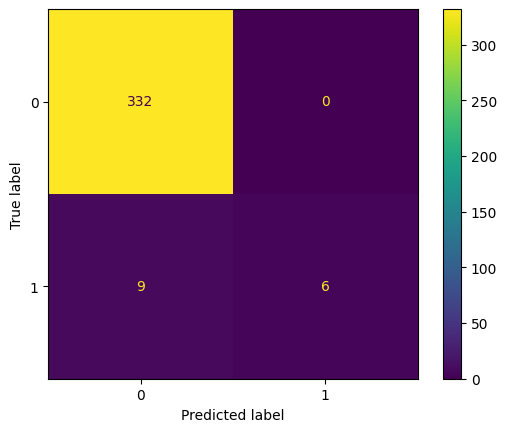

In [ ]:
#Confusion matrix for Random Forest SMOTE Year 1
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test1,y_predRFOver1, labels=classifierRFOver1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierRFOver1.classes_)
disp.plot()
plt.show()

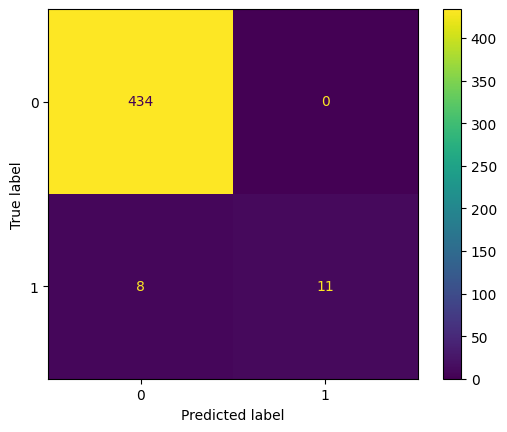

In [ ]:
#Confusion matrix for Random Forest SMOTE Year 2
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test2,y_predRFOver2, labels=classifierRFOver2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierRFOver2.classes_)
disp.plot()
plt.show()

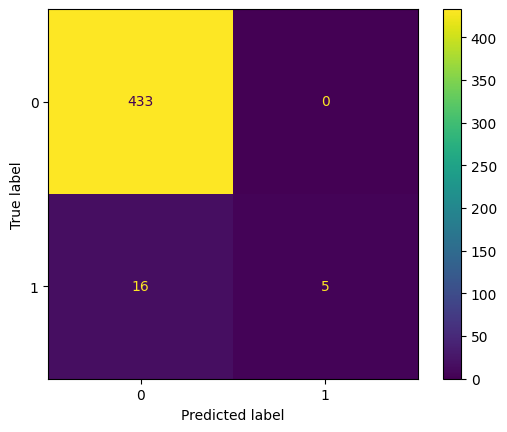

In [ ]:
#Confusion matrix for Random Forest SMOTE Year 3
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test3,y_predRFOver3, labels=classifierRFOver3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierRFOver3.classes_)
disp.plot()
plt.show()

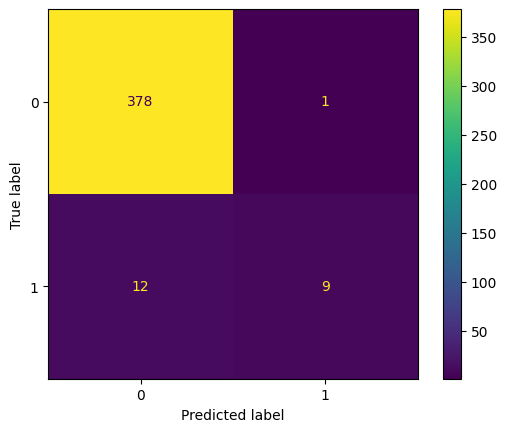

In [ ]:
#Confusion matrix for Random Forest SMOTE Year 4
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test4,y_predRFOver4, labels=classifierRFOver4.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierRFOver4.classes_)
disp.plot()
plt.show()

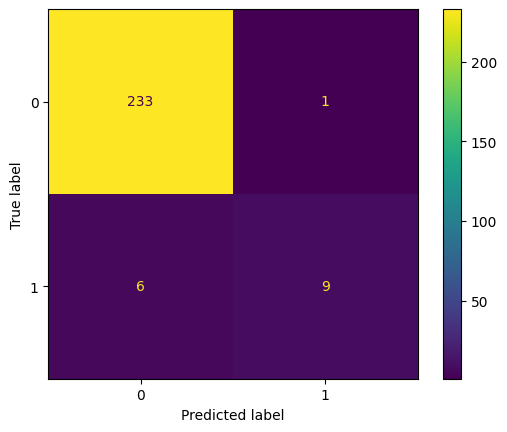

In [ ]:
#Confusion matrix for Random Forest SMOTE Year 5
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test5,y_predRFOver5, labels=classifierRFOver5.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierRFOver5.classes_)
disp.plot()
plt.show()

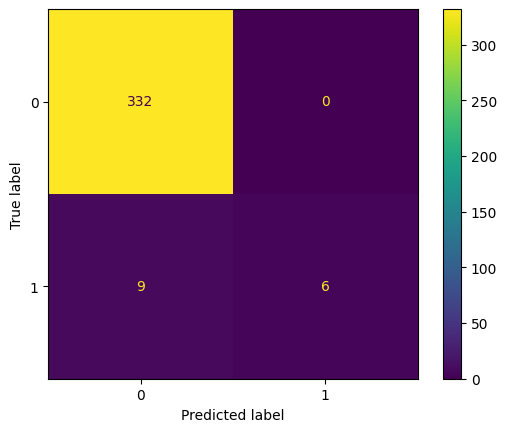

In [ ]:
#Confusion matrix for Random Forest Under Year 1
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test1,y_predRFUnder1, labels=classifierRFUnder1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierRFUnder1.classes_)
disp.plot()
plt.show()

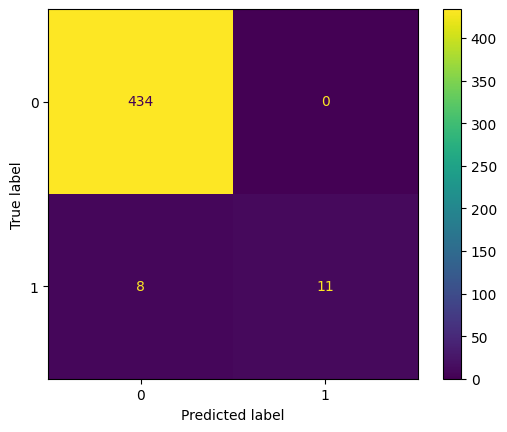

In [ ]:
#Confusion matrix for Random Forest Under Year 2
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test2,y_predRFUnder2, labels=classifierRFUnder2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierRFUnder2.classes_)
disp.plot()
plt.show()

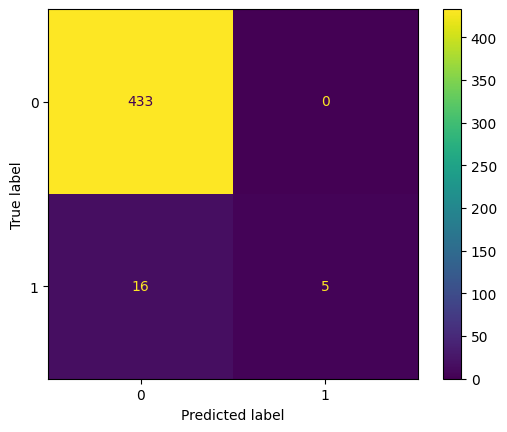

In [ ]:
#Confusion matrix for Random Forest Under Year 3
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test3,y_predRFUnder3, labels=classifierRFUnder3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierRFUnder3.classes_)
disp.plot()
plt.show()

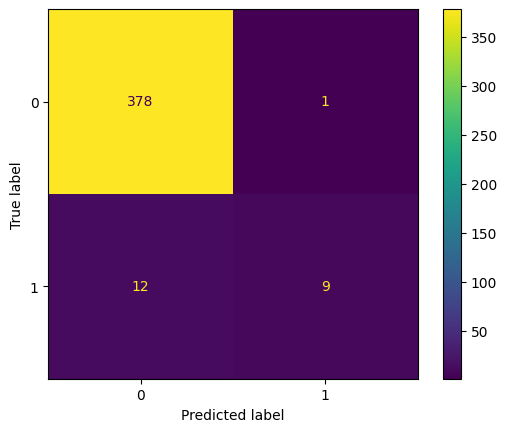

In [ ]:
#Confusion matrix for Random Forest Under Year 4
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test4,y_predRFUnder4, labels=classifierRFUnder4.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierRFUnder4.classes_)
disp.plot()
plt.show()

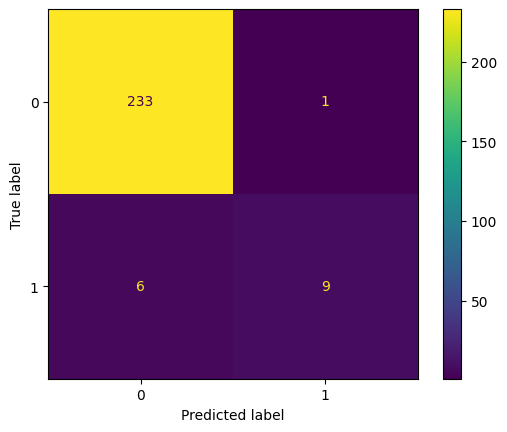

In [ ]:
#Confusion matrix for Random Forest Under Year 5
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test5,y_predRFUnder5, labels=classifierRFUnder5.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierRFUnder5.classes_)
disp.plot()
plt.show()

###Specificity

In [ ]:
#Year 1
specificity_RFOver = specificity_score(y_test1, y_predRFOver1)
print("Specificity Over :", specificity_RFOver)
specificity_RFUnder = specificity_score(y_test1, y_predRFUnder1)
print("Specificity Under:", specificity_RFUnder)

Specificity Over : 1.0
Specificity Under: 1.0


In [ ]:
#Year 2
specificity_RFOver = specificity_score(y_test2, y_predRFOver2)
print("Specificity Over :", specificity_RFOver)
specificity_RFUnder = specificity_score(y_test2, y_predRFUnder2)
print("Specificity Under:", specificity_RFUnder)

Specificity Over : 1.0
Specificity Under: 1.0


In [ ]:
#Year 3
specificity_RFOver = specificity_score(y_test3, y_predRFOver3)
print("Specificity Over :", specificity_RFOver)
specificity_RFUnder = specificity_score(y_test3, y_predRFUnder3)
print("Specificity Under:", specificity_RFUnder)

Specificity Over : 1.0
Specificity Under: 1.0


In [ ]:
#Year 4
specificity_RFOver = specificity_score(y_test4, y_predRFOver4)
print("Specificity Over :", specificity_RFOver)
specificity_RFUnder = specificity_score(y_test4, y_predRFUnder4)
print("Specificity Under:", specificity_RFUnder)

Specificity Over : 0.9973614775725593
Specificity Under: 0.9973614775725593


In [ ]:
#Year 5
specificity_RFOver = specificity_score(y_test5, y_predRFOver5)
print("Specificity Over :", specificity_RFOver)
specificity_RFUnder = specificity_score(y_test5, y_predRFUnder5)
print("Specificity Under:", specificity_RFUnder)

Specificity Over : 0.9957264957264957
Specificity Under: 0.9957264957264957


###Precision

In [ ]:
#year 1
PrecisionRFOver = Precision_score(y_test1, y_predRFOver1)
print("Precision Over :", PrecisionRFOver)
PrecisionRFUnder = Precision_score(y_test1, y_predRFUnder1)
print("Precision Under :", PrecisionRFUnder)

Precision Over : 1.0
Precision Under : 1.0


In [ ]:
#Year 2
PrecisionRFOver = Precision_score(y_test2, y_predRFOver2)
print("Precision Over :", PrecisionRFOver)
PrecisionRFUnder = Precision_score(y_test2, y_predRFUnder2)
print("Precision Under :", PrecisionRFUnder)

Precision Over : 1.0
Precision Under : 1.0


In [ ]:
#Year 3
PrecisionRFOver = Precision_score(y_test3, y_predRFOver3)
print("Precision Over :", PrecisionRFOver)
PrecisionRFUnder = Precision_score(y_test3, y_predRFUnder3)
print("Precision Under :", PrecisionRFUnder)

Precision Over : 1.0
Precision Under : 1.0


In [ ]:
#Year 4
PrecisionRFOver = Precision_score(y_test4, y_predRFOver4)
print("Precision Over :", PrecisionRFOver)
PrecisionRFUnder = Precision_score(y_test4, y_predRFUnder4)
print("Precision Under :", PrecisionRFUnder)

Precision Over : 0.9
Precision Under : 0.9


In [ ]:
#Year 5
PrecisionRFOver = Precision_score(y_test5, y_predRFOver5)
print("Precision Over :", PrecisionRFOver)
PrecisionRFUnder = Precision_score(y_test5, y_predRFUnder5)
print("Precision Under :", PrecisionRFUnder)

Precision Over : 0.9
Precision Under : 0.9


###Recall

In [ ]:
#Year 1
RecallRFOver = Recall_score(y_test1, y_predRFOver1)
print("Recall Over :", RecallRFOver)
RecallRFUnder = Recall_score(y_test1, y_predRFUnder1)
print("Recall Under :", RecallRFUnder)

Recall Over : 0.4
Recall Under : 0.4


In [ ]:
#Year 2
RecallRFOver = Recall_score(y_test2, y_predRFOver2)
print("Recall Over :", RecallRFOver)
RecallRFUnder = Recall_score(y_test2, y_predRFUnder2)
print("Recall Under :", RecallRFUnder)

Recall Over : 0.5789473684210527
Recall Under : 0.5789473684210527


In [ ]:
#Year 3
RecallRFOver = Recall_score(y_test3, y_predRFOver3)
print("Recall Over :", RecallRFOver)
RecallRFUnder = Recall_score(y_test3, y_predRFUnder3)
print("Recall Under :", RecallRFUnder)

Recall Over : 0.23809523809523808
Recall Under : 0.23809523809523808


In [ ]:
#Year 4
RecallRFOver = Recall_score(y_test4, y_predRFOver4)
print("Recall Over :", RecallRFOver)
RecallRFUnder = Recall_score(y_test4, y_predRFUnder4)
print("Recall Under :", RecallRFUnder)

Recall Over : 0.42857142857142855
Recall Under : 0.42857142857142855


In [ ]:
#Year 5
RecallRFOver = Recall_score(y_test5, y_predRFOver5)
print("Recall Over :", RecallRFOver)
RecallRFUnder = Recall_score(y_test5, y_predRFUnder5)
print("Recall Under :", RecallRFUnder)

Recall Over : 0.6
Recall Under : 0.6


###Sensitivity

In [ ]:
#Year 1
SensitivityRFOver = Sensitivity_score(y_test1, y_predRFOver1)
print("Sensitivity Over :", SensitivityRFOver)
SensitivityRFUnder = Sensitivity_score(y_test1, y_predRFUnder1)
print("Sensitivity Under :", SensitivityRFUnder)

Sensitivity Over : 0.4
Sensitivity Under : 0.4


In [ ]:
#Year 2
SensitivityRFOver = Sensitivity_score(y_test2, y_predRFOver2)
print("Sensitivity Over :", SensitivityRFOver)
SensitivityRFUnder = Sensitivity_score(y_test2, y_predRFUnder2)
print("Sensitivity Under :", SensitivityRFUnder)

Sensitivity Over : 0.5789473684210527
Sensitivity Under : 0.5789473684210527


In [ ]:
#Year 3
SensitivityRFOver = Sensitivity_score(y_test3, y_predRFOver3)
print("Sensitivity Over :", SensitivityRFOver)
SensitivityRFUnder = Sensitivity_score(y_test3, y_predRFUnder3)
print("Sensitivity Under :", SensitivityRFUnder)

Sensitivity Over : 0.23809523809523808
Sensitivity Under : 0.23809523809523808


In [ ]:
#Year 4
SensitivityRFOver = Sensitivity_score(y_test4, y_predRFOver4)
print("Sensitivity Over :", SensitivityRFOver)
SensitivityRFUnder = Sensitivity_score(y_test4, y_predRFUnder4)
print("Sensitivity Under :", SensitivityRFUnder)

Sensitivity Over : 0.42857142857142855
Sensitivity Under : 0.42857142857142855


In [ ]:
#Year 5
SensitivityRFOver = Sensitivity_score(y_test5, y_predRFOver5)
print("Sensitivity Over :", SensitivityRFOver)
SensitivityRFUnder = Sensitivity_score(y_test5, y_predRFUnder5)
print("Sensitivity Under :", SensitivityRFUnder)

Sensitivity Over : 0.6
Sensitivity Under : 0.6


###F1 Score

In [ ]:
#Year 1
F1RFOver = F1_score(y_test1, y_predRFOver1)
print("F1 Score Over :", F1RFOver)
F1RFUnder = F1_score(y_test1, y_predRFUnder1)
print("F1 Score Under :", F1RFUnder)

F1 Score Over : 0.5714285714285715
F1 Score Under : 0.5714285714285715


In [ ]:
#Year 2
F1RFOver = F1_score(y_test2, y_predRFOver2)
print("F1 Score Over :", F1RFOver)
F1RFUnder = F1_score(y_test2, y_predRFUnder2)
print("F1 Score Under :", F1RFUnder)


F1 Score Over : 0.7333333333333334
F1 Score Under : 0.7333333333333334


In [ ]:
#Year 3
F1RFOver = F1_score(y_test3, y_predRFOver3)
print("F1 Score Over :", F1RFOver)
F1RFUnder = F1_score(y_test3, y_predRFUnder3)
print("F1 Score Under :", F1RFUnder)

F1 Score Over : 0.3846153846153846
F1 Score Under : 0.3846153846153846


In [ ]:
#Year 4
F1RFOver = F1_score(y_test4, y_predRFOver4)
print("F1 Score Over :", F1RFOver)
F1RFUnder = F1_score(y_test4, y_predRFUnder4)
print("F1 Score Under :", F1RFUnder)

F1 Score Over : 0.5806451612903225
F1 Score Under : 0.5806451612903225


In [ ]:
#Year 5
F1RFOver = F1_score(y_test5, y_predRFOver5)
print("F1 Score Over :", F1RFOver)
F1RFUnder = F1_score(y_test5, y_predRFUnder5)
print("F1 Score Under :", F1RFUnder)

F1 Score Over : 0.7200000000000001
F1 Score Under : 0.7200000000000001


###False Postive Rate

In [ ]:
#Year 1
False_Positive_RateRFOver = False_Positive_Rate(y_test1, y_predRFOver1)
print("False Positive Rate Over :", False_Positive_RateRFOver)
False_Positive_RateRFUnder = False_Positive_Rate(y_test1, y_predRFUnder1)
print("False Positive Rate Under :", False_Positive_RateRFUnder)

False Positive Rate Over : 0.0
False Positive Rate Under : 0.0


In [ ]:
#Year 2
False_Positive_RateRFOver = False_Positive_Rate(y_test2, y_predRFOver2)
print("False Positive Rate Over :", False_Positive_RateRFOver)
False_Positive_RateRFUnder = False_Positive_Rate(y_test2, y_predRFUnder2)
print("False Positive Rate Under :", False_Positive_RateRFUnder)

False Positive Rate Over : 0.0
False Positive Rate Under : 0.0


In [ ]:
#Year 3
False_Positive_RateRFOver = False_Positive_Rate(y_test3, y_predRFOver3)
print("False Positive Rate Over :", False_Positive_RateRFOver)
False_Positive_RateRFUnder = False_Positive_Rate(y_test3, y_predRFUnder3)
print("False Positive Rate Under :", False_Positive_RateRFUnder)

False Positive Rate Over : 0.0
False Positive Rate Under : 0.0


In [ ]:
#Year 4
False_Positive_RateRFOver = False_Positive_Rate(y_test4, y_predRFOver4)
print("False Positive Rate Over :", False_Positive_RateRFOver)
False_Positive_RateRFUnder = False_Positive_Rate(y_test4, y_predRFUnder4)
print("False Positive Rate Under :", False_Positive_RateRFUnder)

False Positive Rate Over : 0.002638522427440633
False Positive Rate Under : 0.002638522427440633


In [ ]:
#Year 5
False_Positive_RateRFOver = False_Positive_Rate(y_test5, y_predRFOver5)
print("False Positive Rate Over :", False_Positive_RateRFOver)
False_Positive_RateRFUnder = False_Positive_Rate(y_test5, y_predRFUnder5)
print("False Positive Rate Under :", False_Positive_RateRFUnder)

False Positive Rate Over : 0.004273504273504274
False Positive Rate Under : 0.004273504273504274


###False Negative Rate

In [ ]:
#Year 1
False_Negative_RateRFOver = False_Negative_Rate(y_test1, y_predRFOver1)
print("False Negative Rate Over :", False_Negative_RateRFOver)
False_Negative_RateRFUnder = False_Negative_Rate(y_test1, y_predRFUnder1)
print("False Negative Rate Under :", False_Negative_RateRFUnder)

False Negative Rate Over : 0.6
False Negative Rate Under : 0.6


In [ ]:
#Year 2
False_Negative_RateRFOver = False_Negative_Rate(y_test2, y_predRFOver2)
print("False Negative Rate Over :", False_Negative_RateRFOver)
False_Negative_RateRFUnder = False_Negative_Rate(y_test2, y_predRFUnder2)
print("False Negative Rate Under :", False_Negative_RateRFUnder)

False Negative Rate Over : 0.42105263157894735
False Negative Rate Under : 0.42105263157894735


In [ ]:
#Year 3
False_Negative_RateRFOver = False_Negative_Rate(y_test3, y_predRFOver3)
print("False Negative Rate Over :", False_Negative_RateRFOver)
False_Negative_RateRFUnder = False_Negative_Rate(y_test3, y_predRFUnder3)
print("False Negative Rate Under :", False_Negative_RateRFUnder)

False Negative Rate Over : 0.7619047619047619
False Negative Rate Under : 0.7619047619047619


In [ ]:
#Year 4
False_Negative_RateRFOver = False_Negative_Rate(y_test4, y_predRFOver4)
print("False Negative Rate Over :", False_Negative_RateRFOver)
False_Negative_RateRFUnder = False_Negative_Rate(y_test4, y_predRFUnder4)
print("False Negative Rate Under :", False_Negative_RateRFUnder)

False Negative Rate Over : 0.5714285714285714
False Negative Rate Under : 0.5714285714285714


In [ ]:
#Year 5
False_Negative_RateRFOver = False_Negative_Rate(y_test5, y_predRFOver5)
print("False Negative Rate Over :", False_Negative_RateRFOver)
False_Negative_RateRFUnder = False_Negative_Rate(y_test5, y_predRFUnder5)
print("False Negative Rate Under :", False_Negative_RateRFUnder)

False Negative Rate Over : 0.4
False Negative Rate Under : 0.4


###Precision-Recall AUC | Average precision

In [ ]:
#Year 1
Precision_Recall_AUCRFOver = average_precision_score(y_test1, y_predRFOver1)
print("Precison-Recall AUC Over :", Precision_Recall_AUCRFOver)
Precision_Recall_AUCRFUnder = average_precision_score(y_test1, y_predRFUnder1)
print("Precison-Recall AUC Under :", Precision_Recall_AUCRFUnder)


Precison-Recall AUC Over : 0.42593659942363116
Precison-Recall AUC Under : 0.42593659942363116


In [ ]:
#Year 2
Precision_Recall_AUCRFOver = average_precision_score(y_test2, y_predRFOver2)
print("Precison-Recall AUC Over :", Precision_Recall_AUCRFOver)
Precision_Recall_AUCRFUnder = average_precision_score(y_test2, y_predRFUnder2)
print("Precison-Recall AUC Under :", Precision_Recall_AUCRFUnder)

Precison-Recall AUC Over : 0.596607412571163
Precison-Recall AUC Under : 0.596607412571163


In [ ]:
#Year 3
Precision_Recall_AUCRFOver = average_precision_score(y_test3, y_predRFOver3)
print("Precison-Recall AUC Over :", Precision_Recall_AUCRFOver)
Precision_Recall_AUCRFUnder = average_precision_score(y_test3, y_predRFUnder3)
print("Precison-Recall AUC Under :", Precision_Recall_AUCRFUnder)

Precison-Recall AUC Over : 0.27333752884413676
Precison-Recall AUC Under : 0.27333752884413676


In [ ]:
#Year 4
Precision_Recall_AUCRFOver = average_precision_score(y_test4, y_predRFOver4)
print("Precison-Recall AUC Over :", Precision_Recall_AUCRFOver)
Precision_Recall_AUCRFUnder = average_precision_score(y_test4, y_predRFUnder4)
print("Precison-Recall AUC Under :", Precision_Recall_AUCRFUnder)

Precison-Recall AUC Over : 0.4157142857142857
Precison-Recall AUC Under : 0.4157142857142857


In [ ]:
#Year 5
Precision_Recall_AUCRFOver = average_precision_score(y_test5, y_predRFOver5)
print("Precison-Recall AUC Over :", Precision_Recall_AUCRFOver)
Precision_Recall_AUCRFUnder = average_precision_score(y_test5, y_predRFUnder5)
print("Precison-Recall AUC Under :", Precision_Recall_AUCRFUnder)

Precison-Recall AUC Over : 0.5640963855421687
Precison-Recall AUC Under : 0.5640963855421687


##AdaBoost

###Confusion Matrix

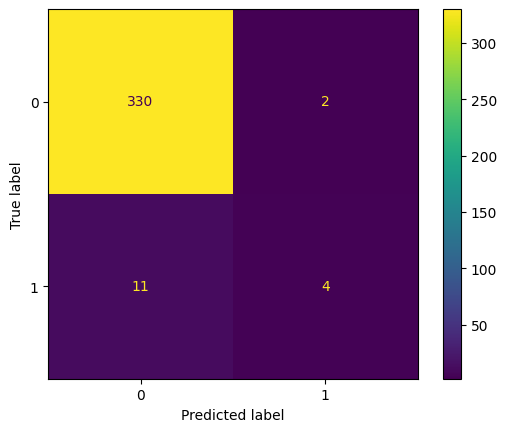

In [ ]:
#Confusion matrix for AdaBoost SMOTE Year 1
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test1,y_predABOver1, labels=classifierABOver1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierABOver1.classes_)
disp.plot()
plt.show()

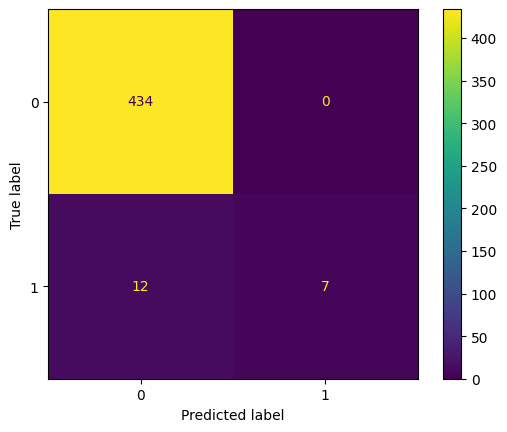

In [ ]:
#Confusion matrix for AdaBoost SMOTE Year 2
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test2,y_predABOver2, labels=classifierABOver2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierABOver2.classes_)
disp.plot()
plt.show()

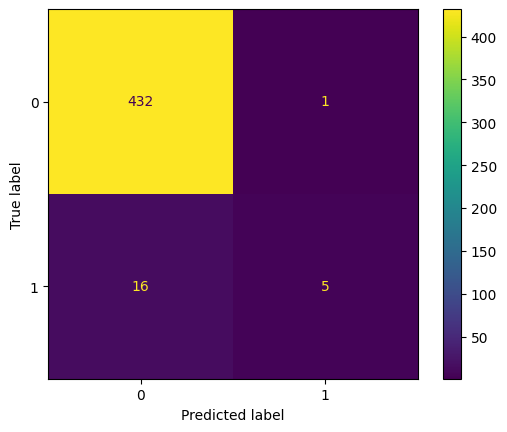

In [ ]:
#Confusion matrix for AdaBoost SMOTE Year 3
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test3,y_predABOver3, labels=classifierABOver3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierABOver3.classes_)
disp.plot()
plt.show()

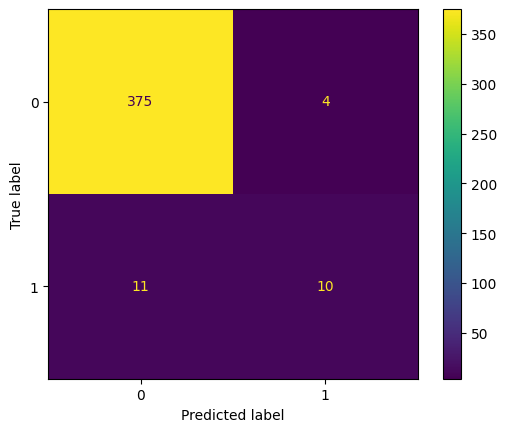

In [ ]:
#Confusion matrix for AdaBoost SMOTE Year 4
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test4,y_predABOver4, labels=classifierABOver4.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierABOver4.classes_)
disp.plot()
plt.show()

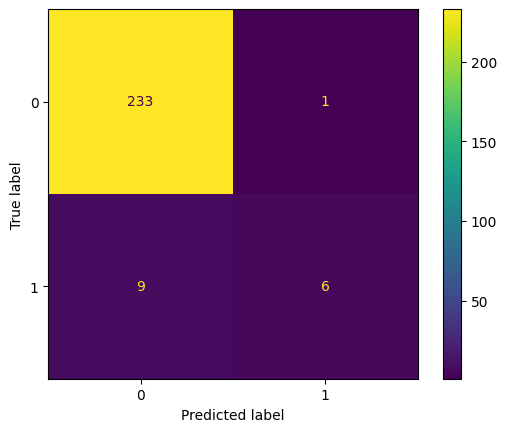

In [ ]:
#Confusion matrix for AdaBoost SMOTE Year 5
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test5,y_predABOver5, labels=classifierABOver5.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierABOver5.classes_)
disp.plot()
plt.show()

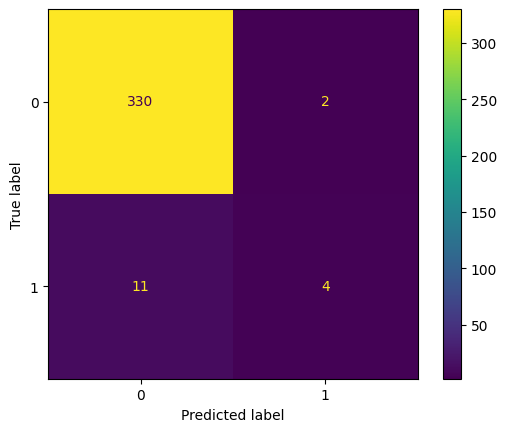

In [ ]:
#Confusion matrix for AdaBoost Under Year 1
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test1,y_predABUnder1, labels=classifierABUnder1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierABUnder1.classes_)
disp.plot()
plt.show()

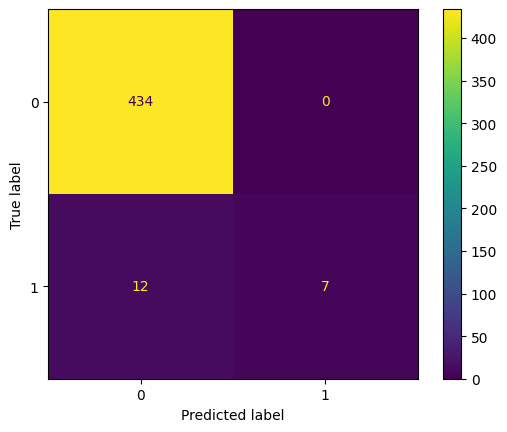

In [ ]:
#Confusion matrix for AdaBoost Under Year 2
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test2,y_predABUnder2, labels=classifierABUnder2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierABUnder2.classes_)
disp.plot()
plt.show()

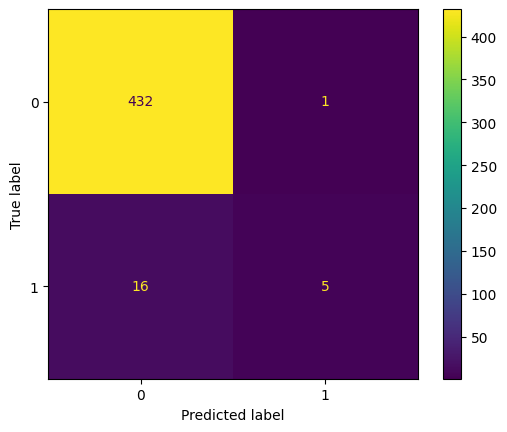

In [ ]:
#Confusion matrix for AdaBoost Under Year 3
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test3,y_predABUnder3, labels=classifierABUnder3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierABUnder3.classes_)
disp.plot()
plt.show()

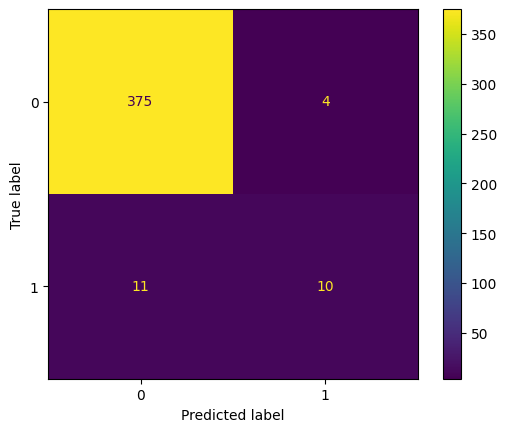

In [ ]:
#Confusion matrix for AdaBoost Under Year 4
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test4,y_predABUnder4, labels=classifierABUnder4.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierABUnder4.classes_)
disp.plot()
plt.show()

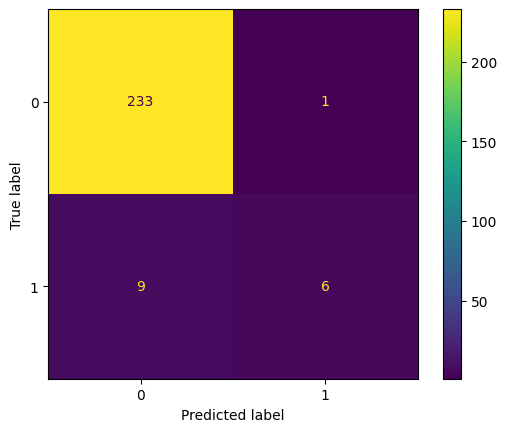

In [ ]:
#Confusion matrix for AdaBoost Under Year 5
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test5,y_predABUnder5, labels=classifierABUnder5.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierABUnder5.classes_)
disp.plot()
plt.show()

###Specificity

In [ ]:
#Year 1
specificity_ABOver = specificity_score(y_test1, y_predABOver1)
print("Specificity Over :", specificity_ABOver)
specificity_ABUnder = specificity_score(y_test1, y_predABUnder1)
print("Specificity Under:", specificity_ABUnder)

Specificity Over : 0.9939759036144579
Specificity Under: 0.9939759036144579


In [ ]:
#Year 2
specificity_ABOver = specificity_score(y_test2, y_predABOver2)
print("Specificity Over :", specificity_ABOver)
specificity_ABUnder = specificity_score(y_test2, y_predABUnder2)
print("Specificity Under:", specificity_ABUnder)

Specificity Over : 1.0
Specificity Under: 1.0


In [ ]:
#Year 3
specificity_ABOver = specificity_score(y_test3, y_predABOver3)
print("Specificity Over :", specificity_ABOver)
specificity_ABUnder = specificity_score(y_test3, y_predABUnder3)
print("Specificity Under:", specificity_ABUnder)

Specificity Over : 0.9976905311778291
Specificity Under: 0.9976905311778291


In [ ]:
#Year 4
specificity_ABOver = specificity_score(y_test4, y_predABOver4)
print("Specificity Over :", specificity_ABOver)
specificity_ABUnder = specificity_score(y_test4, y_predABUnder4)
print("Specificity Under:", specificity_ABUnder)

Specificity Over : 0.9894459102902374
Specificity Under: 0.9894459102902374


In [ ]:
#Year 5
specificity_ABOver = specificity_score(y_test5, y_predABOver5)
print("Specificity Over :", specificity_ABOver)
specificity_ABUnder = specificity_score(y_test5, y_predABUnder5)
print("Specificity Under:", specificity_ABUnder)

Specificity Over : 0.9957264957264957
Specificity Under: 0.9957264957264957


###Precision

In [ ]:
#Year 1
precision_score_ABOver = Precision_score(y_test1, y_predABOver1)
print("Precision Over :", precision_score_ABOver)
precision_score_ABUnder = Precision_score(y_test1, y_predABUnder1)
print("Precision Under :", precision_score_ABUnder)

Precision Over : 0.6666666666666666
Precision Under : 0.6666666666666666


In [ ]:
#Year 2
precision_score_ABOver = Precision_score(y_test2, y_predABOver2)
print("Precision Over :", precision_score_ABOver)
precision_score_ABUnder = Precision_score(y_test2, y_predABUnder2)
print("Precision Under :", precision_score_ABUnder)

Precision Over : 1.0
Precision Under : 1.0


In [ ]:
#Year 3
precision_score_ABOver = Precision_score(y_test3, y_predABOver3)
print("Precision Over :", precision_score_ABOver)
precision_score_ABUnder = Precision_score(y_test3, y_predABUnder3)
print("Precision Under :", precision_score_ABUnder)

Precision Over : 0.8333333333333334
Precision Under : 0.8333333333333334


In [ ]:
#Year 4
precision_score_ABOver = Precision_score(y_test4, y_predABOver4)
print("Precision Over :", precision_score_ABOver)
precision_score_ABUnder = Precision_score(y_test4, y_predABUnder4)
print("Precision Under :", precision_score_ABUnder)

Precision Over : 0.7142857142857143
Precision Under : 0.7142857142857143


In [ ]:
#Year 5
precision_score_ABOver = Precision_score(y_test5, y_predABOver5)
print("Precision Over :", precision_score_ABOver)
precision_score_ABUnder = Precision_score(y_test5, y_predABUnder5)
print("Precision Under :", precision_score_ABUnder)

Precision Over : 0.8571428571428571
Precision Under : 0.8571428571428571


###Recall

In [ ]:
#Year 1
Recall_score_ABOver = Recall_score(y_test1, y_predABOver1)
print("Recall Over :", Recall_score_ABOver)
Recall_score_ABUnder = Recall_score(y_test1, y_predABUnder1)
print("Recall Under :", Recall_score_ABUnder)

Recall Over : 0.26666666666666666
Recall Under : 0.26666666666666666


In [ ]:
#Year 2
Recall_score_ABOver = Recall_score(y_test2, y_predABOver2)
print("Recall Over :", Recall_score_ABOver)
Recall_score_ABUnder = Recall_score(y_test2, y_predABUnder2)
print("Recall Under :", Recall_score_ABUnder)

Recall Over : 0.3684210526315789
Recall Under : 0.3684210526315789


In [ ]:
#Year 3
Recall_score_ABOver = Recall_score(y_test3, y_predABOver3)
print("Recall Over :", Recall_score_ABOver)
Recall_score_ABUnder = Recall_score(y_test3, y_predABUnder3)
print("Recall Under :", Recall_score_ABUnder)

Recall Over : 0.23809523809523808
Recall Under : 0.23809523809523808


In [ ]:
#Year 4
Recall_score_ABOver = Recall_score(y_test4, y_predABOver4)
print("Recall Over :", Recall_score_ABOver)
Recall_score_ABUnder = Recall_score(y_test4, y_predABUnder4)
print("Recall Under :", Recall_score_ABUnder)

Recall Over : 0.47619047619047616
Recall Under : 0.47619047619047616


In [ ]:
#Year 5
Recall_score_ABOver = Recall_score(y_test5, y_predABOver5)
print("Recall Over :", Recall_score_ABOver)
Recall_score_ABUnder = Recall_score(y_test5, y_predABUnder5)
print("Recall Under :", Recall_score_ABUnder)

Recall Over : 0.4
Recall Under : 0.4


###Sensitivity

In [ ]:
#Year 1
Sensitivity_score_ABOver = Sensitivity_score(y_test1, y_predABOver1)
print("Sensitivity Over :", Sensitivity_score_ABOver)
Sensitivity_score_ABUnder = Sensitivity_score(y_test1, y_predABUnder1)
print("Sensitivity Under :", Sensitivity_score_ABUnder)

Sensitivity Over : 0.26666666666666666
Sensitivity Under : 0.26666666666666666


In [ ]:
#Year 2
Sensitivity_score_ABOver = Sensitivity_score(y_test2, y_predABOver2)
print("Sensitivity Over :", Sensitivity_score_ABOver)
Sensitivity_score_ABUnder = Sensitivity_score(y_test2, y_predABUnder2)
print("Sensitivity Under :", Sensitivity_score_ABUnder)

Sensitivity Over : 0.3684210526315789
Sensitivity Under : 0.3684210526315789


In [ ]:
#Year 3
Sensitivity_score_ABOver = Sensitivity_score(y_test3, y_predABOver3)
print("Sensitivity Over :", Sensitivity_score_ABOver)
Sensitivity_score_ABUnder = Sensitivity_score(y_test3, y_predABUnder3)
print("Sensitivity Under :", Sensitivity_score_ABUnder)

Sensitivity Over : 0.23809523809523808
Sensitivity Under : 0.23809523809523808


In [ ]:
#Year 4
Sensitivity_score_ABOver = Sensitivity_score(y_test4, y_predABOver4)
print("Sensitivity Over :", Sensitivity_score_ABOver)
Sensitivity_score_ABUnder = Sensitivity_score(y_test4, y_predABUnder4)
print("Sensitivity Under :", Sensitivity_score_ABUnder)

Sensitivity Over : 0.47619047619047616
Sensitivity Under : 0.47619047619047616


In [ ]:
#Year 5
Sensitivity_score_ABOver = Sensitivity_score(y_test5, y_predABOver5)
print("Sensitivity Over :", Sensitivity_score_ABOver)
Sensitivity_score_ABUnder = Sensitivity_score(y_test5, y_predABUnder5)
print("Sensitivity Under :", Sensitivity_score_ABUnder)

Sensitivity Over : 0.4
Sensitivity Under : 0.4


###F1 Score

In [ ]:
#Year 1
F1_score_ABOver = F1_score(y_test1, y_predABOver1)
print("F1 Score Over :", F1_score_ABOver)
F1_score_ABUnder = F1_score(y_test1, y_predABUnder1)
print("F1 Score Under :", F1_score_ABUnder)

F1 Score Over : 0.3809523809523809
F1 Score Under : 0.3809523809523809


In [ ]:
#Year 2
F1_score_ABOver = F1_score(y_test2, y_predABOver2)
print("F1 Score Over :", F1_score_ABOver)
F1_score_ABUnder = F1_score(y_test2, y_predABUnder2)
print("F1 Score Under :", F1_score_ABUnder)

F1 Score Over : 0.5384615384615384
F1 Score Under : 0.5384615384615384


In [ ]:
#Year 3
F1_score_ABOver = F1_score(y_test3, y_predABOver3)
print("F1 Score Over :", F1_score_ABOver)
F1_score_ABUnder = F1_score(y_test3, y_predABUnder3)
print("F1 Score Under :", F1_score_ABUnder)

F1 Score Over : 0.37037037037037035
F1 Score Under : 0.37037037037037035


In [ ]:
#Year 4
F1_score_ABOver = F1_score(y_test4, y_predABOver4)
print("F1 Score Over :", F1_score_ABOver)
F1_score_ABUnder = F1_score(y_test4, y_predABUnder4)
print("F1 Score Under :", F1_score_ABUnder)

F1 Score Over : 0.5714285714285714
F1 Score Under : 0.5714285714285714


In [ ]:
#Year 5
F1_score_ABOver = F1_score(y_test5, y_predABOver5)
print("F1 Score Over :", F1_score_ABOver)
F1_score_ABUnder = F1_score(y_test5, y_predABUnder5)
print("F1 Score Under :", F1_score_ABUnder)

F1 Score Over : 0.5454545454545455
F1 Score Under : 0.5454545454545455


###False Postive Rate

In [ ]:
#year 1
False_positive_rateABOver = False_Positive_Rate(y_test1, y_predABOver1)
print("False Positive Rate Over :", False_positive_rateABOver)
False_positive_rateABUnder = False_Positive_Rate(y_test1, y_predABUnder1)
print("False Positive Rate Under :", False_positive_rateABUnder)

False Positive Rate Over : 0.006024096385542169
False Positive Rate Under : 0.006024096385542169


In [ ]:
#Year 2
False_positive_rateABOver = False_Positive_Rate(y_test2, y_predABOver2)
print("False Positive Rate Over :", False_positive_rateABOver)
False_positive_rateABUnder = False_Positive_Rate(y_test2, y_predABUnder2)
print("False Positive Rate Under :", False_positive_rateABUnder)

False Positive Rate Over : 0.0
False Positive Rate Under : 0.0


In [ ]:
#Year 3
False_positive_rateABOver = False_Positive_Rate(y_test3, y_predABOver3)
print("False Positive Rate Over :", False_positive_rateABOver)
False_positive_rateABUnder = False_Positive_Rate(y_test3, y_predABUnder3)
print("False Positive Rate Under :", False_positive_rateABUnder)

False Positive Rate Over : 0.0023094688221709007
False Positive Rate Under : 0.0023094688221709007


In [ ]:
#Year 4
False_positive_rateABOver = False_Positive_Rate(y_test4, y_predABOver4)
print("False Positive Rate Over :", False_positive_rateABOver)
False_positive_rateABUnder = False_Positive_Rate(y_test4, y_predABUnder4)
print("False Positive Rate Under :", False_positive_rateABUnder)

False Positive Rate Over : 0.010554089709762533
False Positive Rate Under : 0.010554089709762533


In [ ]:
#Year 5
False_positive_rateABOver = False_Positive_Rate(y_test5, y_predABOver5)
print("False Positive Rate Over :", False_positive_rateABOver)
False_positive_rateABUnder = False_Positive_Rate(y_test5, y_predABUnder5)
print("False Positive Rate Under :", False_positive_rateABUnder)

False Positive Rate Over : 0.004273504273504274
False Positive Rate Under : 0.004273504273504274


###False Negative Rate

In [ ]:
#Year 1
False_negative_rateABOver = False_Negative_Rate(y_test1, y_predABOver1)
print("False Negative Rate Over :", False_negative_rateABOver)
False_negative_rateABUnder = False_Negative_Rate(y_test1, y_predABUnder1)
print("False Negative Rate Under :", False_negative_rateABUnder)

False Negative Rate Over : 0.7333333333333333
False Negative Rate Under : 0.7333333333333333


In [ ]:
#Year 2
False_negative_rateABOver = False_Negative_Rate(y_test2, y_predABOver2)
print("False Negative Rate Over :", False_negative_rateABOver)
False_negative_rateABUnder = False_Negative_Rate(y_test2, y_predABUnder2)
print("False Negative Rate Under :", False_negative_rateABUnder)

False Negative Rate Over : 0.631578947368421
False Negative Rate Under : 0.631578947368421


In [ ]:
#Year 3
False_negative_rateABOver = False_Negative_Rate(y_test3, y_predABOver3)
print("False Negative Rate Over :", False_negative_rateABOver)
False_negative_rateABUnder = False_Negative_Rate(y_test3, y_predABUnder3)
print("False Negative Rate Under :", False_negative_rateABUnder)

False Negative Rate Over : 0.7619047619047619
False Negative Rate Under : 0.7619047619047619


In [ ]:
#Year 4
False_negative_rateABOver = False_Negative_Rate(y_test4, y_predABOver4)
print("False Negative Rate Over :", False_negative_rateABOver)
False_negative_rateABUnder = False_Negative_Rate(y_test4, y_predABUnder4)
print("False Negative Rate Under :", False_negative_rateABUnder)

False Negative Rate Over : 0.5238095238095238
False Negative Rate Under : 0.5238095238095238


In [ ]:
#Year 5
False_negative_rateABOver = False_Negative_Rate(y_test5, y_predABOver5)
print("False Negative Rate Over :", False_negative_rateABOver)
False_negative_rateABUnder = False_Negative_Rate(y_test5, y_predABUnder5)
print("False Negative Rate Under :", False_negative_rateABUnder)

False Negative Rate Over : 0.6
False Negative Rate Under : 0.6


###Precision-Recall AUC | Average precision

In [ ]:
#Year 1
precision_recall_AUCABOver = average_precision_score(y_test1, y_predABOver1)
print("Precison-Recall AUC Over :", precision_recall_AUCABOver)
precision_recall_AUCABUnder = average_precision_score(y_test1, y_predABUnder1)
print("Precison-Recall AUC Under :", precision_recall_AUCABUnder)

Precison-Recall AUC Over : 0.2094780659622158
Precison-Recall AUC Under : 0.2094780659622158


In [ ]:
#Year 2
precision_recall_AUCABOver = average_precision_score(y_test2, y_predABOver2)
print("Precison-Recall AUC Over :", precision_recall_AUCABOver)
precision_recall_AUCABUnder = average_precision_score(y_test2, y_predABUnder2)
print("Precison-Recall AUC Under :", precision_recall_AUCABUnder)

Precison-Recall AUC Over : 0.39491111885674446
Precison-Recall AUC Under : 0.39491111885674446


In [ ]:
#Year 3
precision_recall_AUCABOver = average_precision_score(y_test3, y_predABOver3)
print("Precison-Recall AUC Over :", precision_recall_AUCABOver)
precision_recall_AUCABUnder = average_precision_score(y_test3, y_predABUnder3)
print("Precison-Recall AUC Under :", precision_recall_AUCABUnder)

Precison-Recall AUC Over : 0.23365498916159708
Precison-Recall AUC Under : 0.23365498916159708


In [ ]:
#Year 4
precision_recall_AUCABOver = average_precision_score(y_test4, y_predABOver4)
print("Precison-Recall AUC Over :", precision_recall_AUCABOver)
precision_recall_AUCABUnder = average_precision_score(y_test4, y_predABUnder4)
print("Precison-Recall AUC Under :", precision_recall_AUCABUnder)

Precison-Recall AUC Over : 0.3676360544217687
Precison-Recall AUC Under : 0.3676360544217687


In [ ]:
#Year 5
precision_recall_AUCABOver = average_precision_score(y_test5, y_predABOver5)
print("Precison-Recall AUC Over :", precision_recall_AUCABOver)
precision_recall_AUCABUnder = average_precision_score(y_test5, y_predABUnder5)
print("Precison-Recall AUC Under :", precision_recall_AUCABUnder)

Precison-Recall AUC Over : 0.3790017211703959
Precison-Recall AUC Under : 0.3790017211703959


##Gradient Boost

###Confusion Matrix

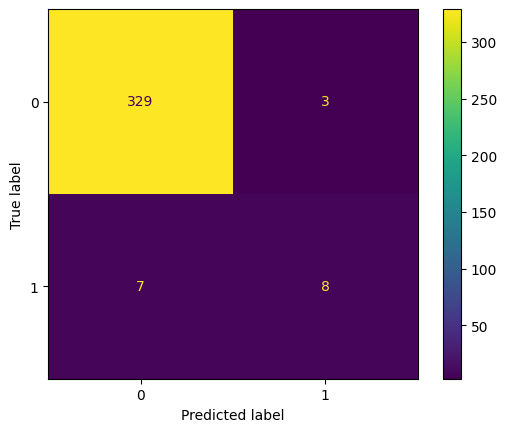

In [ ]:
#year1 over
#Confusion matrix for Gradient Boost
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test1,y_predGBover1, labels=classifierGBover1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierGBover1.classes_)
disp.plot()
plt.show()

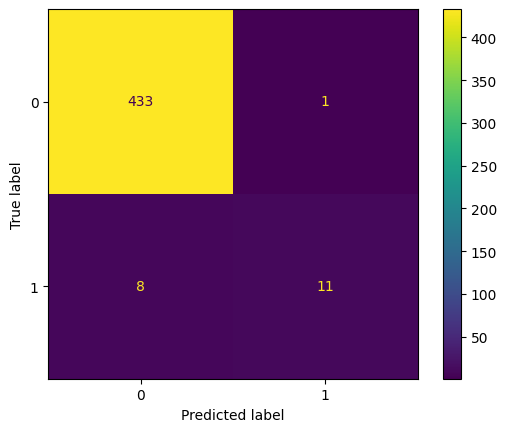

In [ ]:
#year 2 over
cm= confusion_matrix(y_test2,y_predGBover2, labels=classifierGBover2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierGBover2.classes_)
disp.plot()
plt.show()

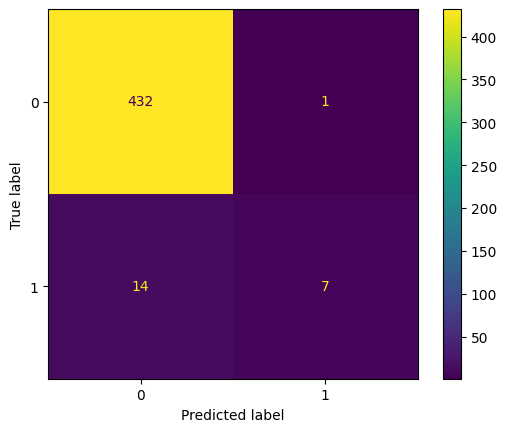

In [ ]:
#year 3 over
cm= confusion_matrix(y_test3,y_predGBover3, labels=classifierGBover3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierGBover3.classes_)
disp.plot()
plt.show()

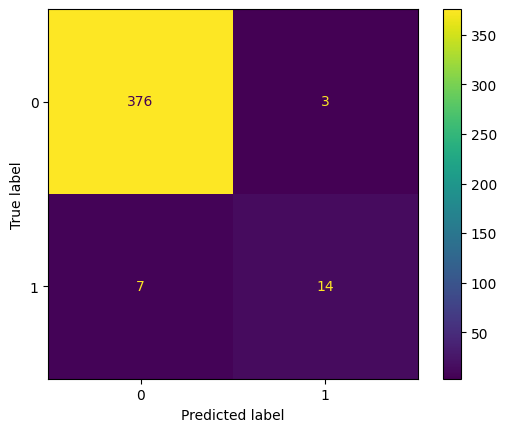

In [ ]:
#Year 4 Over
cm= confusion_matrix(y_test4,y_predGBover4, labels=classifierGBover4.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierGBover4.classes_)
disp.plot()
plt.show()

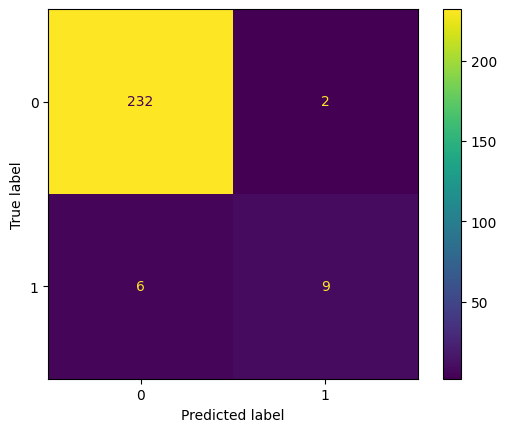

In [ ]:
#year 5 Over
cm= confusion_matrix(y_test5,y_predGBover5, labels=classifierGBover5.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierGBover5.classes_)
disp.plot()
plt.show()

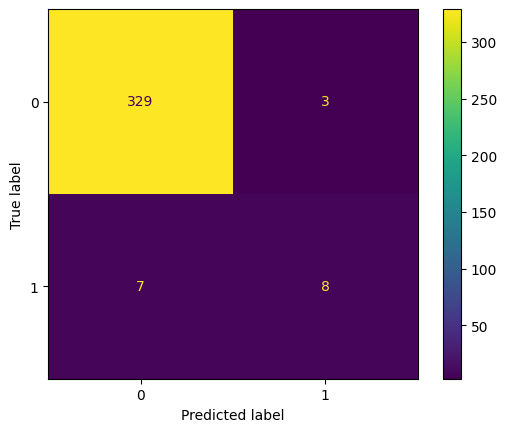

In [ ]:
#Year 1 Under
cm= confusion_matrix(y_test1,y_predGBunder1, labels=classiferGBunder1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classiferGBunder1.classes_)
disp.plot()
plt.show()

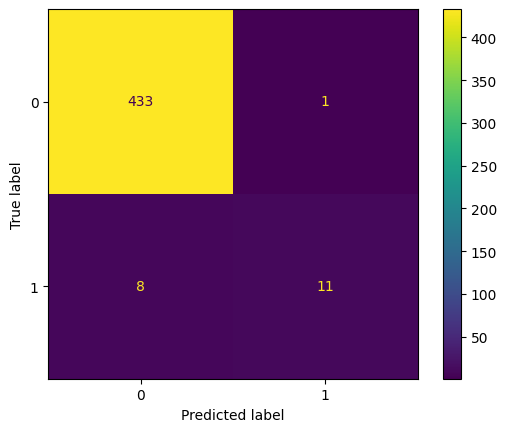

In [ ]:
#Year 2 Under
cm= confusion_matrix(y_test2,y_predGBunder2, labels=classiferGBunder2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classiferGBunder2.classes_)
disp.plot()

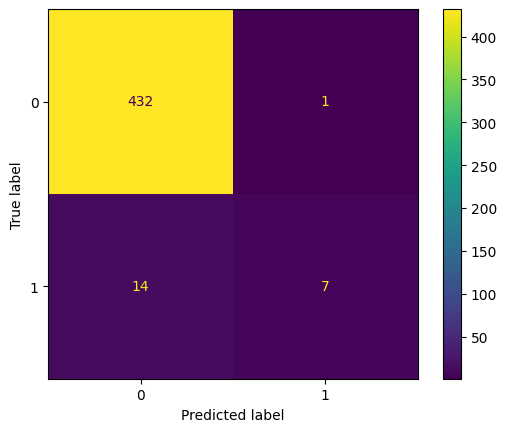

In [ ]:
#Year 3 Under
cm= confusion_matrix(y_test3,y_predGBunder3, labels=classiferGBunder3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classiferGBunder3.classes_)
disp.plot()

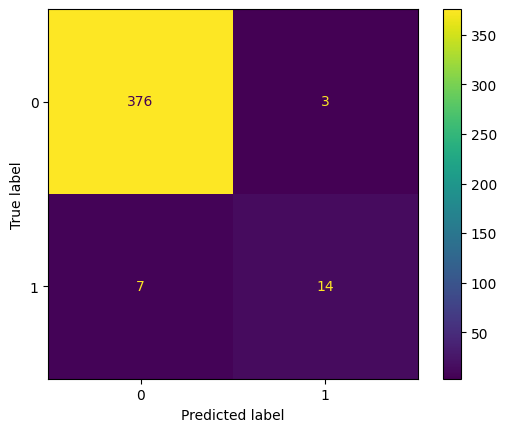

In [ ]:
#Year 4 Under
cm= confusion_matrix(y_test4,y_predGBunder4, labels=classiferGBunder4.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classiferGBunder4.classes_)
disp.plot()

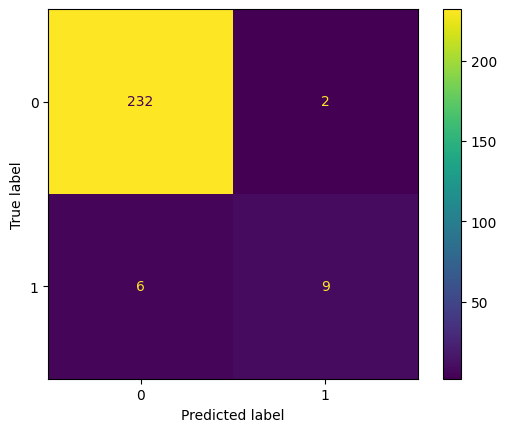

In [ ]:
#Year 5 Under
cm= confusion_matrix(y_test5,y_predGBunder5, labels=classiferGBunder5.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classiferGBunder5.classes_)
disp.plot()

###Specificity

In [ ]:
#Year 1
specificity_GBOver = specificity_score(y_test1, y_predGBover1)
print("Specificity Over :", specificity_GBOver)
specificity_GBUnder = specificity_score(y_test1, y_predGBunder1)
print("Specificity Under:", specificity_GBUnder)

Specificity Over : 0.9909638554216867
Specificity Under: 0.9909638554216867


In [ ]:
#Year 2
specificity_GBOver = specificity_score(y_test2, y_predGBover2)
print("Specificity Over :", specificity_GBOver)
specificity_GBUnder = specificity_score(y_test2, y_predGBunder2)

Specificity Over : 0.9976958525345622


In [ ]:
#Year 3
specificity_GBOver = specificity_score(y_test3, y_predGBover3)
print("Specificity Over :", specificity_GBOver)
specificity_GBUnder = specificity_score(y_test3, y_predGBunder3)

Specificity Over : 0.9976905311778291


In [ ]:
#Year 4
specificity_GBOver = specificity_score(y_test4, y_predGBover4)
print("Specificity Over :", specificity_GBOver)
specificity_GBUnder = specificity_score(y_test4, y_predGBunder4)

Specificity Over : 0.9920844327176781


In [ ]:
#Year 5
specificity_GBOver = specificity_score(y_test5, y_predGBover5)
print("Specificity Over :", specificity_GBOver)
specificity_GBUnder = specificity_score(y_test5, y_predGBunder5)

Specificity Over : 0.9914529914529915


###Precision

In [ ]:
#YEar 1
precision_score_GBOver = Precision_score(y_test1, y_predGBover1)
print("Precision Over :", precision_score_GBOver)
precision_score_GBUnder = Precision_score(y_test1, y_predGBunder1)
print("Precision Under :", precision_score_GBUnder)

Precision Over : 0.7272727272727273
Precision Under : 0.7272727272727273


In [ ]:
#Year 2
precision_score_GBOver = Precision_score(y_test2, y_predGBover2)
print("Precision Over :", precision_score_GBOver)
precision_score_GBUnder = Precision_score(y_test2, y_predGBunder2)
print("Precision Under :", precision_score_GBUnder)

Precision Over : 0.9166666666666666
Precision Under : 0.9166666666666666


In [ ]:
#Year 3
precision_score_GBOver = Precision_score(y_test3, y_predGBover3)
print("Precision Over :", precision_score_GBOver)
precision_score_GBUnder = Precision_score(y_test3, y_predGBunder3)
print("Precision Under :", precision_score_GBUnder)

Precision Over : 0.875
Precision Under : 0.875


In [ ]:
#Year 4
precision_score_GBOver = Precision_score(y_test4, y_predGBover4)
print("Precision Over :", precision_score_GBOver)
precision_score_GBUnder = Precision_score(y_test4, y_predGBunder4)
print("Precision Under :", precision_score_GBUnder)

Precision Over : 0.8235294117647058
Precision Under : 0.8235294117647058


In [ ]:
#Year 5
precision_score_GBOver = Precision_score(y_test5, y_predGBover5)
print("Precision Over :", precision_score_GBOver)
precision_score_GBUnder = Precision_score(y_test5, y_predGBunder5)
print("Precision Under :", precision_score_GBUnder)

Precision Over : 0.8181818181818182
Precision Under : 0.8181818181818182


###Recall

In [ ]:
#Year 1
Recall_score_GBOver = Recall_score(y_test1, y_predGBover1)
print("Recall Over :", Recall_score_GBOver)
Recall_score_GBUnder = Recall_score(y_test1, y_predGBunder1)
print("Recall Under :", Recall_score_GBUnder)

Recall Over : 0.5333333333333333
Recall Under : 0.5333333333333333


In [ ]:
#year 2
Recall_score_GBOver = Recall_score(y_test2, y_predGBover2)
print("Recall Over :", Recall_score_GBOver)
Recall_score_GBUnder = Recall_score(y_test2, y_predGBunder2)
print("Recall Under :", Recall_score_GBUnder)

Recall Over : 0.5789473684210527
Recall Under : 0.5789473684210527


In [ ]:
#year 3
Recall_score_GBOver = Recall_score(y_test3, y_predGBover3)
print("Recall Over :", Recall_score_GBOver)
Recall_score_GBUnder = Recall_score(y_test3, y_predGBunder3)
print("Recall Under :", Recall_score_GBUnder)

Recall Over : 0.3333333333333333
Recall Under : 0.3333333333333333


In [ ]:
#Year 4
Recall_score_GBOver = Recall_score(y_test4, y_predGBover4)
print("Recall Over :", Recall_score_GBOver)
Recall_score_GBUnder = Recall_score(y_test4, y_predGBunder4)
print("Recall Under :", Recall_score_GBUnder)

Recall Over : 0.6666666666666666
Recall Under : 0.6666666666666666


In [ ]:
#YEAR 5
Recall_score_GBOver = Recall_score(y_test5, y_predGBover5)
print("Recall Over :", Recall_score_GBOver)
Recall_score_GBUnder = Recall_score(y_test5, y_predGBunder5)
print("Recall Under :", Recall_score_GBUnder)

Recall Over : 0.6
Recall Under : 0.6


###Sensitivity

In [ ]:
#Year 1
Sensitivity_score_GBOver = Sensitivity_score(y_test1, y_predGBover1)
print("Sensitivity Over :", Sensitivity_score_GBOver)
Sensitivity_score_GBUnder = Sensitivity_score(y_test1, y_predGBunder1)
print("Sensitivity Under :", Sensitivity_score_GBUnder)

Sensitivity Over : 0.5333333333333333
Sensitivity Under : 0.5333333333333333


In [ ]:
#YEAR 2
Sensitivity_score_GBOver = Sensitivity_score(y_test2, y_predGBover2)
print("Sensitivity Over :", Sensitivity_score_GBOver)
Sensitivity_score_GBUnder = Sensitivity_score(y_test2, y_predGBunder2)
print("Sensitivity Under :", Sensitivity_score_GBUnder)

Sensitivity Over : 0.5789473684210527
Sensitivity Under : 0.5789473684210527


In [ ]:
#year 3
Sensitivity_score_GBOver = Sensitivity_score(y_test3, y_predGBover3)
print("Sensitivity Over :", Sensitivity_score_GBOver)
Sensitivity_score_GBUnder = Sensitivity_score(y_test3, y_predGBunder3)
print("Sensitivity Under :", Sensitivity_score_GBUnder)

Sensitivity Over : 0.3333333333333333
Sensitivity Under : 0.3333333333333333


In [ ]:
#Year 4
Sensitivity_score_GBOver = Sensitivity_score(y_test4, y_predGBover4)
print("Sensitivity Over :", Sensitivity_score_GBOver)
Sensitivity_score_GBUnder = Sensitivity_score(y_test4, y_predGBunder4)
print("Sensitivity Under :", Sensitivity_score_GBUnder)

Sensitivity Over : 0.6666666666666666
Sensitivity Under : 0.6666666666666666


In [ ]:
#Year 5
Sensitivity_score_GBOver = Sensitivity_score(y_test5, y_predGBover5)
print("Sensitivity Over :", Sensitivity_score_GBOver)
Sensitivity_score_GBUnder = Sensitivity_score(y_test5, y_predGBunder5)
print("Sensitivity Under :", Sensitivity_score_GBUnder)

Sensitivity Over : 0.6
Sensitivity Under : 0.6


###F1 Score

In [ ]:
#YEAR 1
F1_score_GBOver = F1_score(y_test1, y_predGBover1)
print("F1 Score Over :", F1_score_GBOver)
F1_score_GBUnder = F1_score(y_test1, y_predGBunder1)
print("F1 Score Under :", F1_score_GBUnder)

F1 Score Over : 0.6153846153846153
F1 Score Under : 0.6153846153846153


In [ ]:
#year 2
F1_score_GBOver = F1_score(y_test2, y_predGBover2)
print("F1 Score Over :", F1_score_GBOver)
F1_score_GBUnder = F1_score(y_test2, y_predGBunder2)
print("F1 Score Under :", F1_score_GBUnder)

F1 Score Over : 0.7096774193548387
F1 Score Under : 0.7096774193548387


In [ ]:
#Year 3
f1_score_GBOver = F1_score(y_test3, y_predGBover3)
print("F1 Score Over :", f1_score_GBOver)
f1_score_GBUnder = F1_score(y_test3, y_predGBunder3)
print("F1 Score Under :", f1_score_GBUnder)

F1 Score Over : 0.48275862068965514
F1 Score Under : 0.48275862068965514


In [ ]:
#year 4
f1_score_GBOver = F1_score(y_test4, y_predGBover4)
print("F1 Score Over :", f1_score_GBOver)
f1_score_GBUnder = F1_score(y_test4, y_predGBunder4)
print("F1 Score Under :", f1_score_GBUnder)

F1 Score Over : 0.7368421052631577
F1 Score Under : 0.7368421052631577


In [ ]:
#Year 5
f1_score_GBOver = F1_score(y_test5, y_predGBover5)
print("F1 Score Over :", f1_score_GBOver)
f1_score_GBUnder = F1_score(y_test5, y_predGBunder5)
print("F1 Score Under :", f1_score_GBUnder)

F1 Score Over : 0.6923076923076923
F1 Score Under : 0.6923076923076923


###False Postive Rate

In [ ]:
#Year 1
False_Postivev_score_GBOver = False_Positive_Rate(y_test1, y_predGBover1)
print("False Positive Rate Over :", False_Postivev_score_GBOver)
False_Postivev_score_GBUnder = False_Positive_Rate(y_test1, y_predGBunder1)
print("False Positive Rate Under :", False_Postivev_score_GBUnder)

False Positive Rate Over : 0.009036144578313253
False Positive Rate Under : 0.009036144578313253


In [ ]:
#Year 2
False_Postivev_score_GBOver = False_Positive_Rate(y_test2, y_predGBover2)
print("False Positive Rate Over :", False_Postivev_score_GBOver)
False_Postivev_score_GBUnder = False_Positive_Rate(y_test2, y_predGBunder2)
print("False Positive Rate Under :", False_Postivev_score_GBUnder)

False Positive Rate Over : 0.002304147465437788
False Positive Rate Under : 0.002304147465437788


In [ ]:
#YEAR 3
False_Postivev_score_GBOver = False_Positive_Rate(y_test3, y_predGBover3)
print("False Positive Rate Over :", False_Postivev_score_GBOver)
False_Postivev_score_GBUnder = False_Positive_Rate(y_test3, y_predGBunder3)
print("False Positive Rate Under :", False_Postivev_score_GBUnder)

False Positive Rate Over : 0.0023094688221709007
False Positive Rate Under : 0.0023094688221709007


In [ ]:
#YEAR 4
False_Postivev_score_GBOver = False_Positive_Rate(y_test4, y_predGBover4)
print("False Positive Rate Over :", False_Postivev_score_GBOver)
False_Postivev_score_GBUnder = False_Positive_Rate(y_test4, y_predGBunder4)
print("False Positive Rate Under :", False_Postivev_score_GBUnder)

False Positive Rate Over : 0.0079155672823219
False Positive Rate Under : 0.0079155672823219


In [ ]:
#Year 5
False_Postivev_score_GBOver = False_Positive_Rate(y_test5, y_predGBover5)
print("False Positive Rate Over :", False_Postivev_score_GBOver)
False_Postivev_score_GBUnder = False_Positive_Rate(y_test5, y_predGBunder5)
print("False Positive Rate Under :", False_Postivev_score_GBUnder)

False Positive Rate Over : 0.008547008547008548
False Positive Rate Under : 0.008547008547008548


###False Negative Rate

In [ ]:
#Year 1
False_Negative_score_GBOver = False_Negative_Rate(y_test1, y_predGBover1)
print("False Negative Rate Over :", False_Negative_score_GBOver)
False_Negative_score_GBUnder = False_Negative_Rate(y_test1, y_predGBunder1)
print("False Negative Rate Under :", False_Negative_score_GBUnder)

False Negative Rate Over : 0.4666666666666667
False Negative Rate Under : 0.4666666666666667


In [ ]:
#Year 2
False_Negative_score_GBOver = False_Negative_Rate(y_test2, y_predGBover2)
print("False Negative Rate Over :", False_Negative_score_GBOver)
False_Negative_score_GBUnder = False_Negative_Rate(y_test2, y_predGBunder2)
print("False Negative Rate Under :", False_Negative_score_GBUnder)

False Negative Rate Over : 0.42105263157894735
False Negative Rate Under : 0.42105263157894735


In [ ]:
#Year 3
False_Negative_score_GBOver = False_Negative_Rate(y_test3, y_predGBover3)
print("False Negative Rate Over :", False_Negative_score_GBOver)
False_Negative_score_GBUnder = False_Negative_Rate(y_test3, y_predGBunder3)
print("False Negative Rate Under :", False_Negative_score_GBUnder)

False Negative Rate Over : 0.6666666666666666
False Negative Rate Under : 0.6666666666666666


In [ ]:
#Year 4
False_Negative_score_GBOver = False_Negative_Rate(y_test4, y_predGBover4)
print("False Negative Rate Over :", False_Negative_score_GBOver)
False_Negative_score_GBUnder = False_Negative_Rate(y_test4, y_predGBunder4)
print("False Negative Rate Under :", False_Negative_score_GBUnder)

False Negative Rate Over : 0.3333333333333333
False Negative Rate Under : 0.3333333333333333


In [ ]:
#Year 5
False_Negative_score_GBOver = False_Negative_Rate(y_test5, y_predGBover5)
print("False Negative Rate Over :", False_Negative_score_GBOver)
False_Negative_score_GBUnder = False_Negative_Rate(y_test5, y_predGBunder5)
print("False Negative Rate Under :", False_Negative_score_GBUnder)

False Negative Rate Over : 0.4
False Negative Rate Under : 0.4


###Precision-Recall AUC | Average precision

In [ ]:
#Year 1
precision_recall_AUCGBOver = average_precision_score(y_test1, y_predGBover1)
print("Precison-Recall AUC Over :", precision_recall_AUCGBOver)
precision_recall_AUCGBUnder = average_precision_score(y_test1, y_predGBunder1)
print("Precison-Recall AUC Under :", precision_recall_AUCGBUnder)

Precison-Recall AUC Over : 0.4080516985416121
Precison-Recall AUC Under : 0.4080516985416121


In [ ]:
#Year 2
precision_recall_AUCABOver = average_precision_score(y_test2, y_predABOver2)
print("Precison-Recall AUC Over :", precision_recall_AUCABOver)
precision_recall_AUCABUnder = average_precision_score(y_test2, y_predABUnder2)
print("Precison-Recall AUC Under :", precision_recall_AUCABUnder)

Precison-Recall AUC Over : 0.39491111885674446
Precison-Recall AUC Under : 0.39491111885674446


In [ ]:
#Year 3
precision_recall_AUCABOver = average_precision_score(y_test3, y_predABOver3)
print("Precison-Recall AUC Over :", precision_recall_AUCABOver)
precision_recall_AUCABUnder = average_precision_score(y_test3, y_predABUnder3)
print("Precison-Recall AUC Under :", precision_recall_AUCABUnder)

Precison-Recall AUC Over : 0.23365498916159708
Precison-Recall AUC Under : 0.23365498916159708


In [ ]:
#Year 4
precision_recall_AUCABOver = average_precision_score(y_test4, y_predABOver4)
print("Precison-Recall AUC Over :", precision_recall_AUCABOver)
precision_recall_AUCABUnder = average_precision_score(y_test4, y_predABUnder4)
print("Precison-Recall AUC Under :", precision_recall_AUCABUnder)

Precison-Recall AUC Over : 0.3676360544217687
Precison-Recall AUC Under : 0.3676360544217687


In [ ]:
#Year 5
precision_recall_AUCABOver = average_precision_score(y_test5, y_predABOver5)
print("Precison-Recall AUC Over :", precision_recall_AUCABOver)
precision_recall_AUCABUnder = average_precision_score(y_test5, y_predABUnder5)
print("Precison-Recall AUC Under :", precision_recall_AUCABUnder)

Precison-Recall AUC Over : 0.3790017211703959
Precison-Recall AUC Under : 0.3790017211703959


#Download files

In [ ]:
filename='data.csv'
Bankrupt_model.to_csv(filename,index=False)

In [ ]:
files.download('data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(category_counts)

class
0    41314
1     2091
Name: count, dtype: int64


In [ ]:
#files.download(filename)